# House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

This kaggle challenge consist on a regression problem, predicting house prices, based on 79 distinct features.

I will mostly use it to train data-preprocessing and feature engineering, as well as regression models, without taking overall Kaggle score too much into consideration.

__Please note: this Notebook is a work in progress and is still being updated.__

### Import libraries

First let's import the libraries that will be used in this notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None

#Add separation lines in graphs
plt.rcParams["patch.force_edgecolor"] = True

#SciPy
from scipy import stats

#Sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, ElasticNet
from sklearn.model_selection import train_test_split,KFold,cross_val_score, learning_curve,GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost
import lightgbm as lgbm

from sklearn.metrics import mean_squared_error

### EDA

Let's start by doing some Exploratory Data Analysis and learn more about the Dataset itself.

This Dataset is divided into two, a Train set (houses with the Target Variable, SalePrice) and a Test Set (houses with no SalePrice, the target variable).

In [2]:
#Import train and test sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

From .info we can already see that train and test sets have many missing values! These need to be filled.

__Let's list the features with missing values and sort them from most to least in %:__

In [6]:
#List and store features with Missing Values of the Train set in a new variable for latter use.
mva_train = train.isnull().mean()
mva_train[mva_train > 0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [7]:
#List and store features with Missing Values of the Test set in a new variable for latter use.
mva_test = test.isnull().mean()
mva_test[mva_test > 0].sort_values(ascending=False)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
Utilities       0.001371
Functional      0.001371
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
GarageCars      0.000685
GarageArea      0.000685
TotalBsmtSF     0.000685
dtype: float64

There seem to be many missing values in both the train and test sets, particularly in:
- Lot Frontage (17.7% MV on train set / 15.6% MV on test set);
- __Alley__ (93.7% MV on train set / 92,7% MV on test set);
- FireplaceQu (47.3% MV on train set / 50.0% mv on test set);
- __PoolQC__ (99.5% MV on train set / 99.8% MV on test set) - This will be dropped;
- __Fence__ (80.8% MV on train set / 80.1% MV on test set);
- __MiscFeature__ (96.3% MV on train set / 96.5% MV on test set).

### SalePrice distribution

SalePrice is the target variable of this problem and as such it is highly important. 

Unlike classification, in regression we are predicting a continuous number. Hence, the prediction could be any number along the real number line.
Therefore, it is always useful to check the distribution of the target variable, and indeed all numeric variables, when building a regression model. Machine Learning algorithms work really well with features that are normally distributed, a distribution that is symmetric and has a characteristic bell shape. If features are not normally distributed, they can be transformed using statistical methods.

Let's check the SalePrice distribution and also the corresponding QQ plot.

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


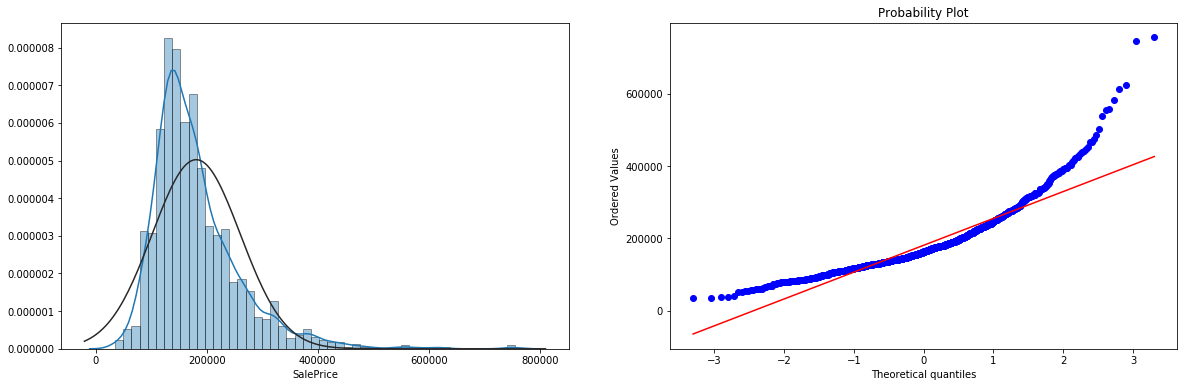

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'], fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(train['SalePrice'], plot=plt)

Most houses were sold with prices between 100.000 and 200.000 dollars.

The distribution seems to be right skewed. But by how much?

In [9]:
#What is the skewedness of SalePrice?
print('The skewedness of SalePrice is: {:0.3f}'.format(train['SalePrice'].skew()))

The skewedness of SalePrice is: 1.883


This is a considerably skewed distribution and normalisation may help in latter stages, when training the models. Thefore let's log transform the feature!

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


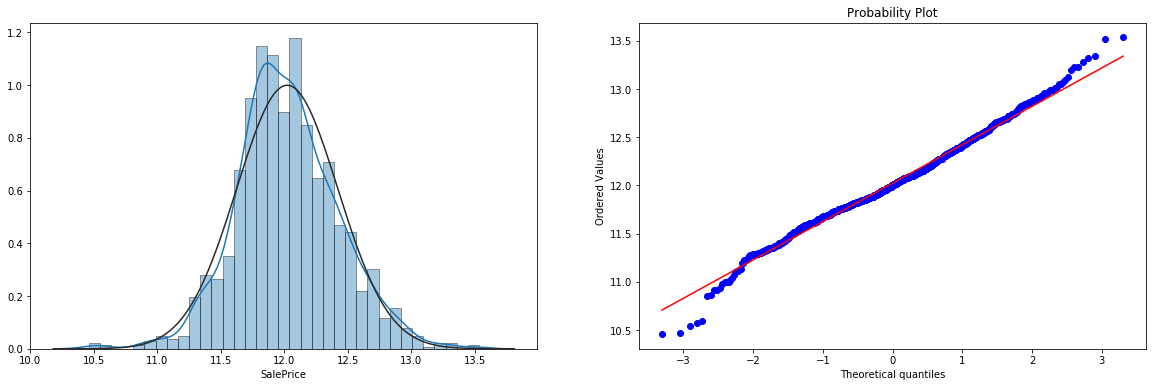

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(np.log1p(train['SalePrice']), fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(np.log1p(train['SalePrice']), plot=plt)

The log transformation seems to better approximate a normal distribution! What's the resulting skewedness?

In [11]:
#What is the skewedness of SalePrice?
print('The skewedness of SalePrice is: {:0.3f}'.format(np.log1p(train['SalePrice'].skew())))

The skewedness of SalePrice is: 1.059


Skewedness has reduced considerably and is now close to 1. Let's overwrite this in 'SalePrice'.

In [12]:
train['SalePrice'] = np.log1p(train['SalePrice'])

We will now explore the various features via plots.

__Let's create lists with categorical and quantitative attributes for future plotting__

In [13]:
categorical = [i for i in train.columns if train.dtypes[i] == 'object']
len(categorical)

43

In [14]:
quantitative = [i for i in train.drop(['Id','SalePrice'],axis=1).columns if train.dtypes[i] != 'object']

### Quantitative Features

Let's start with the 1uantitative features of the dataset.

In [15]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

One important metric is correlation, between features but also to the target variable. 

Let's start by checking correlation to the target variable in graphical and form.

In [16]:
feat_corr = train.drop('Id',axis=1).corr().drop('SalePrice',axis=0)

In [17]:
corr_sale_price = feat_corr['SalePrice'].sort_values(ascending=True)

Text(0.5,0,'Correlation with SalePrice')

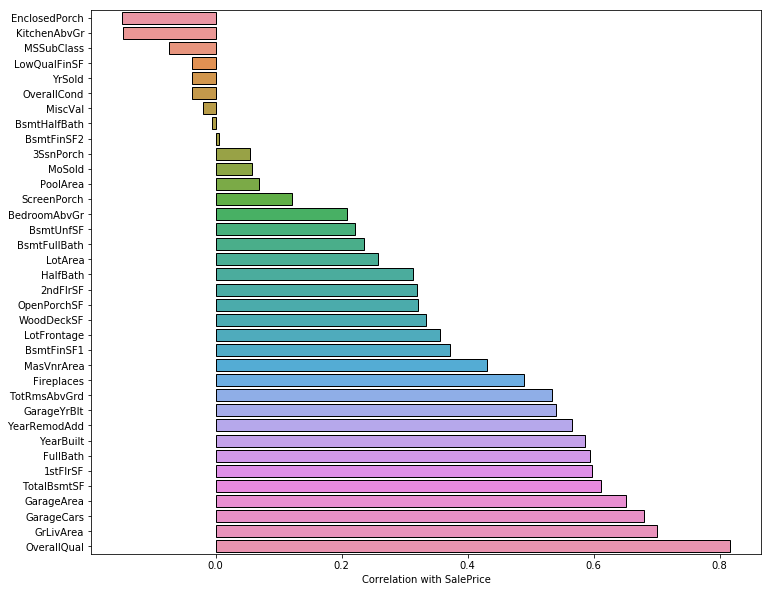

In [18]:
plt.figure(figsize=(12,10))
sns.barplot(y=corr_sale_price.index,x=corr_sale_price,orient='horizontal')
plt.xlabel('Correlation with SalePrice')

We can see that some features are hugely correlated with SalePrice and make real world sense, namely Overall Quality of the house, living area above ground, garage size and basement size. 

We can also see some features which are negatively correlated with SalePrice.

Let's also create a heatmap of all features!

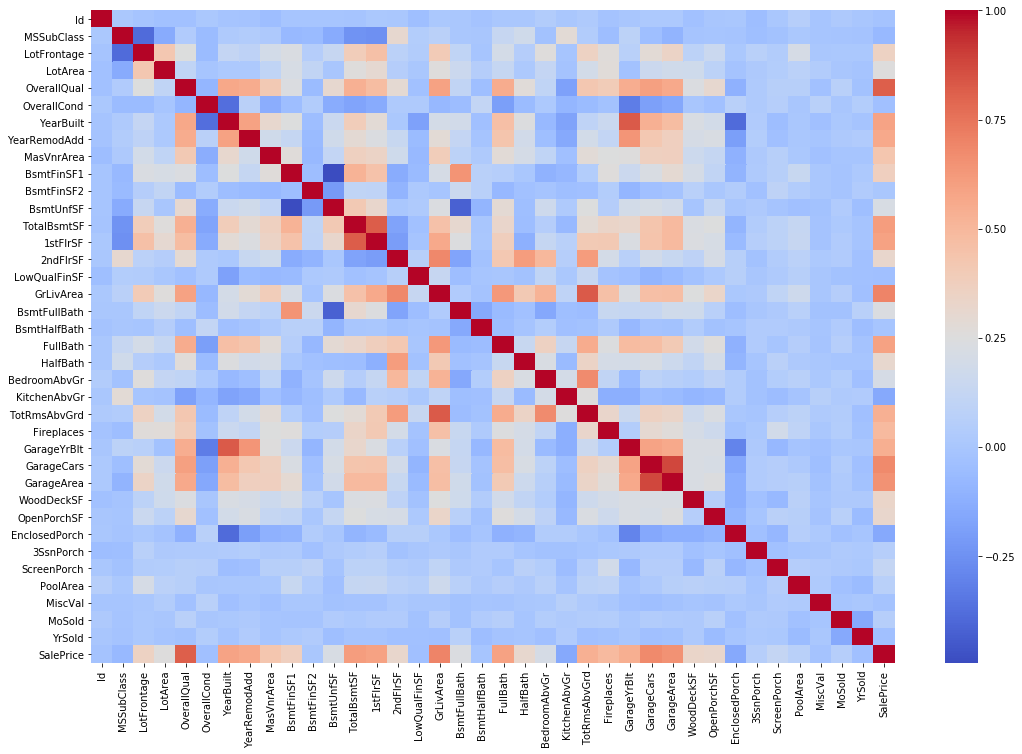

In [19]:
plt.figure(figsize=(18,12))
sns.heatmap(train.corr(),cmap='coolwarm')

__Let's print the distribution plots for the continuous variables__

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, a

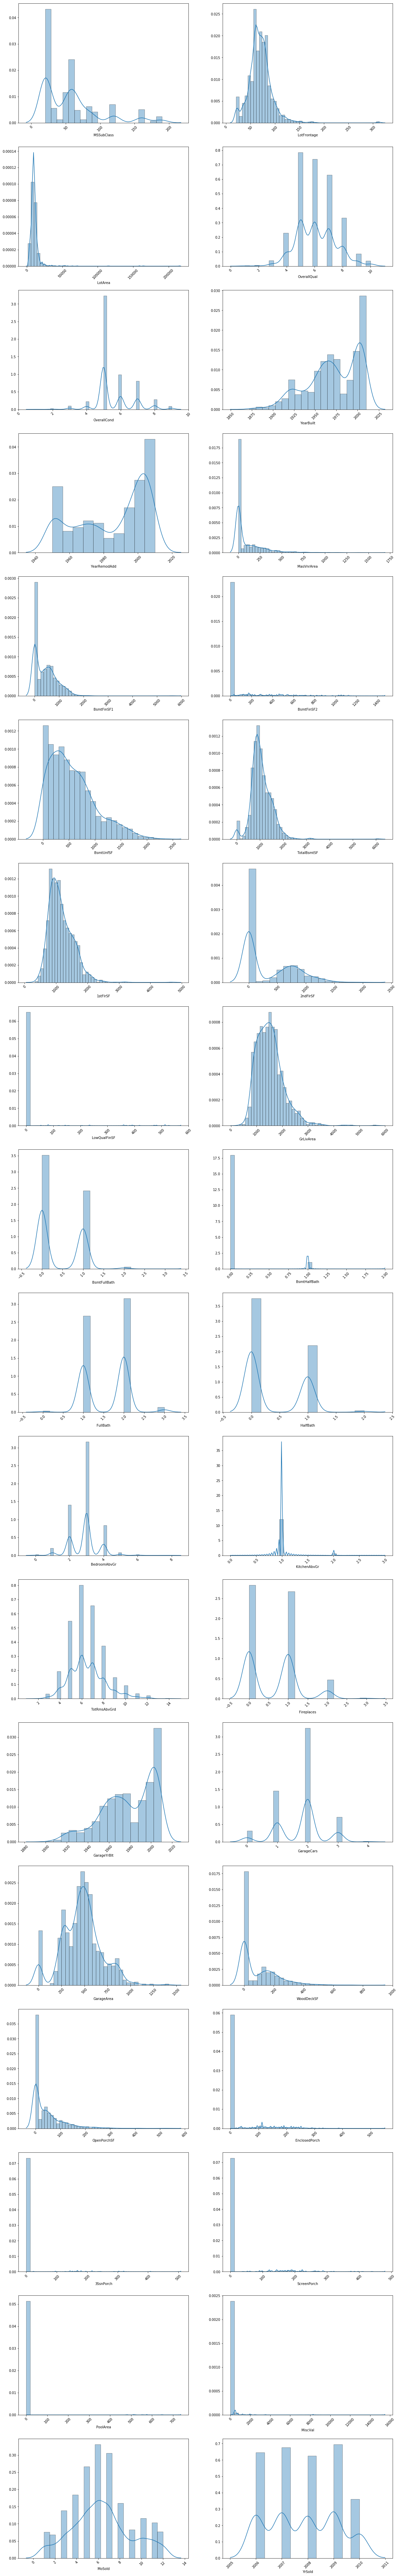

In [20]:
#Determine the number of rows and set a variable for it
n_cats = len(quantitative)

if n_cats % 2 == 0: #If n_rows is even, divide by 2
    n_rows = int(n_cats/2)
else: #If n_rows is odd, divide by 2 and add an additonal row
    n_rows = int(n_cats/2)+1

#Set subplots
fig, axs = plt.subplots(nrows = n_rows, ncols=2,figsize=(20,140))

# axes are in a two-dimensional array, indexed by [row, col]
k=0
for i in range(n_rows):
    for j in range(2):
        ax = sns.distplot(train[quantitative[k]].dropna(),ax=axs[i,j])
        #Rotate ticks 45º for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
        k+=1
        if k >= n_cats:
            break

__What about the variation of SalePrice with each numerical attribute?__

We'll plot regression plots of attributes with SalePrice

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


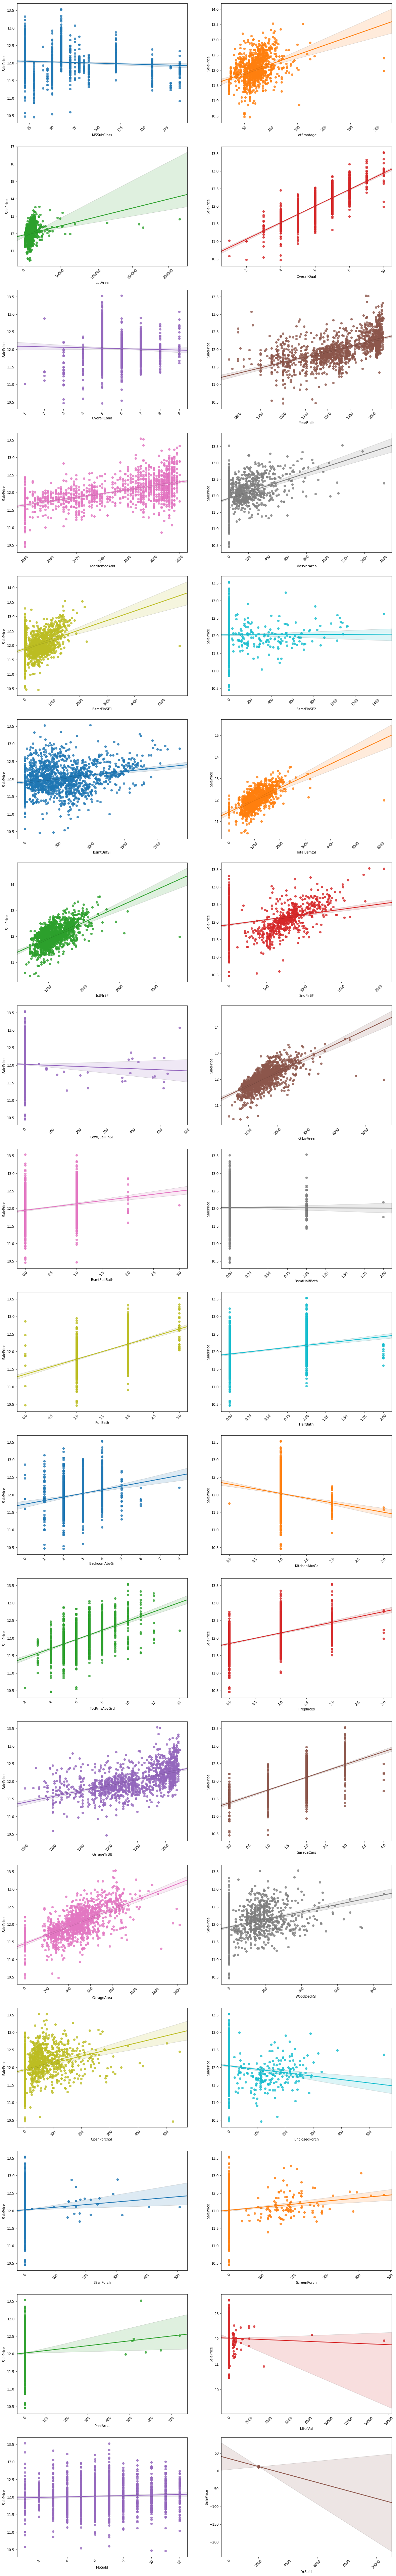

In [21]:
#Determine the number of rows and set a variable for it
n_cats = len(quantitative)

if n_cats % 2 == 0: #If n_rows is even, divide by 2
    n_rows = int(n_cats/2)
else: #If n_rows is odd, divide by 2 and add an additonal row
    n_rows = int(n_cats/2)+1

#Set subplots
fig, axs = plt.subplots(nrows = n_rows, ncols=2,figsize=(20,140))

# axes are in a two-dimensional array, indexed by [row, col]
k=0
for i in range(n_rows):
    for j in range(2):
        ax = sns.regplot(x=train[quantitative[k]],y=train['SalePrice'],ax=axs[i,j])
        #Rotate ticks 45º for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
        k+=1
        if k >= n_cats:
            break

We can already see that we have many features that are discrete rather than continuous, as well as features that are ordinal in nature, rather than numerical.

### Categorical Values

Now, let's explore categorical values!

__Let's print boxplots for all categorical attributes__

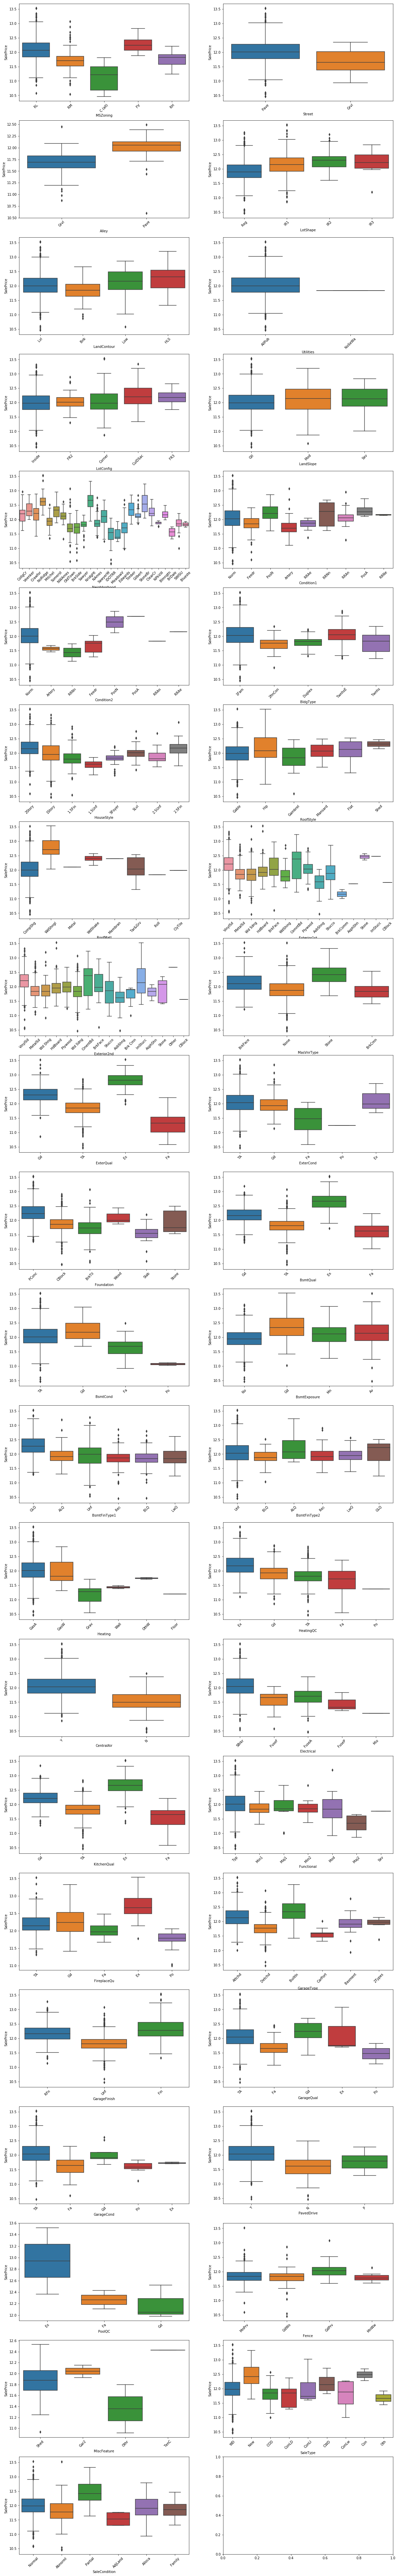

In [22]:
#Determine the number of rows and set a variable for it
n_cats = len(categorical)

if n_cats % 2 == 0: #If n_rows is even, divide by 2
    n_rows = int(n_cats/2)
else: #If n_rows is odd, divide by 2 and add an additonal row
    n_rows = int(n_cats/2)+1

#Set subplots
fig, axs = plt.subplots(nrows = n_rows, ncols=2,figsize=(20,140))

# axes are in a two-dimensional array, indexed by [row, col]
k=0
for i in range(n_rows):
    for j in range(2):
        ax = sns.boxplot(x=train[categorical[k]],y=train['SalePrice'],data=train,ax=axs[i,j])
        #Rotate ticks 45º for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
        k+=1
        if k >= n_cats:
            break

## Data Cleaning

While only a brief exploration of the data was performed, it already gives us some insights!

Let's continue, by cleaning the data, starting with the null values that need to be filed. Before doing so and as a way of reducing duplication of operations, let's join the training and test sets.

To accelerate the cleaning process, let's join the train and test sets!

In [23]:
#Store the size of train set in a variable for later splitting using the ID attribute
train_size = len(train)
train_size

1460

In [24]:
combined = pd.concat([train,test],sort=False).reset_index(drop=True)

In [25]:
#What is the ratio of missing values per feature?
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
FireplaceQu     0.486468
LotFrontage     0.166495
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Functional      0.000685
Utilities       0.000685
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
BsmtFinSF1      0.000343
TotalBsmtSF     0.000343
SaleType        0.000343
KitchenQual     0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
GarageCars      0.000343
GarageArea      0.000343
Electrical      0.000343
dtype: float64

### Information on attributes

Data documentation explains that some features have missing values on elements some houses don't have! These can be set to a new category "None".

Features:

- PoolQC;
- MiscFeature;
- Alley;
- Fence;
- FireplaceQu;
- GarageType;
- GarageFinish;
- GarageQual;
- GarageCond;
- BsmtQual;
- BsmtCond;
- BsmtExposure;
- BsmtFinType1;
- BsmtFinType2;

Let's deal with these first!

In [26]:
#List of "None" features
list_nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType',
               'GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure',
               'BsmtFinType1','BsmtFinType2']

In [27]:
#Let's loop through the various features!
for i in list_nones:
    combined[i].fillna('None',inplace=True)

In [28]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice       0.499829
LotFrontage     0.166495
GarageYrBlt     0.054471
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtHalfBath    0.000685
BsmtFullBath    0.000685
Functional      0.000685
Utilities       0.000685
KitchenQual     0.000343
Electrical      0.000343
SaleType        0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
GarageCars      0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343
dtype: float64

This was already hugely helpful! 

Data documentation has additional useful information, as features that we filled previously have numerical counterparts with missing values instead of 0 values (house does not have the feature).

These features are:
- GarageYrBlt;
- MasVnrArea;
- BsmtUnfSF;
- BsmtFinSF1;
- BsmtFinSF2;
- TotalBsmtSF;
- BsmtFullBath;
- BsmtHalfBath;
- GarageCars;
- GarageArea.

In [29]:
list_zeros = ['GarageYrBlt','MasVnrArea','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2',
              'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']

In [30]:
#Let's loop through the various features and set zeros!
for i in list_zeros:
    combined[i].fillna(0,inplace=True)

In [31]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice      0.499829
LotFrontage    0.166495
MasVnrType     0.008222
MSZoning       0.001370
Functional     0.000685
Utilities      0.000685
SaleType       0.000343
KitchenQual    0.000343
Electrical     0.000343
Exterior2nd    0.000343
Exterior1st    0.000343
dtype: float64

The remaining missing values will need to be dealt with! Let's start with LotFrontage.

There is a feature called LotArea. Most houses are built in square or rectangular plots. Let's see if there is a good correlation between these variables.

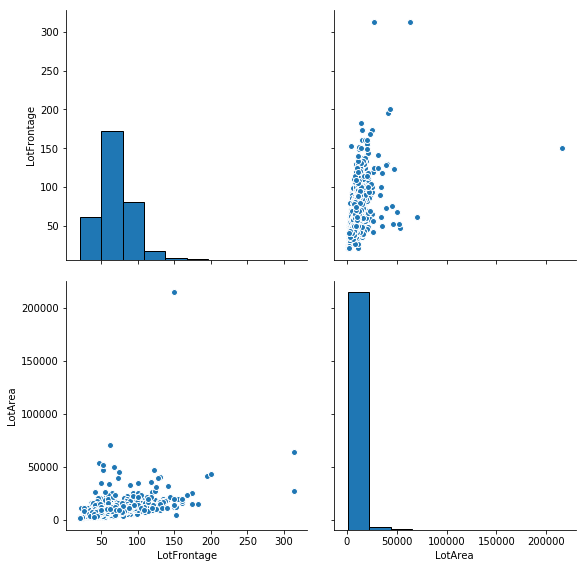

In [32]:
sns.pairplot(data=combined[['LotFrontage','LotArea']].dropna(),size=4)

What's the correlation?

In [33]:
print('Correlation value: {:.3f}'.format(combined['LotFrontage'].corr(combined['LotArea'])))

Correlation value: 0.490


The correlation is not as high as we'd hope.

__We are however comparing a length with an area! If we perform a sqrt tranformation on LotArea__, how does the correlation change?

In [34]:
print('Correlation value: {:.3f}'.format(combined['LotFrontage'].corr(np.sqrt(combined['LotArea']))))

Correlation value: 0.648


Correlation has improved somewhat! For this we have assumed a square lot. Let's see how this dimension compares to LotFrontage

In [35]:
combined['Lot_dim'] = np.sqrt(combined['LotArea'])
combined[['LotFrontage','Lot_dim']].head()

LotFrontage     Lot_dim
0         65.0   91.923882
1         80.0   97.979590
2         68.0  106.066017
3         60.0   97.724101
4         84.0  119.415242

In [36]:
(combined['Lot_dim']/combined['LotFrontage']).describe()

count    2433.000000
mean        1.464006
std         0.385545
min         0.419423
25%         1.234909
50%         1.386750
75%         1.609314
max         4.921475
dtype: float64

In [37]:
#Sum of absolute of difference between features
abs(combined['Lot_dim']-combined['LotFrontage']).sum()

67487.23798291334

There is some difference visible between the LotFrontage and Lot_dim features. Specifically, it seems that Lot_dim is mostly larger than LotFrontage (apart from a very small % of houses). Can we scale this dimension to better fit LotFrontage, via the median value?

In [38]:
combined['Lot_dim'] = combined['Lot_dim']/((combined['Lot_dim']/combined['LotFrontage']).median())

In [39]:
(combined['Lot_dim']/combined['LotFrontage']).describe()

count    2433.000000
mean        1.055710
std         0.278020
min         0.302450
25%         0.890505
50%         1.000000
75%         1.160493
max         3.548926
dtype: float64

In [40]:
#Sum of absolute of difference between features
abs(combined['Lot_dim']-combined['LotFrontage']).sum()

28514.97312150352

Not only is the difference balanced around the median, but we can see that std as reduced significantly, from 0.385545 to 0.278020. This can be cross-checked with the absolute differences that reduced by around 50%, representing a vast improvement of similarity between the features LotFrontage and Lot_dim.

Let's use this adjusted feature to fill missing values of LotFrontage!

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


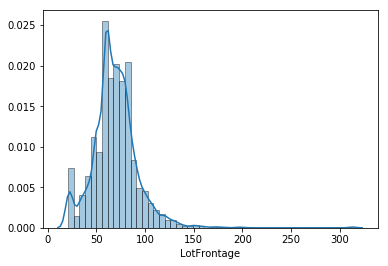

In [41]:
sns.distplot(a=combined['LotFrontage'].dropna())

In [42]:
#Fill in the missing values
filt = combined['LotFrontage'].isnull()

combined.loc[filt,'LotFrontage'] = combined[filt]['Lot_dim']

In [43]:
#Drop the auxiliary feature Lot_dim
combined.drop('Lot_dim',axis=1,inplace=True)

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


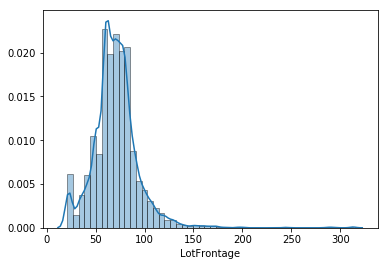

In [44]:
#Disttribution plot of LotFrontage after filling missing values
sns.distplot(a=combined['LotFrontage'])

Distribution does not seem to have changed shape due to the Missing Values that were filled which is a good sign!

In [45]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice      0.499829
MasVnrType     0.008222
MSZoning       0.001370
Functional     0.000685
Utilities      0.000685
SaleType       0.000343
KitchenQual    0.000343
Electrical     0.000343
Exterior2nd    0.000343
Exterior1st    0.000343
dtype: float64

__Remaining Features__

- MSZoning: Categorical;
- Functional: Categorical;
- Utilities: Categorical. Only has 2 features;
- SaleType: Categorical;
- KitchenQual: Categorical;
- Electrical: Categorical;
- Exterior2nd: Categorical;
- Exterior1st: Categorical;
- MasVnrType: Categorical;

Let's start with Utilities:

In [46]:
combined['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [47]:
combined[combined['Utilities'] == 'NoSeWa']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
944  945          20       RL    86.458082    14375   Pave  None      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
944         Lvl    NoSeWa   CulDSac       Gtl       Timber       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
944       Norm     1Fam       SLvl            6            6       1958   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
944          1958     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
944       541.0        TA        TA     CBlock       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
944          GLQ       111.0          Rec       354.0      354.0        819.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
944    GasA        Gd          Y      FuseA      1344         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
944       1344           0.0           1.0         1         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
944             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
944          Gd    Basment       1958.0          RFn         2.0       525.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
944         TA         TA          Y           0          118              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
944          0          233         0   None  None        None        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
944       1    2009      COD       Abnorml  11.831386

Utilities only has 2 categories and 1 of them only applies to 1 case! Let's drop the feature altogether.

In [48]:
combined.drop('Utilities',axis=1,inplace=True)

The remaining features have few Missing Values and will be filled with the mode.

In [49]:
#Create a list with the features that will be filled with the mode.
list_mode = ['MSZoning','Functional','SaleType','KitchenQual','Electrical','Exterior2nd','Exterior1st','MasVnrType']

for i in list_mode:
    combined[i].fillna(combined[i].mode()[0],inplace=True )   

In [50]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice    0.499829
dtype: float64

__All missing values are dealt with!__

### Dealing with Outliers

In the Ames Housing Dataset paper that acompanies this challenge, it is indicated that some Outliers can be identified and should be removed:

" Although all known errors were corrected in the data, no observations have been removed due to unusual values and all final residential sales from the initial data set are included in the data presented with this article. There are five observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students. "

Let's proceed accordingly:

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


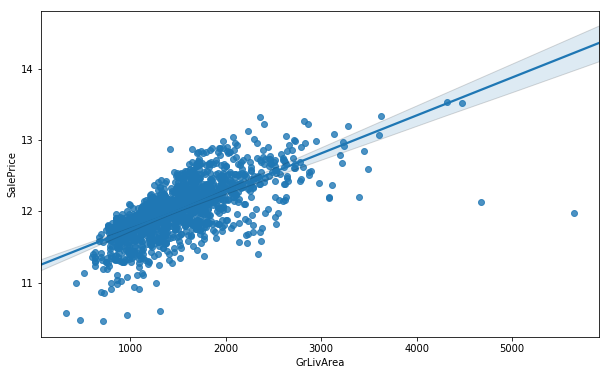

In [51]:
figure = plt.figure(figsize=(10,6))
sns.regplot(x='GrLivArea',y='SalePrice',data=combined)

2 Outliers are clearly visible on the middle right of the graph. The other must be one of the other two above 4000.

Let's proceed accodring to suggestion on Ames paper and remove all houses with more than 4000 of GrLivArea.

In [52]:
#Let's check houses with more than 4000 of GrLivArea
combined[(combined['GrLivArea']  > 4000) & (combined['Id'] <= 1460)].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave  None      IR1   
691    692          60       RL        104.0    21535   Pave  None      IR1   
1182  1183          60       RL        160.0    15623   Pave  None      IR1   
1298  1299          60       RL        313.0    63887   Pave  None      IR3   

     LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
523          Bnk    Inside       Gtl      Edwards       PosN       PosN   
691          Lvl    Corner       Gtl      NoRidge       Norm       Norm   
1182         Lvl    Corner       Gtl      NoRidge       Norm       Norm   
1298         Bnk    Corner       Gtl      Edwards      Feedr       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
523      1Fam     2Story           10            5       2007          2008   
691      1Fam     2Story           10            6       1994          1995   
1182     1Fam     2Story           10            5       1996          1996   
1298     1Fam     2Story           10            5       2008          2008   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
523        Hip  CompShg     CemntBd     CmentBd      Stone       762.0   
691      Gable  WdShngl     HdBoard     HdBoard    BrkFace      1170.0   
1182       Hip  CompShg     Wd Sdng     ImStucc       None         0.0   
1298       Hip  ClyTile      Stucco      Stucco      Stone       796.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
523         Ex        TA      PConc       Ex       TA           Gd   
691         Ex        TA      PConc       Ex       TA           Gd   
1182        Gd        TA      PConc       Ex       TA           Av   
1298        Ex        TA      PConc       Ex       TA           Gd   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
523           GLQ      2260.0          Unf         0.0      878.0   
691           GLQ      1455.0          Unf         0.0      989.0   
1182          GLQ      2096.0          Unf         0.0      300.0   
1298          GLQ      5644.0          Unf         0.0      466.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
523        3138.0    GasA        Ex          Y      SBrkr      3138      1538   
691        2444.0    GasA        Ex          Y      SBrkr      2444      1872   
1182       2396.0    GasA        Ex          Y      SBrkr      2411      2065   
1298       6110.0    GasA        Ex          Y      SBrkr      4692       950   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
523              0       4676           1.0           0.0         3         1   
691              0       4316           0.0           1.0         3         1   
1182             0       4476           1.0           0.0         3         1   
1298             0       5642           2.0           0.0         2         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
523              3             1          Ex            11        Typ   
691              4             1          Ex            10        Typ   
1182             4             1          Ex            10        Typ   
1298             3             1          Ex            12        Typ   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
523            1          Gd    BuiltIn       2007.0          Fin         3.0   
691            2          Ex     Attchd       1994.0          Fin         3.0   
1182           2          TA     Attchd       1996.0          Fin         3.0   
1298           3          Gd     Attchd       2008.0          Fin         2.0   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
523        884.0         TA         TA          Y         208          406   
691        832.0         TA     

In [53]:
#Let's remove these outliers!
combined = combined[(combined['GrLivArea']  <= 4000) | (combined['Id'] > 1460)]

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


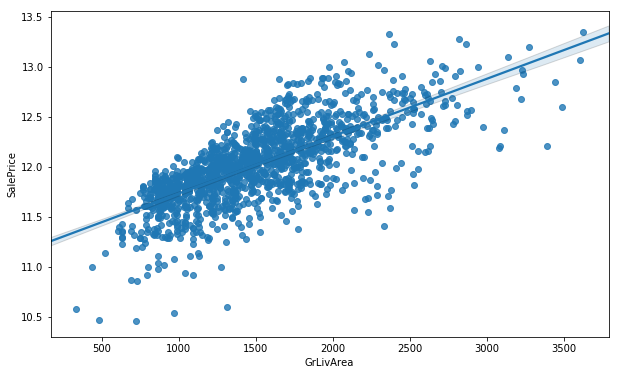

In [54]:
figure = plt.figure(figsize=(10,6))
sns.regplot(x='GrLivArea',y='SalePrice',data=combined)

(The method of exploring outliers is based on Top 7% using ElasticNet with Interactions. I used Ridge and ElasticNet to train the training set and predict the training set. Find out the samples with unpredictable prediction results in the two algorithms as outliers)

Prepare the DataSet for Kernel Ridge and ElasticNet through an auxiliary DF called outliers.

In [55]:
#Collect the column names that are either "object" or "category" types
categorical = [i for i in combined.columns if ((combined.dtypes[i].name == 'object') or (combined.dtypes[i].name == 'category'))]

In [56]:
#OHE
outliers = combined[combined['Id']<= 1460]
y=outliers['SalePrice']
outliers = pd.get_dummies(outliers,columns=categorical)

In [57]:
#outliers.shape

In [58]:
#y.shape

In [59]:
outliers.drop(['SalePrice','Id'],axis=1,inplace = True)

In [60]:
#outliers.head()

In [61]:
rr = KernelRidge(alpha=10)
rr.fit(outliers, y)
np.sqrt(-cross_val_score(rr, outliers, y, cv=10, scoring="neg_mean_squared_error")).mean()

0.11250345469880467

In [62]:
y_pred = rr.predict(outliers)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers1 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers1

array([  13,   30,   66,   88,  107,  142,  218,  277,  308,  318,  328,
        365,  410,  431,  462,  473,  479,  495,  532,  559,  580,  587,
        627,  631,  680,  687,  708,  712,  726,  736,  738,  772,  810,
        872,  883,  914,  933,  966,  968, 1060, 1120, 1179, 1208, 1320,
       1333, 1376, 1379, 1428, 1449], dtype=int64)

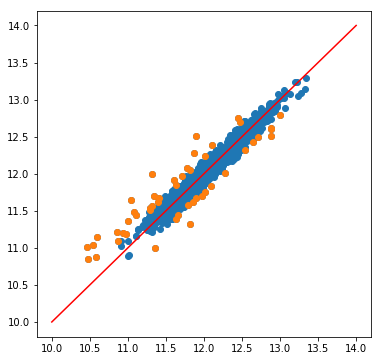

In [63]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y.iloc[outliers1], y_pred[outliers1])
plt.plot(range(10, 15), range(10, 15), color="red")

__Elastic Net__

In [64]:
er = ElasticNet(alpha=0.001, l1_ratio=0.58)
er.fit(outliers, y)
np.sqrt(-cross_val_score(rr, outliers, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.11519958589820005

In [65]:
y_pred = er.predict(outliers)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers2 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers2

array([  30,   66,   70,   88,  107,  142,  218,  277,  308,  328,  335,
        410,  431,  451,  457,  462,  479,  495,  528,  532,  559,  580,
        587,  627,  631,  661,  665,  680,  687,  708,  709,  712,  726,
        736,  745,  772,  810,  872,  883,  914,  966,  968, 1060, 1120,
       1179, 1208, 1320, 1321, 1333, 1379, 1428, 1449], dtype=int64)

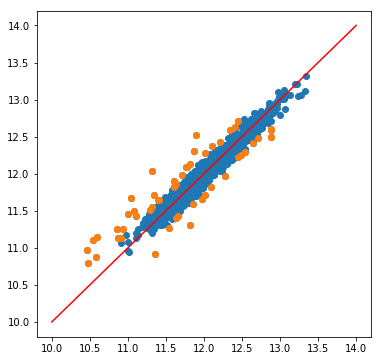

In [66]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y.iloc[outliers2], y_pred[outliers2])
plt.plot(range(10, 15), range(10, 15), color="red")

In [67]:
outliers = []
for i in outliers1:
    for j in outliers2:
        if i == j:
            outliers.append(i)
outliers = outliers[::-1]

In [68]:
#print(outliers)

In [69]:
outliers = [30, 88, 410, 462, 495, 588, 628, 632, 874, 898, 968, 970, 1324, 1432]

Let's eliminate these outliers from the DataFrame!

In [70]:
combined = combined.drop(outliers,axis=0)

## Feature Engineering

Let's start by looking into the YearBuilt feature.

In [71]:
print('There is a correlation between "YearBuilt" and "SalePrice" of {:.4f}'.format(combined['YearBuilt'].corr(combined['SalePrice'])))

There is a correlation between "YearBuilt" and "SalePrice" of 0.5861


C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


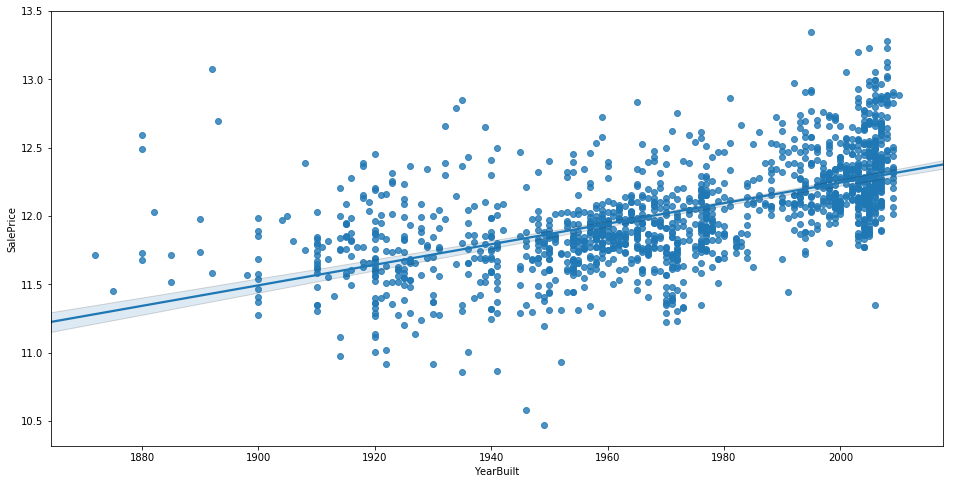

In [72]:
plt.figure(figsize=(16,8))
sns.regplot(x='YearBuilt',y='SalePrice',data=combined)

There is a reasonable correlation between this feature and SalePrice. However, there are outliers spread along the data and differences in variance that can be seen in older houses, when compared with more recent ones! 

Let's consider binning this data according to the decade the house was built (this case, 14 bins corresponding to the 140 years this data spans).

In [73]:
combined['YearBuilt_Bins'] = pd.cut(combined['YearBuilt'],bins=14)

In [74]:
combined.groupby('YearBuilt_Bins')['SalePrice'].describe()

count       mean       std        min        25%  \
YearBuilt_Bins                                                           
(1871.862, 1881.857]    6.0  11.941834  0.477319  11.451061  11.683598   
(1881.857, 1891.714]    5.0  11.795123  0.211884  11.512935  11.715874   
(1891.714, 1901.571]   14.0  11.783072  0.511722  11.277216  11.481311   
(1901.571, 1911.429]   22.0  11.730083  0.247446  11.302217  11.612749   
(1911.429, 1921.286]   73.0  11.742913  0.324282  10.976799  11.561725   
(1921.286, 1931.143]   75.0  11.682159  0.323862  10.915107  11.512435   
(1931.143, 1941.0]     71.0  11.789931  0.410573  10.859018  11.568817   
(1941.0, 1950.857]     65.0  11.703832  0.329549  10.471978  11.603689   
(1950.857, 1960.714]  163.0  11.854036  0.247085  10.933000  11.732069   
(1960.714, 1970.571]  179.0  11.896148  0.243749  11.225257  11.767575   
(1970.571, 1980.429]  173.0  11.920377  0.280933  11.231901  11.751950   
(1980.429, 1990.286]   63.0  12.163493  0.290848  11.626263  12.003034   
(1990.286, 2000.143]  173.0  12.264381  0.271574  11.445727  12.083911   
(2000.143, 2010.0]    360.0  12.355513  0.310538  11.344519  12.132902   

                            50%        75%        max  
YearBuilt_Bins                                         
(1871.862, 1881.857]  11.719915  12.300394  12.594734  
(1881.857, 1891.714]  11.735277  11.979805  12.031725  
(1891.714, 1901.571]  11.579407  11.880364  13.071072  
(1901.571, 1911.429]  11.746010  11.824067  12.388398  
(1911.429, 1921.286]  11.759793  11.950541  12.452937  
(1921.286, 1931.143]  11.669083  11.866950  12.363081  
(1931.143, 1941.0]    11.744045  11.982935  12.850557  
(1941.0, 1950.857]    11.736077  11.870607  12.466516  
(1950.857, 1960.714]  11.842236  11.951187  12.721889  
(1960.714, 1970.571]  11.877576  12.037656  12.834684  
(1970.571, 1980.429]  11.908347  12.100162  12.751303  
(1980.429, 1990.286]  12.116700  12.340389  12.861001  
(1990.286, 2000.143]  12.220966  12.421188  13.345509  
(2000.143, 2010.0]    12.323638  12.543440  13.275829

There is a clear tendency for recent houses (from the 80's onwards) commanding ever rising prices. This is not true of older decades, and rises and falls can be captured this way. 

Note that the 1870 decade has a mean price comparable only to 1970's onwards and some low points can be seen in the 1900's and 1920's!

Let's therefore drop the feature'YearBuilt' and use this new feature in OHE form.

In [75]:
combined.drop('YearBuilt',axis=1,inplace=True)

To facilitate future tests with including and excluding features, let's make a copy of the combined DataFrame and use the copy for feature pre-processing and engineering!

In [76]:
aux_DF = combined.copy()

In [77]:
#combined = aux_DF

__Area Features__

- LotFrontage;
- LotArea;
- BsmtUnfSF - Unfinished square feet of basement area;
- BsmtFinSF1 - Type 1 finished square feet;
- BsmtFinSF2 - Type 2 finished square feet;
- BsmtUnfSF: Unfinished square feet of basement area;
- TotalBsmtSF: Total square feet of basement area;
- 1stFlrSF;
- 2ndFlrSF;
- GrLivArea - Above grade (ground) living area square feet;
- WoodDeckSF;
- OpenPorchSF;
- EnclosedPorch;
- 3SsnPorch;
- ScreenPorch.

In [78]:
combined[['LotFrontage','LotArea','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GarageArea','SalePrice']].corr()

LotFrontage   LotArea  1stFlrSF  2ndFlrSF  GrLivArea  \
LotFrontage       1.000000  0.595256  0.416364  0.010956   0.334007   
LotArea           0.595256  1.000000  0.312521  0.022713   0.263726   
1stFlrSF          0.416364  0.312521  1.000000 -0.275094   0.540418   
2ndFlrSF          0.010956  0.022713 -0.275094  1.000000   0.655340   
GrLivArea         0.334007  0.263726  0.540418  0.655340   1.000000   
WoodDeckSF        0.132309  0.155604  0.225763  0.083784   0.247646   
OpenPorchSF       0.139915  0.092309  0.228494  0.183932   0.338147   
EnclosedPorch     0.027819  0.023849 -0.062216  0.057742   0.009138   
3SsnPorch         0.039024  0.016668  0.045950 -0.032447   0.007289   
ScreenPorch       0.064155  0.055672  0.102638  0.012237   0.091440   
GarageArea        0.324922  0.202442  0.481687  0.121304   0.476796   
SalePrice         0.348982  0.263146  0.615807  0.313109   0.725351   

               WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
LotFrontage      0.132309     0.139915       0.027819   0.039024     0.064155   
LotArea          0.155604     0.092309       0.023849   0.016668     0.055672   
1stFlrSF         0.225763     0.228494      -0.062216   0.045950     0.102638   
2ndFlrSF         0.083784     0.183932       0.057742  -0.032447     0.012237   
GrLivArea        0.247646     0.338147       0.009138   0.007289     0.091440   
WoodDeckSF       1.000000     0.037586      -0.117438  -0.003992    -0.052164   
OpenPorchSF      0.037586     1.000000      -0.062607  -0.009168     0.049649   
EnclosedPorch   -0.117438    -0.062607       1.000000  -0.032815    -0.064133   
3SsnPorch       -0.003992    -0.009168      -0.032815   1.000000    -0.029702   
ScreenPorch     -0.052164     0.049649      -0.064133  -0.029702     1.000000   
GarageArea       0.234207     0.232679      -0.105088   0.029800     0.063261   
SalePrice        0.332831     0.355013      -0.137956   0.055854     0.123541   

               GarageArea  SalePrice  
LotFrontage      0.324922   0.348982  
LotArea          0.202442   0.263146  
1stFlrSF         0.481687   0.615807  
2ndFlrSF         0.121304   0.313109  
GrLivArea        0.476796   0.725351  
WoodDeckSF       0.234207   0.332831  
OpenPorchSF      0.232679   0.355013  
EnclosedPorch   -0.105088  -0.137956  
3SsnPorch        0.029800   0.055854  
ScreenPorch      0.063261   0.123541  
GarageArea       1.000000   0.654777  
SalePrice        0.654777   1.000000

__Porch related areas__

In [79]:
aux_DF[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sample(10)

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
2448         280            0            143          0            0
833            0            0              0          0          152
912            0            0            112          0          120
2364         160           56              0          0            0
2850         120           48              0          0            0
560            0            0              0          0           95
955            0            0              0          0            0
1993         144           44              0          0            0
1267         144           76              0          0            0
1992         100           35              0          0            0

There are many various Porch related area features. Can these be combined in a single Porch Area?

In [80]:
#Combine all Porch areas into one new feature
aux_DF['PorchArea'] = aux_DF['WoodDeckSF']+aux_DF['OpenPorchSF']+aux_DF['EnclosedPorch']+aux_DF['3SsnPorch']+aux_DF['ScreenPorch']

In [81]:
aux_DF[['LotFrontage','LotArea','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PorchArea','GarageArea','SalePrice']].corr()

LotFrontage   LotArea  BsmtUnfSF  1stFlrSF  2ndFlrSF  \
LotFrontage       1.000000  0.595256   0.094785  0.416364  0.010956   
LotArea           0.595256  1.000000   0.021956  0.312521  0.022713   
BsmtUnfSF         0.094785  0.021956   1.000000  0.304001 -0.000455   
1stFlrSF          0.416364  0.312521   0.304001  1.000000 -0.275094   
2ndFlrSF          0.010956  0.022713  -0.000455 -0.275094  1.000000   
GrLivArea         0.334007  0.263726   0.240895  0.540418  0.655340   
WoodDeckSF        0.132309  0.155604  -0.039104  0.225763  0.083784   
OpenPorchSF       0.139915  0.092309   0.123854  0.228494  0.183932   
EnclosedPorch     0.027819  0.023849   0.006623 -0.062216  0.057742   
3SsnPorch         0.039024  0.016668  -0.005671  0.045950 -0.032447   
ScreenPorch       0.064155  0.055672  -0.048508  0.102638  0.012237   
PorchArea         0.203259  0.193716   0.005373  0.292790  0.165582   
GarageArea        0.324922  0.202442   0.166348  0.481687  0.121304   
SalePrice         0.348982  0.263146   0.235009  0.615807  0.313109   

               GrLivArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
LotFrontage     0.334007    0.132309     0.139915       0.027819   0.039024   
LotArea         0.263726    0.155604     0.092309       0.023849   0.016668   
BsmtUnfSF       0.240895   -0.039104     0.123854       0.006623  -0.005671   
1stFlrSF        0.540418    0.225763     0.228494      -0.062216   0.045950   
2ndFlrSF        0.655340    0.083784     0.183932       0.057742  -0.032447   
GrLivArea       1.000000    0.247646     0.338147       0.009138   0.007289   
WoodDeckSF      0.247646    1.000000     0.037586      -0.117438  -0.003992   
OpenPorchSF     0.338147    0.037586     1.000000      -0.062607  -0.009168   
EnclosedPorch   0.009138   -0.117438    -0.062607       1.000000  -0.032815   
3SsnPorch       0.007289   -0.003992    -0.009168      -0.032815   1.000000   
ScreenPorch     0.091440   -0.052164     0.049649      -0.064133  -0.029702   
PorchArea       0.374524    0.741909     0.438218       0.254883   0.127575   
GarageArea      0.476796    0.234207     0.232679      -0.105088   0.029800   
SalePrice       0.725351    0.332831     0.355013      -0.137956   0.055854   

               ScreenPorch  PorchArea  GarageArea  SalePrice  
LotFrontage       0.064155   0.203259    0.324922   0.348982  
LotArea           0.055672   0.193716    0.202442   0.263146  
BsmtUnfSF        -0.048508   0.005373    0.166348   0.235009  
1stFlrSF          0.102638   0.292790    0.481687   0.615807  
2ndFlrSF          0.012237   0.165582    0.121304   0.313109  
GrLivArea         0.091440   0.374524    0.476796   0.725351  
WoodDeckSF       -0.052164   0.741909    0.234207   0.332831  
OpenPorchSF       0.049649   0.438218    0.232679   0.355013  
EnclosedPorch    -0.064133   0.254883   -0.105088  -0.137956  
3SsnPorch        -0.029702   0.127575    0.029800   0.055854  
ScreenPorch       1.000000   0.301766    0.063261   0.123541  
PorchArea         0.301766   1.000000    0.267549   0.415237  
GarageArea        0.063261   0.267549    1.000000   0.654777  
SalePrice         0.123541   0.415237    0.654777   1.000000

PorchArea seems to have better correlation with SalePrice so we'll keep this feature!

__Basement Related Areas__

There are also many different Basement areas and characteristics!

Other than the numerical features, the Dataset also includes information regarding the quality of these Basement Areas. This seems like an important combination of features to explore:
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Perhaps this quality will directly influence the impact of Basement area? Let's explore!

In [82]:
aux_DF[['BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']].head()

BsmtUnfSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  SalePrice
0      150.0       706.0         0.0      150.0        856.0  12.247699
1      284.0       978.0         0.0      284.0       1262.0  12.109016
2      434.0       486.0         0.0      434.0        920.0  12.317171
3      540.0       216.0         0.0      540.0        756.0  11.849405
4      490.0       655.0         0.0      490.0       1145.0  12.429220

In [83]:
aux_DF[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']].corr()

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  SalePrice
BsmtFinSF1     1.000000   -0.054847  -0.490459     0.506958   0.379159
BsmtFinSF2    -0.054847    1.000000  -0.237822     0.095423   0.005274
BsmtUnfSF     -0.490459   -0.237822   1.000000     0.426837   0.235009
TotalBsmtSF    0.506958    0.095423   0.426837     1.000000   0.649001
SalePrice      0.379159    0.005274   0.235009     0.649001   1.000000

TotalBsmtSF seems to better correlate with the SalePrice variable. This feature is derived from [BsmtFinSF1 + BsmtFinSF2] 

However, let's plot some of these graphs and better analyse the question

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


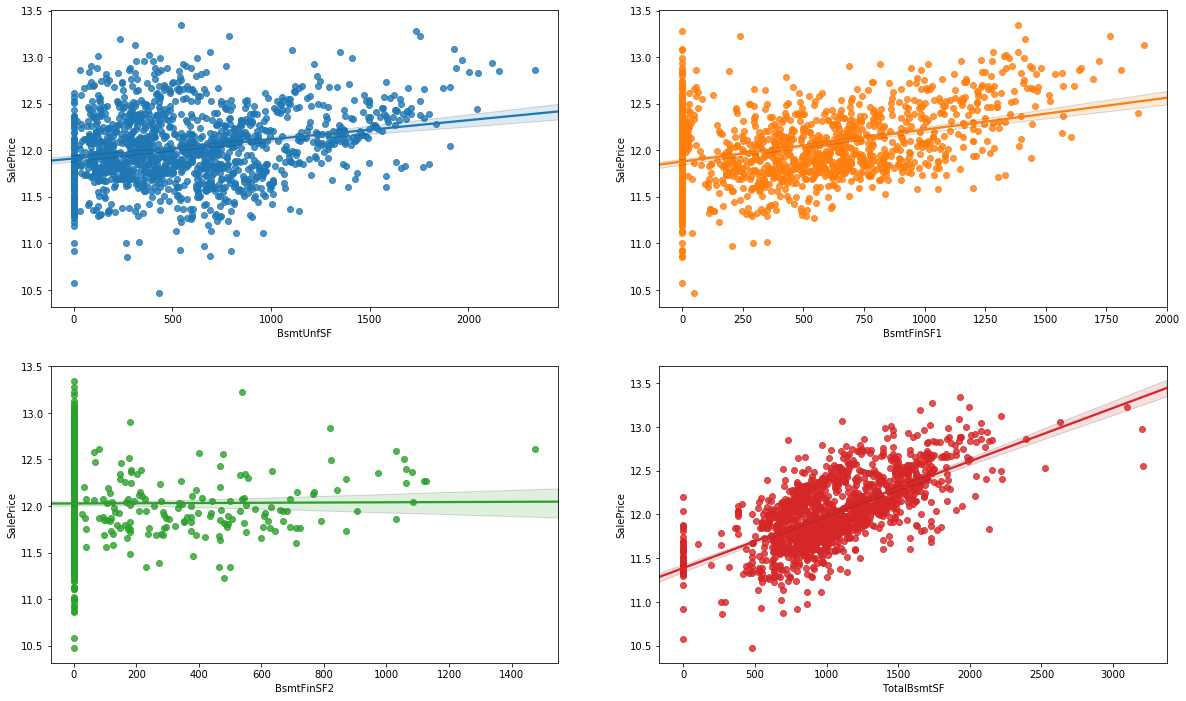

In [84]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='BsmtUnfSF',y='SalePrice',data=aux_DF,ax=axs[0,0])
ax = sns.regplot(x='BsmtFinSF1',y='SalePrice',data=aux_DF,ax=axs[0,1])
ax = sns.regplot(x='BsmtFinSF2',y='SalePrice',data=aux_DF,ax=axs[1,0])
ax = sns.regplot(x='TotalBsmtSF',y='SalePrice',data=aux_DF,ax=axs[1,1])

__OverallQual and OverallCond__

In [85]:
aux_DF[['OverallQual','OverallCond','SalePrice']].corr()['SalePrice']

OverallQual    0.823930
OverallCond   -0.049953
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [86]:
aux_DF[['OverallQual','SalePrice']].groupby('OverallQual').describe()

SalePrice                                                        \
                count       mean       std        min        25%        50%   
OverallQual                                                                   
1                 2.0  10.798825  0.310873  10.579005  10.688915  10.798825   
2                 3.0  10.825404  0.306076  10.471978  10.737047  11.002117   
3                18.0  11.380922  0.256860  10.859018  11.253098  11.399016   
4               112.0  11.577553  0.243177  10.868587  11.406102  11.592205   
5               392.0  11.785950  0.202292  10.933000  11.684939  11.798112   
6               374.0  11.967315  0.229886  11.238502  11.843134  11.982935   
7               318.0  12.224612  0.205055  11.669083  12.098242  12.208924   
8               167.0  12.500782  0.227273  11.711785  12.367345  12.506181   
9                42.0  12.780636  0.188147  12.384223  12.671443  12.747875   
10               14.0  12.958445  0.196176  12.644331  12.861812  12.976976   

                                   
                   75%        max  
OverallQual                        
1            10.908735  11.018646  
2            11.002117  11.002117  
3            11.536705  11.846544  
4            11.740069  12.452937  
5            11.898195  12.341263  
6            12.106258  12.531776  
7            12.350714  12.858322  
8            12.632975  13.195616  
9            12.857733  13.275829  
10           13.052210  13.345509

OverallQual is a highly correlated feature and seems to be Ordinal.

In [87]:
aux_DF[['OverallCond','SalePrice']].groupby('OverallCond').describe()

SalePrice                                                        \
                count       mean       std        min        25%        50%   
OverallCond                                                                   
1                 1.0  11.018646       NaN  11.018646  11.018646  11.018646   
2                 4.0  11.654100  0.827636  11.112463  11.211910  11.309367   
3                24.0  11.456659  0.449228  10.471978  11.276971  11.413055   
4                55.0  11.661313  0.313776  10.868587  11.439828  11.652696   
5               812.0  12.146412  0.380474  10.915107  11.877576  12.132835   
6               248.0  11.895288  0.283745  10.859018  11.735877  11.870607   
7               205.0  11.921365  0.309639  11.288544  11.724005  11.884496   
8                71.0  11.909945  0.296016  11.344519  11.738073  11.863589   
9                22.0  12.198872  0.409416  11.612780  11.874079  12.079303   

                                   
                   75%        max  
OverallCond                        
1            11.018646  11.018646  
2            11.751557  12.885205  
3            11.818351  12.209193  
4            11.892833  12.367345  
5            12.387207  13.345509  
6            12.054521  12.879020  
7            12.089544  12.904210  
8            12.052306  12.721889  
9            12.569334  13.071072

OverallCond on the other hand is not Ordinal and contains categories that do not seem to be very representative (only 1 sample with value 1, only 5 with value 2).

This feature must be converted to Categorical if it is to be used. However, to reduce the number of resulting OHE categories, it may be worth reducing some of the granularity by joining the data into only a couple of categories. Based on the values, it seems that it could be divided into 2 levels, "Poor" and "Good". This is a binary feature so we can instead assign to 0 and 1 values. Let's convert it!

In [88]:
aux_DF['OverallCond'] = (aux_DF['OverallCond']>= 5).astype('uint8')

__MSSubClass__

This feature identifies the type of dwelling involved in the sale. This information should be condensed on the other features and we will therefore not use it.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES


In [89]:
aux_DF[['MSSubClass','SalePrice']].groupby('MSSubClass').describe()

SalePrice                                                        \
               count       mean       std        min        25%        50%   
MSSubClass                                                                   
20             530.0  12.056304  0.375265  10.471978  11.799050  11.982607   
30              67.0  11.453715  0.255324  10.859018  11.320566  11.512935   
40               4.0  11.870430  0.486844  11.283525  11.669465  11.864877   
45              12.0  11.579043  0.190143  11.238502  11.451400  11.585082   
50             140.0  11.832023  0.310512  11.133143  11.652696  11.796229   
60             294.0  12.335631  0.276573  11.767575  12.128117  12.281183   
70              59.0  11.987228  0.315123  11.264477  11.767545  11.964007   
75              16.0  12.064786  0.447735  11.522886  11.740514  12.004570   
80              58.0  12.021831  0.194213  11.580593  11.899890  12.022739   
85              20.0  11.895873  0.126174  11.719948  11.808209  11.854481   
90              52.0  11.780928  0.209101  11.314487  11.681620  11.820270   
120             87.0  12.171560  0.275223  11.507923  11.970581  12.165256   
150              0.0        NaN       NaN        NaN        NaN        NaN   
160             63.0  11.807198  0.262061  11.225257  11.643924  11.891369   
180             10.0  11.501760  0.267467  11.231901  11.312792  11.390370   
190             30.0  11.734861  0.284856  10.915107  11.597730  11.761727   

                                  
                  75%        max  
MSSubClass                        
20          12.301387  13.226725  
30          11.612780  12.004574  
40          12.065842  12.468441  
45          11.712807  11.845110  
50          11.977347  12.923915  
60          12.497811  13.345509  
70          12.154771  12.791359  
75          12.298889  13.071072  
80          12.097508  12.751303  
85          11.972396  12.198549  
90          11.884496  12.237092  
120         12.354460  12.880294  
150               NaN        NaN  
160         12.012797  12.384223  
180         11.744442  11.904974  
190         11.875723  12.341263

In [90]:
aux_DF['MSSubClass'].describe()

count    2901.000000
mean       57.233713
std        42.608181
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

This feature should be converted into categorical if it is to be used!

In [91]:
aux_DF['MSSubClass'] = aux_DF['MSSubClass'].astype('category')

__YearRemodAdd__

This feature includes the year the house was remodeled. If never remodeled, the year is the same as the year of construction.

In [92]:
aux_DF['YearRemodAdd'].describe()

count    2901.000000
mean     1984.292658
std        20.871285
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [93]:
print('There is a correlation between "YearRemodAdd" and "SalePrice" of {:.4f}'.format(aux_DF['YearRemodAdd'].corr(combined['SalePrice'])))

There is a correlation between "YearRemodAdd" and "SalePrice" of 0.5681


C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


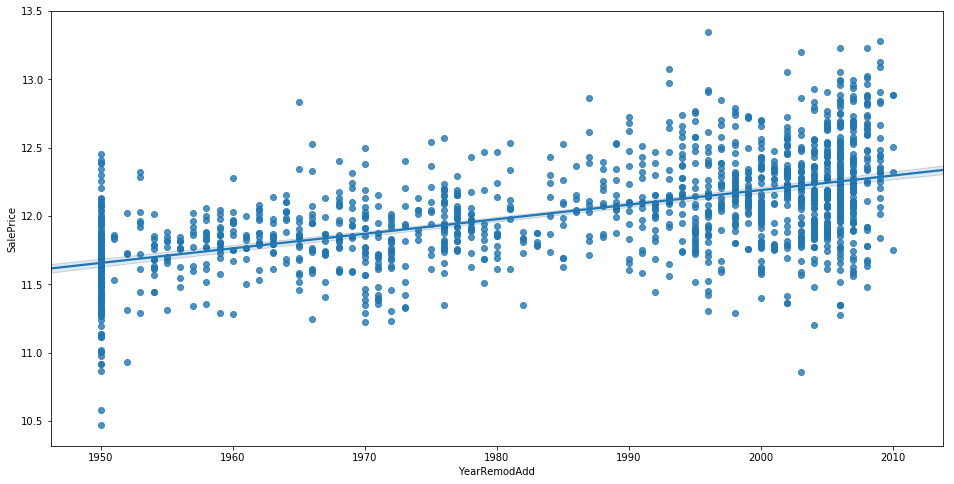

In [94]:
plt.figure(figsize=(16,8))
sns.regplot(x='YearRemodAdd',y='SalePrice',data=aux_DF)

It seems all houses from before 1950 that either were or not remodeled before this date have been given a 1950 date. 

Using this feature may be dangerous as we have no way of knowing if a house was or not remodeled. 

However, let's try and bin them by decade periods and see if any useful information can be gathered.

In [95]:
aux_DF['YearRemodAdd_Bins'] = pd.cut(aux_DF['YearRemodAdd'],bins=6)

In [96]:
aux_DF[['YearRemodAdd_Bins','SalePrice']].groupby('YearRemodAdd_Bins').describe()

SalePrice                                             \
                      count       mean       std        min        25%   
YearRemodAdd_Bins                                                        
(1949.94, 1960.0]     278.0  11.686178  0.295126  10.471978  11.534633   
(1960.0, 1970.0]      147.0  11.858372  0.251185  11.225257  11.728045   
(1970.0, 1980.0]      158.0  11.885299  0.254998  11.231901  11.735477   
(1980.0, 1990.0]       85.0  12.081022  0.292778  11.344519  11.867104   
(1990.0, 2000.0]      283.0  12.144520  0.326907  11.288544  11.942764   
(2000.0, 2010.0]      491.0  12.242658  0.371202  10.859018  11.979472   

                                                    
                         50%        75%        max  
YearRemodAdd_Bins                                   
(1949.94, 1960.0]  11.713829  11.856522  12.452937  
(1960.0, 1970.0]   11.849405  12.001512  12.834684  
(1970.0, 1980.0]   11.897514  12.043560  12.567241  
(1980.0, 1990.0]   12.072547  12.259618  12.861001  
(1990.0, 2000.0]   12.106258  12.346925  13.345509  
(2000.0, 2010.0]   12.235394  12.482887  13.275829

Grouping by bins seem to result in an ordinal feature. Let's convert it into ordinal

In [97]:
mapper = {0:'(1949.94, 1960.0]', 1: '(1960.0, 1970.0]', 2: '(1970.0, 1980.0]', 3: '(1980.0, 1990.0]', 4: '(1990.0, 2000.0]', 5: '(2000.0, 2010.0]'}
ordvar = aux_DF['YearRemodAdd_Bins'].replace(mapper)
#aux_DF['YearRemodAdd_Ord'] = aux_DF['YearRemodAdd_Bins'].replace(mapper)
print(pd.factorize(ordvar))

(array([0, 1, 0, ..., 3, 3, 3], dtype=int64), CategoricalIndex([ (2000.0, 2010.0],  (1970.0, 1980.0],  (1960.0, 1970.0],
                   (1990.0, 2000.0], (1949.94, 1960.0],  (1980.0, 1990.0]],
                 categories=[(1949.94, 1960.0], (1960.0, 1970.0], (1970.0, 1980.0], (1980.0, 1990.0], (1990.0, 2000.0], (2000.0, 2010.0]], ordered=True, dtype='category'))


In [98]:
labels = LabelEncoder()
y = labels.fit_transform(aux_DF['YearRemodAdd_Bins'].values)
y

array([5, 2, 5, ..., 4, 4, 4])

In [99]:
aux_DF['YearRemodAdd'] = labels.fit_transform(aux_DF['YearRemodAdd_Bins'].values)

__MasVnrArea__

Masonry veneer area in square feet.

Veneer is a building technique and is quite usefull for insulation. As it it built on the walls of the house, it should be directly correlated with the house wall area!

In [100]:
aux_DF['MasVnrArea'].corr(aux_DF['SalePrice'])

0.4250573628807592

This feature seems to have some correlation with the SalePrice. Let's plot it again!

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


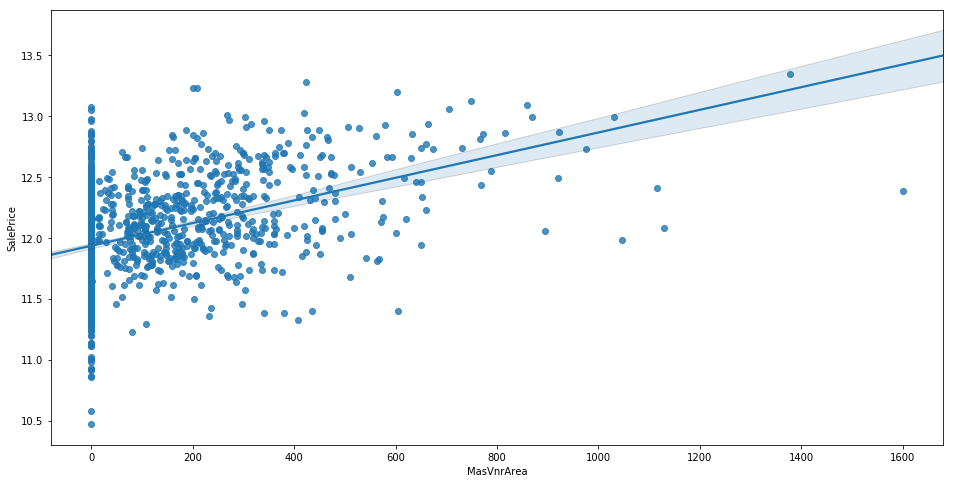

In [101]:
plt.figure(figsize=(16,8))
sns.regplot(x='MasVnrArea',y='SalePrice',data=aux_DF)

From the plot, it isn't clear that an increase in MasVnrArea leads to a higher SalePrice, as variance seems to be quite large!

I will consider that this feature is already represented by GrLivArea (house size) and MasVnrType, which includes the class and existance of Veneer and will therefore drop this feature.

__LowQualFinSF__

Low quality finished square feet (all floors)

In [102]:
aux_DF['LowQualFinSF'].corr(aux_DF['SalePrice'])

-0.029158639509697767

This feature (surprisingly) seems to have very litte correlation with SalePrice! Let's drop it.

__BsmtFullBath BsmtHalfBath FullBath HalfBath__

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

In [103]:
aux_DF[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','SalePrice']].corr()['SalePrice']

BsmtFullBath    0.230728
BsmtHalfBath   -0.017847
FullBath        0.596283
HalfBath        0.311353
SalePrice       1.000000
Name: SalePrice, dtype: float64

Unsurprisingly, bathrooms are correlated with SalePrice. However this is clearly more true in FullBath than the remaining features. Let's use groupby to further explore these features.

In [104]:
aux_DF[['FullBath','SalePrice']].groupby('FullBath').describe()

SalePrice                                                        \
             count       mean       std        min        25%        50%   
FullBath                                                                   
0              9.0  11.810881  0.721186  10.471978  11.598736  11.884496   
1            640.0  11.777932  0.278939  10.579005  11.634043  11.794345   
2            763.0  12.217561  0.320410  10.915107  12.037660  12.190964   
3             30.0  12.619090  0.397540  12.043560  12.237860  12.658590   
4              0.0        NaN       NaN        NaN        NaN        NaN   

                                
                75%        max  
FullBath                        
0         12.176654  12.861001  
1         11.925868  12.955130  
2         12.421849  13.226725  
3         12.932295  13.345509  
4               NaN        NaN

There seem to be 9 houses with no bathrooms above ground. Curiously, the houses that do not have FullBath have larger mean SalePrice than houses with 1 FullBath.

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


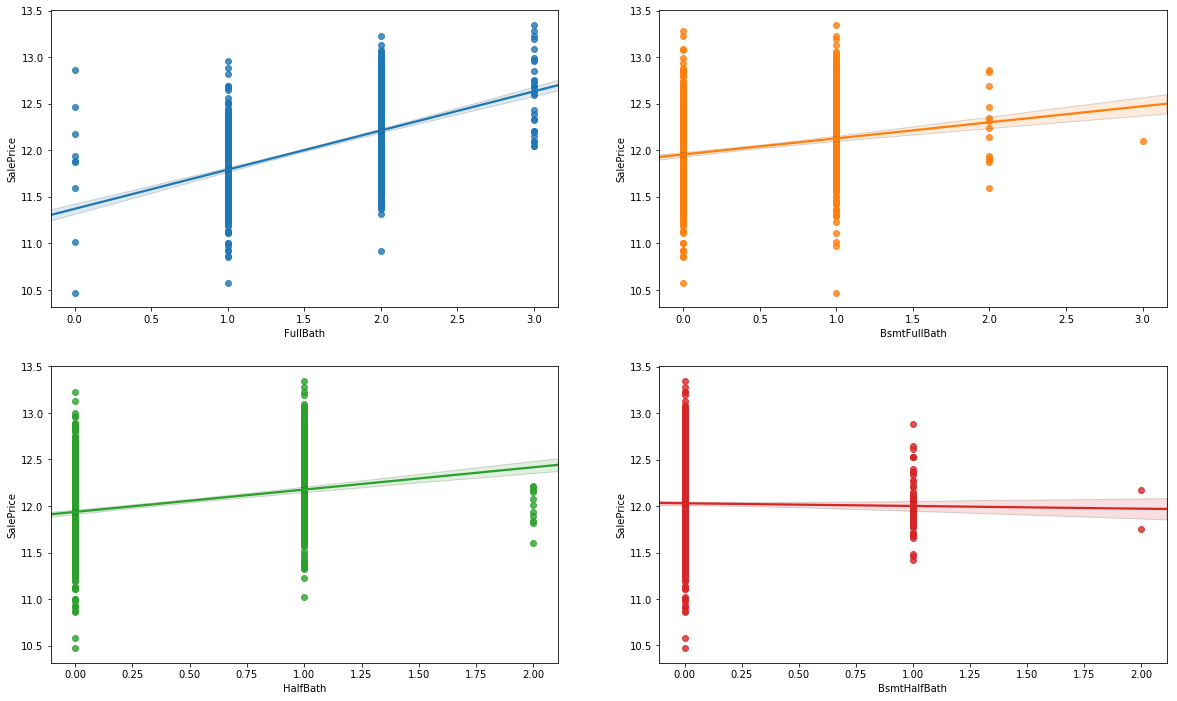

In [105]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='FullBath',y='SalePrice',data=aux_DF,ax=axs[0,0])
ax = sns.regplot(x='BsmtFullBath',y='SalePrice',data=aux_DF,ax=axs[0,1])
ax = sns.regplot(x='HalfBath',y='SalePrice',data=aux_DF,ax=axs[1,0])
ax = sns.regplot(x='BsmtHalfBath',y='SalePrice',data=aux_DF,ax=axs[1,1])

In [106]:
# As it is a discrete number, let's conserve memory
aux_DF['FullBath'] = aux_DF['FullBath'].astype('uint8')

What about HalfBath?

In [107]:
aux_DF[['HalfBath','SalePrice']].groupby('HalfBath').describe()

SalePrice                                                        \
             count       mean       std        min        25%        50%   
HalfBath                                                                   
0            903.0  11.931608  0.376224  10.471978  11.695255  11.875838   
1            528.0  12.194266  0.348436  11.018646  11.970357  12.149508   
2             11.0  11.993835  0.195598  11.598736  11.866460  12.014615   

                                
                75%        max  
HalfBath                        
0         12.154785  13.226725  
1         12.388398  13.345509  
2         12.165719  12.215037

In [108]:
# As it is a discrete number, let's conserve memory
aux_DF['HalfBath'] = aux_DF['HalfBath'].astype('uint8')

And BsmtFullBath?

In [109]:
aux_DF[['BsmtFullBath','SalePrice']].groupby('BsmtFullBath').describe()

SalePrice                                                        \
                 count       mean       std        min        25%        50%   
BsmtFullBath                                                                   
0.0              843.0  11.952972  0.363798  10.579005  11.711785  11.951187   
1.0              585.0  12.131928  0.392722  10.471978  11.849405  12.086732   
2.0               13.0  12.239858  0.395370  11.598736  11.918397  12.237092   
3.0                1.0  12.095147       NaN  12.095147  12.095147  12.095147   

                                    
                    75%        max  
BsmtFullBath                        
0.0           12.174016  13.275829  
1.0           12.394629  13.345509  
2.0           12.468441  12.861001  
3.0           12.095147  12.095147

In [110]:
# As it is a discrete number, let's conserve memory
aux_DF['BsmtFullBath'] = aux_DF['BsmtFullBath'].astype('uint8')

And BsmtHalfBath?

In [111]:
aux_DF[['BsmtHalfBath','SalePrice']].groupby('BsmtHalfBath').describe()

SalePrice                                                        \
                 count       mean       std        min        25%        50%   
BsmtHalfBath                                                                   
0.0             1362.0  12.029899  0.392238  10.471978  11.772215  12.007628   
1.0               78.0  12.001176  0.266978  11.424105  11.842236  11.976661   
2.0                2.0  11.966267  0.297533  11.755879  11.861073  11.966267   

                                    
                    75%        max  
BsmtHalfBath                        
0.0           12.278398  13.345509  
1.0           12.097508  12.880294  
2.0           12.071460  12.176654

In [112]:
aux_DF['BsmtHalfBath'] = aux_DF['BsmtHalfBath'].astype('uint8')

__BedroomAbvGr KitchenAbvGr TotRoomsAbvGrd__

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

KitchenAbvGr: Kitchens above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [113]:
aux_DF[['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','SalePrice']].corr()['SalePrice']

BedroomAbvGr    0.211798
KitchenAbvGr   -0.155878
TotRmsAbvGrd    0.533375
SalePrice       1.000000
Name: SalePrice, dtype: float64

TotRmsAbvGrd seems to be the most promising feature! But let's explore them all

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


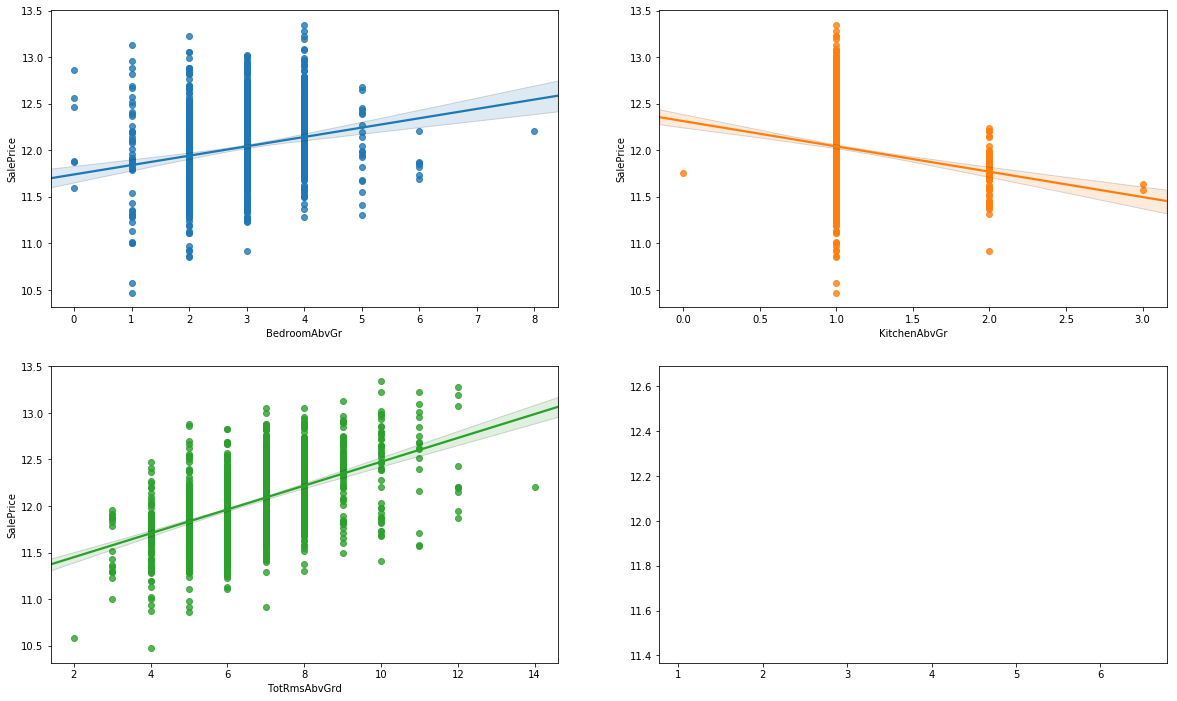

In [114]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='BedroomAbvGr',y='SalePrice',data=aux_DF,ax=axs[0,0])
ax = sns.regplot(x='KitchenAbvGr',y='SalePrice',data=aux_DF,ax=axs[0,1])
ax = sns.regplot(x='TotRmsAbvGrd',y='SalePrice',data=aux_DF,ax=axs[1,0])

It seems having more than 1 kitchen is undesirable, presumably because it is a space that is uselessly occupied! Let's use these 3 features for our model, in ordinal form.

In [115]:
aux_DF['BedroomAbvGr'] = aux_DF['BedroomAbvGr'].astype('uint8')
aux_DF['KitchenAbvGr'] = aux_DF['KitchenAbvGr'].astype('uint8')
aux_DF['TotRmsAbvGrd'] = aux_DF['TotRmsAbvGrd'].astype('uint8')

__Fireplaces__

Fireplaces: Number of fireplaces

In [116]:
aux_DF[['Fireplaces','SalePrice']].groupby('Fireplaces').describe()

SalePrice                                                        \
               count       mean       std        min        25%        50%   
Fireplaces                                                                   
0              682.0  11.818485  0.309468  10.471978  11.635152  11.817656   
1              646.0  12.204411  0.346828  11.002117  11.971147  12.154785   
2              110.0  12.277812  0.360390  11.512935  11.994578  12.235383   
3                4.0  12.482680  0.336634  12.154785  12.211774  12.491036   
4                0.0        NaN       NaN        NaN        NaN        NaN   

                                  
                  75%        max  
Fireplaces                        
0           12.013252  12.744447  
1           12.448925  13.345509  
2           12.526302  13.226725  
3           12.761942  12.793862  
4                 NaN        NaN

This is a good discrete feature. Let's use it!

In [117]:
aux_DF['Fireplaces'] = aux_DF['Fireplaces'].astype('uint8')

__GarageYrBuilt GarageCars GarageArea__

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


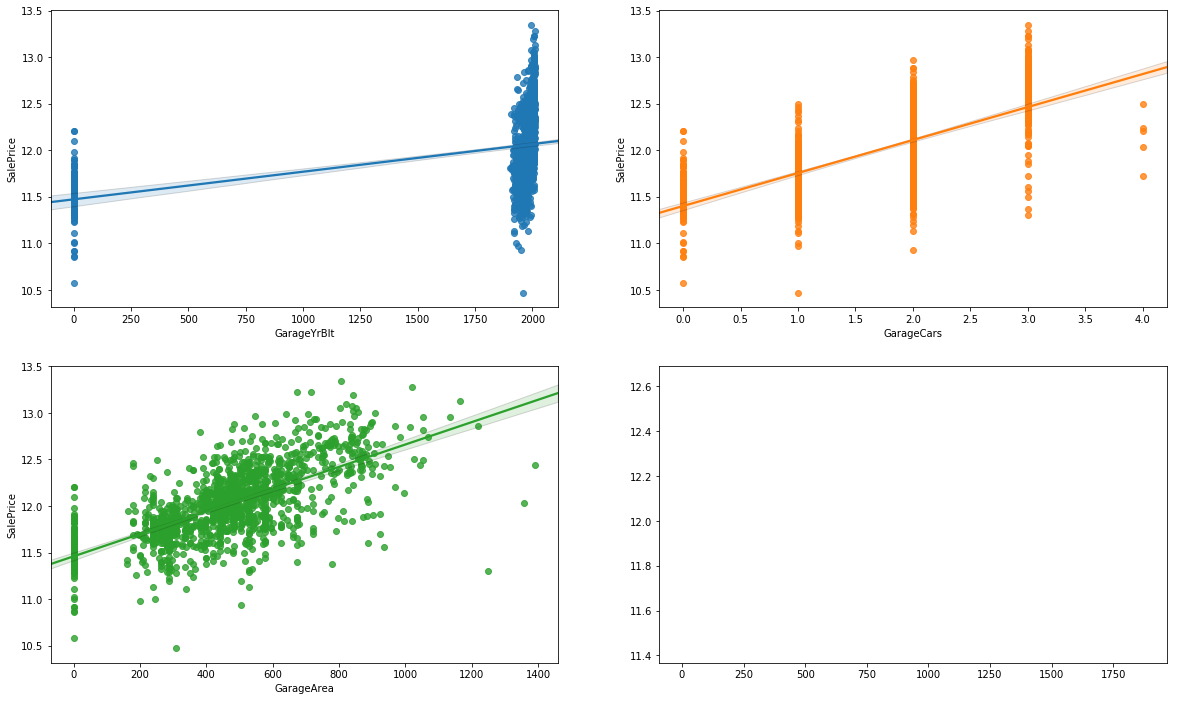

In [118]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='GarageYrBlt',y='SalePrice',data=aux_DF,ax=axs[0,0])
ax = sns.regplot(x='GarageCars',y='SalePrice',data=aux_DF,ax=axs[0,1])
ax = sns.regplot(x='GarageArea',y='SalePrice',data=aux_DF,ax=axs[1,0])

GarageArea and Garage Cars have a similar correlation to SalePrice and also seem to have a very high correlation between them.

This is logical as the larger the garage is, the more cars can be fit into it. GarageCars seems therefore to be redundant and may be dropped.

In [119]:
aux_DF[['GarageArea','GarageCars']].corr()

GarageArea  GarageCars
GarageArea    1.000000    0.891172
GarageCars    0.891172    1.000000

There are several houses without a garage!

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


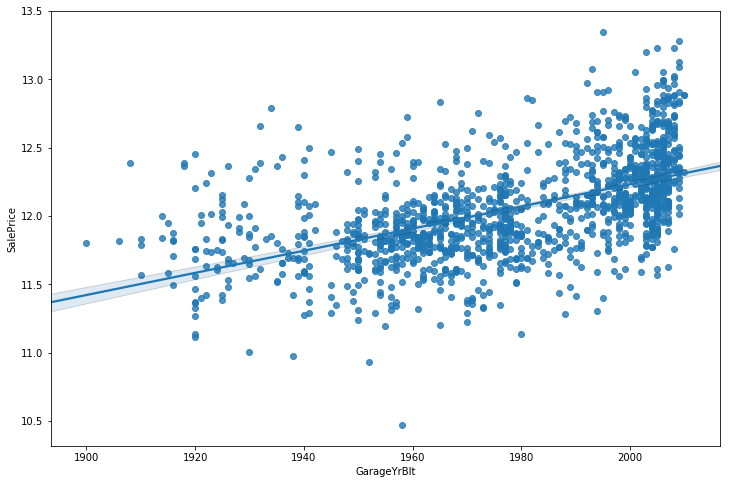

In [120]:
filt = aux_DF['GarageYrBlt'] > 0

plt.figure(figsize=(12,8))
sns.regplot(x=aux_DF[filt]['GarageYrBlt'],y=aux_DF[filt]['SalePrice'])

This feature should be divided into bins, None, Old, Modern.

In [121]:
aux = aux_DF['GarageYrBlt'].copy()

In [122]:
filt = aux_DF['GarageYrBlt'] == 0
aux[filt] = 'None'

In [123]:
filt = ((aux_DF['GarageYrBlt'] < 1990) & (aux_DF['GarageYrBlt'] > 0))
aux[filt] = 'Old'

In [124]:
filt = aux_DF['GarageYrBlt'] >= 1990
aux[filt] = 'Modern'

In [125]:
aux_DF['GarageYrBlt'] = aux

In [126]:
aux_DF[['GarageYrBlt','SalePrice']].groupby('GarageYrBlt').describe()

SalePrice                                                        \
                count       mean       std        min        25%        50%   
GarageYrBlt                                                                   
Modern          592.0  12.289711  0.323684  11.302217  12.080084  12.264346   
None             77.0  11.515276  0.308369  10.579005  11.344519  11.512935   
Old             773.0  11.879122  0.296714  10.471978  11.703554  11.850832   

                                   
                   75%        max  
GarageYrBlt                        
Modern       12.491255  13.345509  
None         11.728045  12.208575  
Old          12.040614  12.861001

In [127]:
aux_DF['GarageYrBlt'].head()

0    Modern
1       Old
2    Modern
3    Modern
4    Modern
Name: GarageYrBlt, dtype: object

In [128]:
mapper = {'None':0,'Old':1,'Modern':2}
aux_DF['GarageYrBlt'] = aux_DF['GarageYrBlt'].replace(mapper)

In [129]:
aux_DF['GarageYrBlt'].head()

0    2
1    1
2    2
3    2
4    2
Name: GarageYrBlt, dtype: int64

__Pool Area__

PoolArea: Pool area in square feet

In [130]:
aux_DF[['PoolArea','SalePrice']].corr()['PoolArea']

PoolArea     1.000000
SalePrice    0.040957
Name: PoolArea, dtype: float64

In [131]:
aux_DF[aux_DF['PoolArea']>0]['PoolArea'].count()

11

It seems there are only 12 houses with Pools!

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


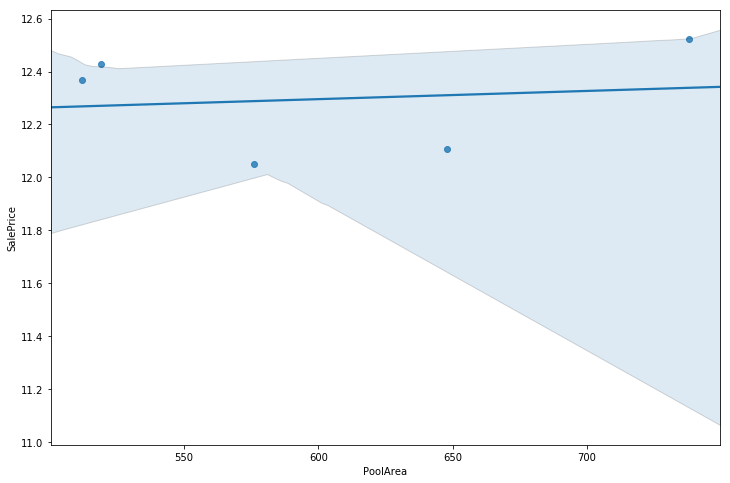

In [132]:
filt = aux_DF['PoolArea'] > 0

plt.figure(figsize=(12,8))
sns.regplot(x=aux_DF[filt]['PoolArea'],y=aux_DF[filt]['SalePrice'])

This feature does not seem to be useful and NoPoll information is already captured in PoolQC, so this will be dropped!

__MiscVal__

MiscVal: $Value of miscellaneous feature

What is this feature? What $value is this and how is it determined? Should it be added to the final SalePrice predictions directly?

In [133]:
aux_DF['MiscVal'].describe()

count     2901.000000
mean        51.141331
std        569.146217
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


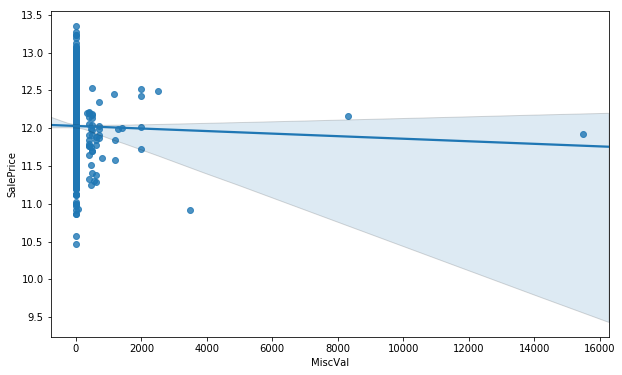

In [134]:
plt.figure(figsize=(10,6))
sns.regplot(x=aux_DF['MiscVal'], y=aux_DF['SalePrice'])

There seem to be (at least) 3 outliers! What does the feature look like without them?

In [135]:
aux = aux_DF[aux_DF['MiscVal'] <3000]

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


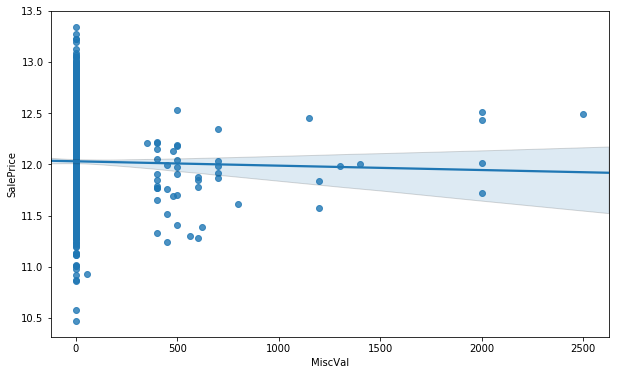

In [136]:
plt.figure(figsize=(10,6))
sns.regplot(x=aux['MiscVal'], y=aux['SalePrice'])

In [137]:
#Delete auxiliary DataFrame
del aux

This feature in numerical form does not seem to be particularly useful. How about in binary form?

In [138]:
aux_DF['aux'] = (aux_DF['MiscVal'] > 0).astype('uint')

In [139]:
aux_DF[['aux','SalePrice']].groupby('aux').describe()

SalePrice                                                        \
        count       mean       std        min        25%        50%   
aux                                                                   
0      1390.0  12.034122  0.385651  10.471978  11.775778  12.013677   
1        52.0  11.871481  0.373877  10.915107  11.698374  11.904974   

                           
           75%        max  
aux                        
0    12.278398  13.345509  
1    12.133464  12.531776

We'll use it in binary form!

In [140]:
aux_DF['MiscVal'] = aux_DF['aux']
aux_DF['MiscVal'].astype('uint8')
aux_DF.drop('aux',axis=1,inplace=True)

__MoSold YrSold__

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(11.8, 12.25)

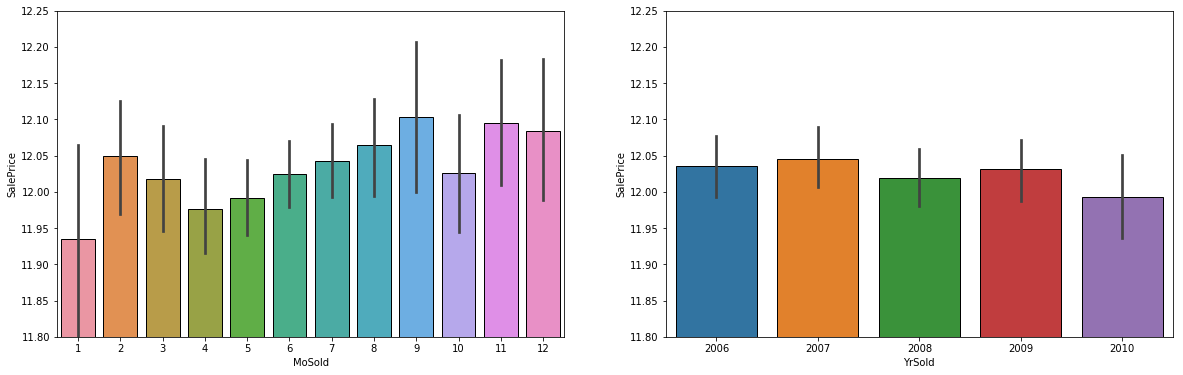

In [141]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.barplot(x=aux_DF['MoSold'],y=aux_DF['SalePrice'],ax=ax1)
sns.barplot(x=aux_DF['YrSold'],y=aux_DF['SalePrice'],ax=ax2)
ax1.set_ylim(11.8,12.25)
ax2.set_ylim(11.8,12.25)

MoSold sugests that the Month in which the house was sold influences the SalePrice feature. The number of houses sold in each month also varies greatly which can explain some of the variability as the number of houses may not be enough to eliminate randomness from the results.

In [142]:
aux_DF.groupby('MoSold')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
MoSold                                                                
1        56.0  11.934900  0.512076  10.579005  11.658614  11.898102   
2        51.0  12.049977  0.292962  11.440366  11.766399  12.063939   
3       105.0  12.017818  0.393915  10.868587  11.798112  12.004574   
4       140.0  11.976716  0.384782  11.133143  11.740045  11.901584   
5       203.0  11.991956  0.366322  11.134604  11.761743  11.944714   
6       251.0  12.024594  0.356072  10.933000  11.822252  12.007628   
7       232.0  12.042659  0.397294  10.859018  11.797170  12.014887   
8       120.0  12.065085  0.380822  11.283525  11.763669  12.072547   
9        62.0  12.103172  0.421578  11.112463  11.814882  12.146502   
10       87.0  12.026614  0.395135  10.471978  11.821874  11.976666   
11       78.0  12.095552  0.401719  11.112463  11.778166  12.063934   
12       57.0  12.084555  0.380975  11.320566  11.842236  12.095147   

              75%        max  
MoSold                        
1       12.276062  13.275829  
2       12.266400  12.676079  
3       12.208575  13.053015  
4       12.222926  13.226725  
5       12.230160  12.971543  
6       12.232938  13.195616  
7       12.268700  13.345509  
8       12.387207  12.962197  
9       12.356105  13.049795  
10      12.224635  12.991756  
11      12.383175  13.008662  
12      12.388398  12.736704

Let's transform MoSold into a categorical feature.

In [143]:
aux_DF['MoSold'] = aux_DF['MoSold'].astype('category')

YrSold also seems to be related with SalePrice, as would be expected. In this case, we can see that 2007 was a peak (pre-housing market crisis in the USA), with house prices reducing annualy from then on.

In [144]:
aux_DF.groupby('YrSold')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
YrSold                                                                
2006    313.0  12.035700  0.394185  10.471978  11.782960  12.007628   
2007    323.0  12.045522  0.378601  10.579005  11.772986  12.025755   
2008    302.0  12.019009  0.373030  10.859018  11.791478  12.013707   
2009    330.0  12.031099  0.394211  11.002117  11.768924  12.013404   
2010    174.0  11.993476  0.395328  10.915107  11.760184  11.951187   

              75%        max  
YrSold                        
2006    12.297790  13.345509  
2007    12.295683  13.053015  
2008    12.240479  13.008662  
2009    12.269932  13.275829  
2010    12.267876  13.195616

In [145]:
#aux_DF['YrSold'] = (aux_DF['YrSold'] < 2008).astype('uint8')

In [146]:
aux_DF['YrSold'] = aux_DF['YrSold'].astype('category')
#aux_DF['YrSold'] = (aux_DF['YrSold'] < 2008).astype('uint8')

### Categorical Features

In [147]:
aux_DF.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

__MSZoning__

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

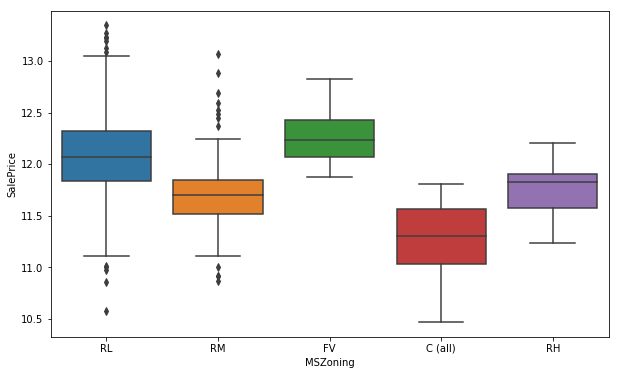

In [148]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['MSZoning'],y=aux_DF['SalePrice'])

In [149]:
aux_DF['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'RH'], dtype=object)

Turns out the properties are only in 5 different categories, RL (Residencial Low Density), RM (Residencial Medium Density), C (Commercial), FV (Floating Village Residencial) and RH (Residential High Density).

In [150]:
aux_DF.groupby('MSZoning')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
MSZoning                                                                 
C (all)      7.0  11.253629  0.452728  10.471978  11.033071  11.302217   
FV          65.0  12.246621  0.231114  11.878631  12.066816  12.235394   
RH          16.0  11.749848  0.289182  11.238502  11.572521  11.823758   
RL        1138.0  12.086589  0.367608  10.579005  11.835016  12.066816   
RM         216.0  11.700948  0.304476  10.868587  11.520398  11.705599   

                75%        max  
MSZoning                        
C (all)   11.565106  11.804856  
FV        12.429220  12.823631  
RH        11.908220  12.206078  
RL        12.322971  13.345509  
RM        11.849405  13.071072

Let's keep all the features for OHE.

__Street__

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

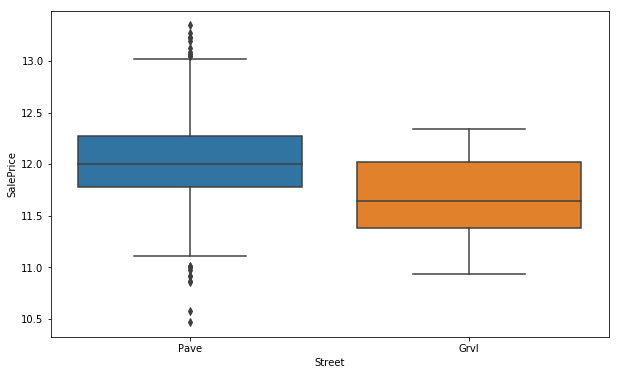

In [151]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['Street'],y=aux_DF['SalePrice'])

In [152]:
aux_DF['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [153]:
aux_DF['Street'] = (aux_DF['Street']=='Pave').astype('uint8')

There are only 2 options, Paved and Gravel. It is also clear that this feature is relevant, therefore it will be combined into a binary feature.

__Alley__

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

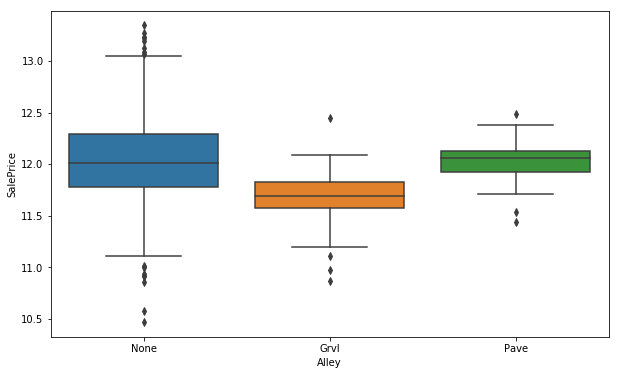

In [154]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['Alley'],y=aux_DF['SalePrice'])

This feature will be used in OHE form.

__LotShape__

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

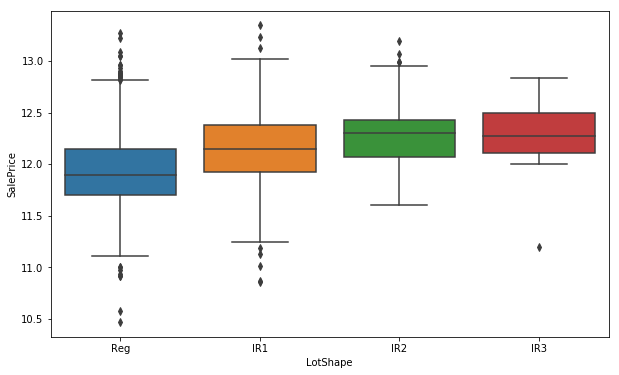

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['LotShape'],y=aux_DF['SalePrice'])

In [156]:
aux_DF.groupby('LotShape')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LotShape                                                                
IR1       476.0  12.160795  0.359727  10.859018  11.923716  12.152146   
IR2        41.0  12.318455  0.361830  11.608245  12.072547  12.305923   
IR3         9.0  12.230139  0.462896  11.198228  12.106258  12.278398   
Reg       916.0  11.944411  0.374016  10.471978  11.702519  11.896491   

                75%        max  
LotShape                        
IR1       12.384223  13.345509  
IR2       12.429220  13.195616  
IR3       12.495008  12.834684  
Reg       12.149508  13.275829

There seems to be a preference for irregularity, as evidenced by rising mean and reducing Std (as IR3 only has 8 entries, it will be combined with IR2). 

This feature could therefore be converted to ordinal!

In [157]:
aux_DF.loc[aux_DF['LotShape'] == 'IR3','LotShape'] = 'IR2'

In [158]:
aux_DF.groupby('LotShape')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LotShape                                                                
IR1       476.0  12.160795  0.359727  10.859018  11.923716  12.152146   
IR2        50.0  12.302558  0.378196  11.198228  12.075388  12.292160   
Reg       916.0  11.944411  0.374016  10.471978  11.702519  11.896491   

                75%        max  
LotShape                        
IR1       12.384223  13.345509  
IR2       12.474654  13.195616  
Reg       12.149508  13.275829

In [159]:
aux_DF['LotShape'].head()

0    Reg
1    Reg
2    IR1
3    IR1
4    IR1
Name: LotShape, dtype: object

In [160]:
#Converting to Ordinal form
mapper = {'Reg':0, 'IR1':1, 'IR2':2}
aux_DF['LotShape'] = aux_DF['LotShape'].replace(mapper)
aux_DF['LotShape'] = aux_DF['LotShape'].astype('uint8')

__LandContour LandSlope__

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

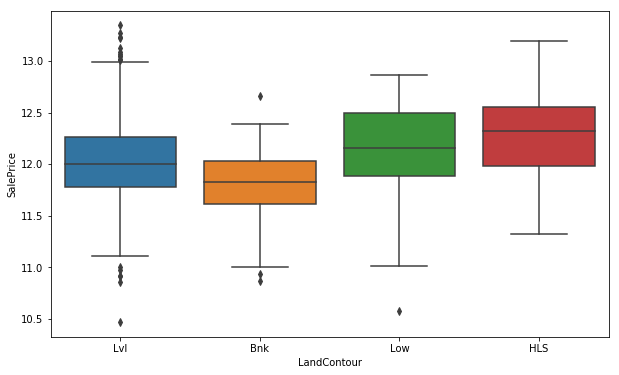

In [161]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['LandContour'],y=aux_DF['SalePrice'])

In [162]:
aux_DF.groupby('LandContour')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LandContour                                                                 
Bnk            61.0  11.802744  0.362695  10.868587  11.617294  11.824087   
HLS            49.0  12.268368  0.439706  11.320566  11.982935  12.321635   
Low            35.0  12.127220  0.508605  10.579005  11.884401  12.154785   
Lvl          1297.0  12.027121  0.375561  10.471978  11.775297  12.001512   

                   75%        max  
LandContour                        
Bnk          12.031725  12.660331  
HLS          12.554840  13.195616  
Low          12.496485  12.861001  
Lvl          12.264346  13.345509

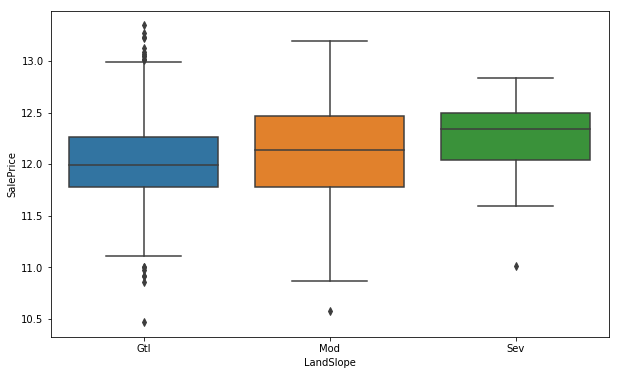

In [163]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['LandSlope'],y=aux_DF['SalePrice'])

In [164]:
aux_DF.groupby('LandSlope')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LandSlope                                                                 
Gtl        1366.0  12.024697  0.379007  10.471978  11.775297  11.996899   
Mod          65.0  12.076873  0.498197  10.579005  11.775297  12.137264   
Sev          11.0  12.183066  0.513721  11.018646  12.041827  12.341263   

                 75%        max  
LandSlope                        
Gtl        12.267523  13.345509  
Mod        12.466516  13.195616  
Sev        12.500109  12.834684

In [165]:
aux_DF.groupby(['LandContour','LandSlope'])['SalePrice'].describe()

count       mean       std        min        25%  \
LandContour LandSlope                                                      
Bnk         Gtl          45.0  11.823300  0.311928  11.002117  11.685693   
            Mod          15.0  11.729063  0.498481  10.868587  11.451004   
            Sev           1.0  11.982935       NaN  11.982935  11.982935   
HLS         Gtl          32.0  12.296174  0.423347  11.320566  12.029389   
            Mod          16.0  12.208201  0.492377  11.540317  11.776354   
            Sev           1.0  12.341263       NaN  12.341263  12.341263   
Low         Gtl           9.0  11.964955  0.495010  11.302217  11.719948   
            Mod          18.0  12.148496  0.500993  10.579005  11.944466   
            Sev           8.0  12.261899  0.557762  11.018646  12.121267   
Lvl         Gtl        1280.0  12.025410  0.375213  10.471978  11.775297   
            Mod          16.0  12.191039  0.375163  11.512935  11.993608   
            Sev           1.0  11.594330       NaN  11.594330  11.594330   

                             50%        75%        max  
LandContour LandSlope                                   
Bnk         Gtl        11.845110  11.979805  12.388398  
            Mod        11.681832  12.064831  12.660331  
            Sev        11.982935  11.982935  11.982935  
HLS         Gtl        12.352929  12.606625  12.991756  
            Mod        12.253733  12.428655  13.195616  
            Sev        12.341263  12.341263  12.341263  
Low         Gtl        11.870607  12.278398  12.861001  
            Mod        12.271591  12.510508  12.665398  
            Sev        12.431535  12.553379  12.834684  
Lvl         Gtl        12.001205  12.264346  13.345509  
            Mod        12.138066  12.474573  12.850557  
            Sev        11.594330  11.594330  11.594330

The vast majority of lots has Gentle LandSlope, with only a few having Moderate or Severe slopes.

LandSlope is also not entirely ordinal, as some terrains have higher value with more severe slopes and others with more gentle slopes. Let's drop this feature.

Low and Lvl houses seem to be relatively similar and will therefore be grouped into the same category, Lvl.

In [167]:
aux_DF.loc[aux_DF['LandContour'] == 'Low','LandContour'] = 'Lvl'

In [168]:
aux_DF.groupby('LandContour')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LandContour                                                                 
Bnk            61.0  11.802744  0.362695  10.868587  11.617294  11.824087   
HLS            49.0  12.268368  0.439706  11.320566  11.982935  12.321635   
Lvl          1332.0  12.029751  0.379739  10.471978  11.778657  12.009150   

                   75%        max  
LandContour                        
Bnk          12.031725  12.660331  
HLS          12.554840  13.195616  
Lvl          12.271397  13.345509

These 3 features will be OHE!

__LotConfig__

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac (dead-end street)
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

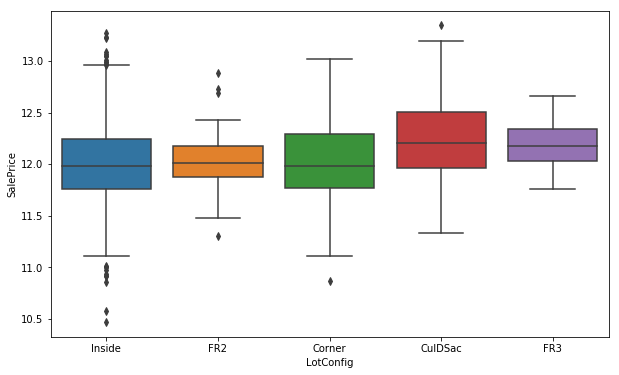

In [169]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['LotConfig'],y=aux_DF['SalePrice'])

In [170]:
aux_DF.groupby('LotConfig')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
LotConfig                                                                 
Corner      259.0  12.018652  0.371582  10.868587  11.769510  11.982935   
CulDSac      94.0  12.249815  0.359824  11.338584  11.960644  12.202357   
FR2          47.0  12.034748  0.329052  11.302217  11.873605  12.013707   
FR3           4.0  12.195689  0.371174  11.759793  12.031563  12.181316   
Inside     1038.0  12.009650  0.388934  10.471978  11.763692  11.982935   

                 75%        max  
LotConfig                        
Corner     12.296821  13.021329  
CulDSac    12.503739  13.345509  
FR2        12.178189  12.885673  
FR3        12.345442  12.660331  
Inside     12.242891  13.275829

From the Boxplot and LotConfig stats, we can see that Inside and Corner lots seem to have similar characteristics. Let's group them into the, all into a new category "Inside_or_Corner". 

Regarding FR3, there are only 4 instances of this feature so to reduce the number of features, these features will be grouped with CulDSac with whom it seems most similar.

In [171]:
aux_DF.loc[aux_DF['LotConfig'] == 'FR3','LotConfig'] = 'CulDSac'
aux_DF.loc[(aux_DF['LotConfig'] == 'Corner') | (aux_DF['LotConfig'] == 'Inside'),'LotConfig'] = 'Inside_or_Corner'

__Neighborhood__

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

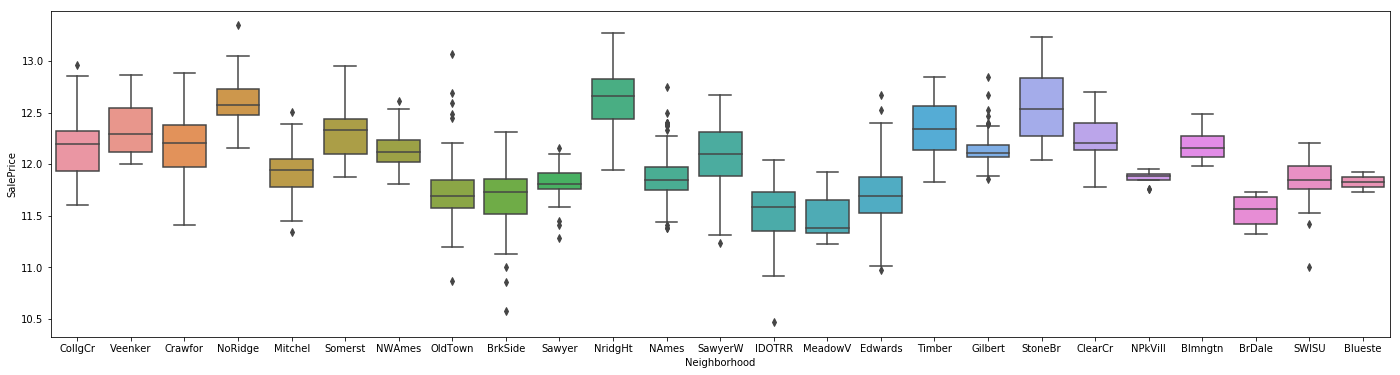

In [172]:
plt.figure(figsize=(24,6))
sns.boxplot(x=aux_DF['Neighborhood'],y=aux_DF['SalePrice'])

In [173]:
aux_DF['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

Neighborhood is a feature that appears to be highly influencial for the SalePrice, as would be expected. However, there are 25 different Neighborhoods, which would result in 25 different features if we were to OHE it directly!

Perhaps some may be grouped together while maintaining most variance?

In [174]:
group_neig = aux_DF.groupby('Neighborhood')['SalePrice'].describe().sort_values(['count'], ascending=False)

In [175]:
group_neig

count       mean       std        min        25%        50%  \
Neighborhood                                                                
NAmes         223.0  11.868545  0.207362  11.379406  11.753915  11.849405   
CollgCr       150.0  12.163647  0.254457  11.608245  11.937872  12.191972   
OldTown       110.0  11.725596  0.297601  10.868587  11.575318  11.694839   
Edwards        97.0  11.712580  0.302405  10.976799  11.532738  11.695255   
Somerst        85.0  12.301186  0.237802  11.878631  12.097379  12.328295   
Gilbert        79.0  12.155809  0.159985  11.856522  12.066816  12.106258   
NridgHt        76.0  12.610145  0.293681  11.944714  12.439035  12.660034   
Sawyer         73.0  11.822029  0.155982  11.289794  11.759793  11.813037   
NWAmes         72.0  12.141865  0.175935  11.813037  12.027001  12.122408   
SawyerW        59.0  12.090695  0.312043  11.238502  11.887885  12.100162   
BrkSide        58.0  11.679736  0.346318  10.579005  11.517886  11.730225   
Crawfor        51.0  12.206664  0.324650  11.411457  11.978226  12.209193   
Mitchel        49.0  11.933954  0.226690  11.344519  11.782960  11.941462   
NoRidge        39.0  12.632321  0.218609  12.154785  12.481796  12.577640   
Timber         38.0  12.363460  0.264828  11.831386  12.138333  12.339184   
IDOTRR         34.0  11.503764  0.342516  10.471978  11.351808  11.582903   
ClearCr        27.0  12.253583  0.231523  11.775297  12.134828  12.208575   
StoneBr        25.0  12.585490  0.351960  12.043560  12.271397  12.535380   
SWISU          25.0  11.838442  0.259865  11.002117  11.759793  11.845827   
Blmngtn        17.0  12.169421  0.148151  11.982279  12.066816  12.160034   
MeadowV        17.0  11.474533  0.220338  11.225257  11.332614  11.385103   
BrDale         16.0  11.547874  0.139500  11.326608  11.418580  11.571204   
Veenker        11.0  12.344180  0.288925  11.998439  12.123943  12.292255   
NPkVill         9.0  11.866484  0.067361  11.755879  11.849405  11.891369   
Blueste         2.0  11.826543  0.139298  11.728045  11.777294  11.826543   

                    75%        max  
Neighborhood                        
NAmes         11.973511  12.751303  
CollgCr       12.327075  12.959541  
OldTown       11.849405  13.071072  
Edwards       11.881042  12.676079  
Somerst       12.441149  12.955130  
Gilbert       12.191885  12.841328  
NridgHt       12.828802  13.275829  
Sawyer        11.915058  12.154785  
NWAmes        12.230770  12.610874  
SawyerW       12.312624  12.676079  
BrkSide       11.857755  12.317171  
Crawfor       12.384223  12.880294  
Mitchel       12.049425  12.509878  
NoRidge       12.732273  13.345509  
Timber        12.564141  12.843974  
IDOTRR        11.729905  12.040614  
ClearCr       12.400597  12.700772  
StoneBr       12.841132  13.229570  
SWISU         11.982935  12.206078  
Blmngtn       12.271350  12.485831  
MeadowV       11.652696  11.927687  
BrDale        11.678448  11.736077  
Veenker       12.548760  12.861001  
NPkVill       11.908347  11.951187  
Blueste       11.875793  11.925042

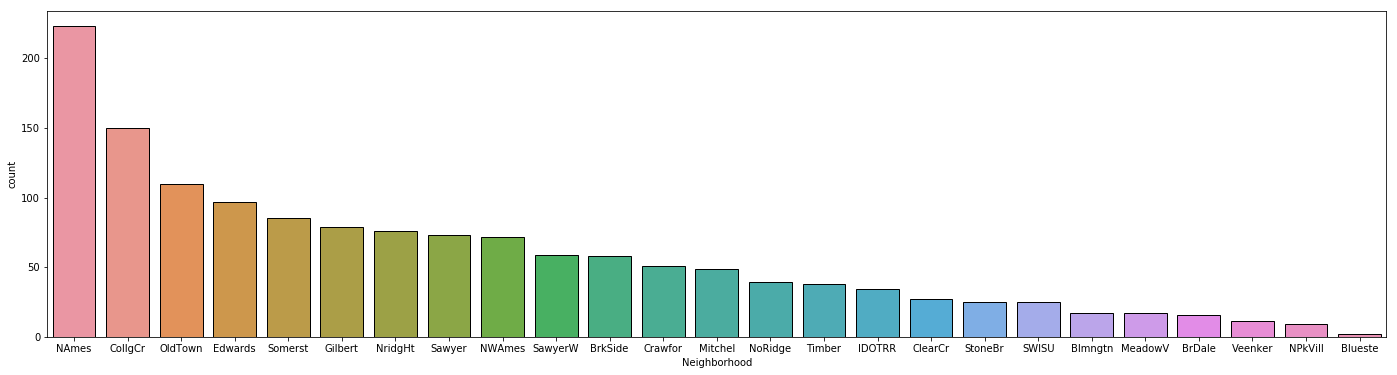

In [176]:
#Plot using Count, descending order
plt.figure(figsize=(24,6))
sns.barplot(x=group_neig.index,y=group_neig['count'])
#plt.ylim(11.2,12.7)

In [177]:
group_neig = aux_DF.groupby('Neighborhood')['SalePrice'].describe().sort_values(['50%'], ascending=False)

(11.2, 12.7)

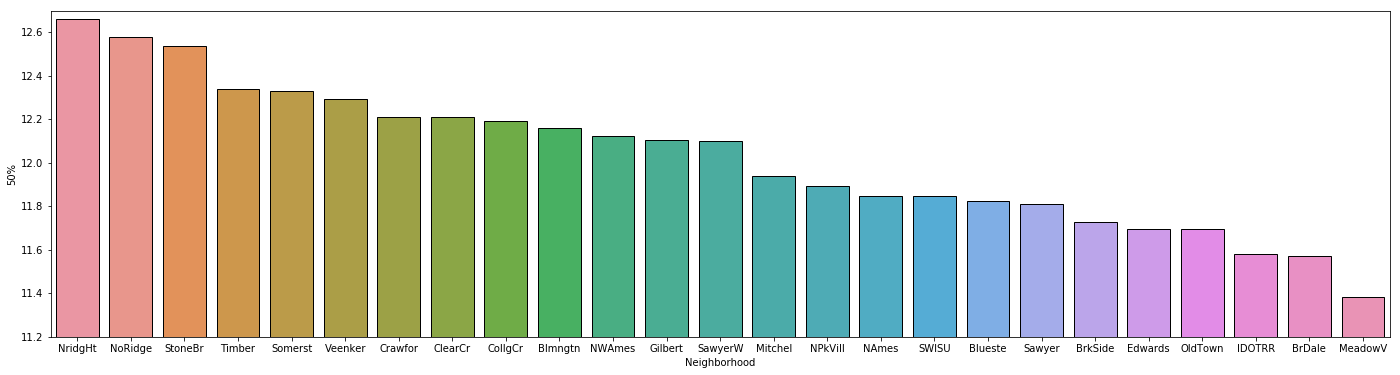

In [178]:
#Plot using Median, descending order
plt.figure(figsize=(24,6))
sns.barplot(x=group_neig.index,y=group_neig['50%'])
plt.ylim(11.2,12.7)

Let's group some of the neighborhoods with similar median with each other, to reduce future number of OHE features!

In [179]:
#Grouping Timber with Somerst, CollgCr with ClearCr, Gilbert with SawyerW with NWAmes,NAmes with SWISU,Edwards with OldTown, Blueste with Sawyer
aux_dict = {'Timber':'Timber_Somerst','Somerst':'Timber_Somerst','CollgCr':'CollgCr_ClearCr','ClearCr':'CollgCr_ClearCr','NWAmes':'NWAmes_Gilbert_SawyerW',\
            'Gilbert':'NWAmes_Gilbert_SawyerW','SawyerW':'NWAmes_Gilbert_SawyerW','NAmes':'NAmes_SWISU','SWISU':'NAmes_SWISU','Edwards':'Edwards_OldTown',\
            'OldTown':'Edwards_OldTown','Blueste':'Blueste_Sawyer','Sawyer':'Blueste_Sawyer'}

In [180]:
aux_DF['Neighborhood'].replace(to_replace=aux_dict,inplace=True)

In [181]:
group_neig = aux_DF.groupby('Neighborhood')['SalePrice'].describe().sort_values(['50%'], ascending=False)

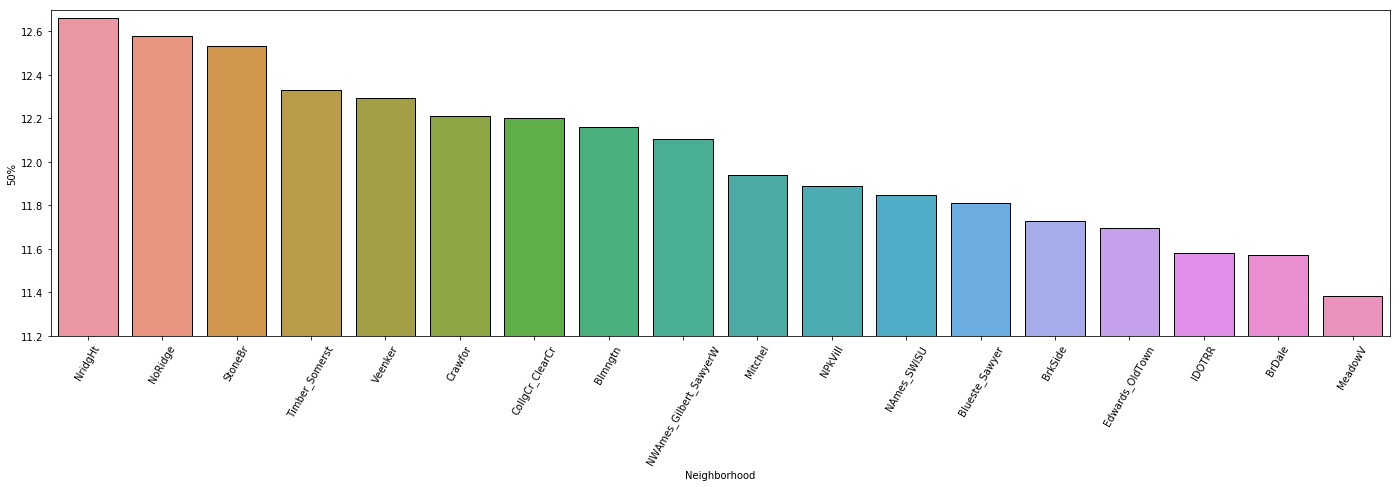

In [182]:
#Plot using Median, descending order
ax = plt.figure(figsize=(24,6))
ax = sns.barplot(x=group_neig.index,y=group_neig['50%'])
plt.ylim(11.2,12.7)
a =plt.setp(ax.get_xticklabels(), rotation=60)

These remaining features will be OHE.

__Condition1 Condition2__

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [183]:
aux_DF['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [184]:
aux_DF['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosA', 'PosN', 'RRAn', 'RRAe'],
      dtype=object)

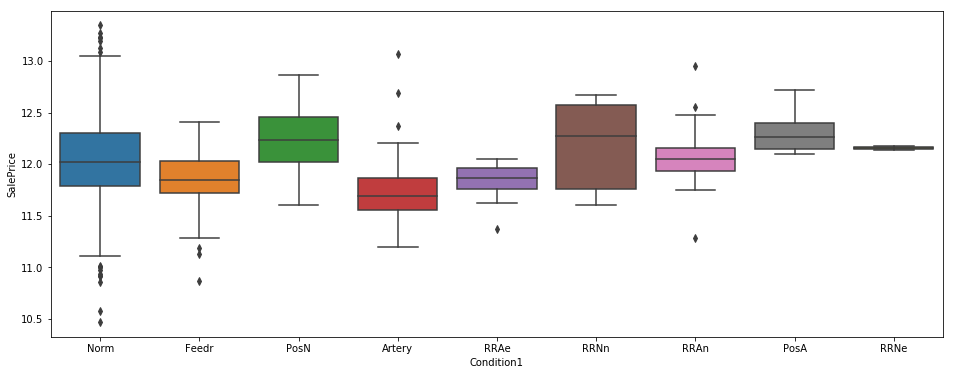

In [185]:
plt.figure(figsize=(16,6))
sns.boxplot(x=aux_DF['Condition1'],y=aux_DF['SalePrice'])

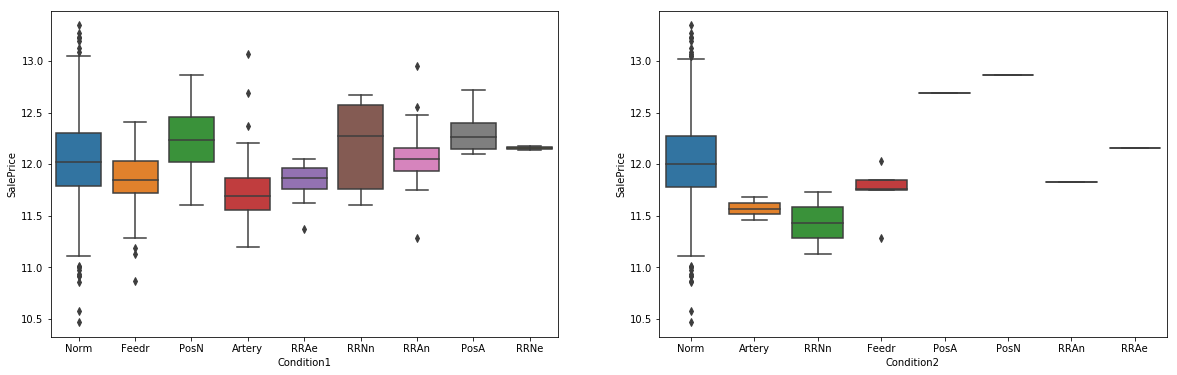

In [186]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['Condition1'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['Condition2'],y=aux_DF['SalePrice'],ax=ax2)

In [187]:
aux_DF[aux_DF['Condition1'] == 'Norm']['Condition2'].unique()

array(['Norm'], dtype=object)

Norm seems to be the default value i.e., a house that is does not have one distinguishing condition (or a second) is considered Norm, Norm.

In [188]:
aux_DF.groupby(['Condition1','Condition2'])['SalePrice'].describe()

count       mean       std        min        25%  \
Condition1 Condition2                                                      
Artery     Artery         2.0  11.570046  0.153305  11.461643  11.515844   
           Norm          44.0  11.742449  0.317500  11.198228  11.561725   
           PosA           1.0  12.691584       NaN  12.691584  12.691584   
Feedr      Artery         0.0        NaN       NaN        NaN        NaN   
           Feedr          0.0        NaN       NaN        NaN        NaN   
           Norm          74.0  11.844637  0.293326  10.868587  11.717858   
           RRAe           1.0  12.154785       NaN  12.154785  12.154785   
           RRAn           1.0  11.827050       NaN  11.827050  11.827050   
           RRNn           2.0  11.435340  0.425306  11.134604  11.284972   
Norm       Norm        1247.0  12.045603  0.388790  10.471978  11.790565   
PosA       Norm           8.0  12.306694  0.213691  12.100718  12.148118   
           PosA           0.0        NaN       NaN        NaN        NaN   
PosN       Norm          17.0  12.207890  0.266736  11.603689  12.013707   
           PosN           1.0  12.861001       NaN  12.861001  12.861001   
RRAe       Norm          11.0  11.822309  0.191883  11.373675  11.757607   
RRAn       Artery         0.0        NaN       NaN        NaN        NaN   
           Feedr          4.0  11.728406  0.317971  11.283525  11.634844   
           Norm          22.0  12.136561  0.280245  11.767575  11.949538   
RRNe       Norm           2.0  12.158531  0.027806  12.138869  12.148700   
RRNn       Artery         0.0        NaN       NaN        NaN        NaN   
           Feedr          1.0  11.759793       NaN  11.759793  11.759793   
           Norm           4.0  12.283925  0.481906  11.608245  12.107363   

                             50%        75%        max  
Condition1 Condition2                                   
Artery     Artery      11.570046  11.624247  11.678448  
           Norm        11.694839  11.870607  13.071072  
           PosA        12.691584  12.691584  12.691584  
Feedr      Artery            NaN        NaN        NaN  
           Feedr             NaN        NaN        NaN  
           Norm        11.856497  12.033209  12.407384  
           RRAe        12.154785  12.154785  12.154785  
           RRAn        11.827050  11.827050  11.827050  
           RRNn        11.435340  11.585709  11.736077  
Norm       Norm        12.025755  12.299112  13.345509  
PosA       Norm        12.261065  12.404828  12.721889  
           PosA              NaN        NaN        NaN  
PosN       Norm        12.206078  12.396697  12.653962  
           PosN        12.861001  12.861001  12.861001  
RRAe       Norm        11.867104  11.960772  12.049425  
RRAn       Artery            NaN        NaN        NaN  
           Feedr       11.800678  11.894240  12.028745  
           Norm        12.094867  12.244165  12.955130  
RRNe       Norm        12.158531  12.168362  12.178193  
RRNn       Artery            NaN        NaN        NaN  
           Feedr       11.759793  11.759793  11.759793  
           Norm        12.425688  12.602250  12.676079

Condition2 seems to be applicable only to very specific cases, therefore it will be ignored and only Condition1 will be used.

In [189]:
aux_DF.groupby(['Condition1'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Condition1                                                                 
Artery        47.0  11.755307  0.339780  11.198228  11.561725  11.694422   
Feedr         78.0  11.837893  0.299129  10.868587  11.717858  11.849405   
Norm        1247.0  12.045603  0.388790  10.471978  11.790565  12.025755   
PosA           8.0  12.306694  0.213691  12.100718  12.148118  12.261065   
PosN          18.0  12.244174  0.301099  11.603689  12.020434  12.235212   
RRAe          11.0  11.822309  0.191883  11.373675  11.757607  11.867104   
RRAn          26.0  12.073768  0.317266  11.283525  11.934219  12.052277   
RRNe           2.0  12.158531  0.027806  12.138869  12.148700  12.158531   
RRNn           5.0  12.179099  0.478663  11.608245  11.759793  12.273736   

                  75%        max  
Condition1                        
Artery      11.870607  13.071072  
Feedr       12.033209  12.407384  
Norm        12.299112  13.345509  
PosA        12.404828  12.721889  
PosN        12.457682  12.861001  
RRAe        11.960772  12.049425  
RRAn        12.155163  12.955130  
RRNe        12.168362  12.178193  
RRNn        12.577640  12.676079

For further compressing this feature and according to the data description, both PosA and PosN refer to proximity to positive elements (greenbelt) and have similar median/mean. These will be grouped into a new "Pos" category.

RRNe and RRNn will also be grouped into RRN_n_or_e as both pertain to proximity to a specific railway and have similar mean median.

In [190]:
aux_dict = {'PosA':'Pos','PosN':'Pos','RRNe':'RRN_n_or_e','RRNn':'RRN_n_or_e'}

In [191]:
aux_DF['Condition1'].replace(to_replace=aux_dict,inplace=True)

__'BldgType' 'HouseStyle'__

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

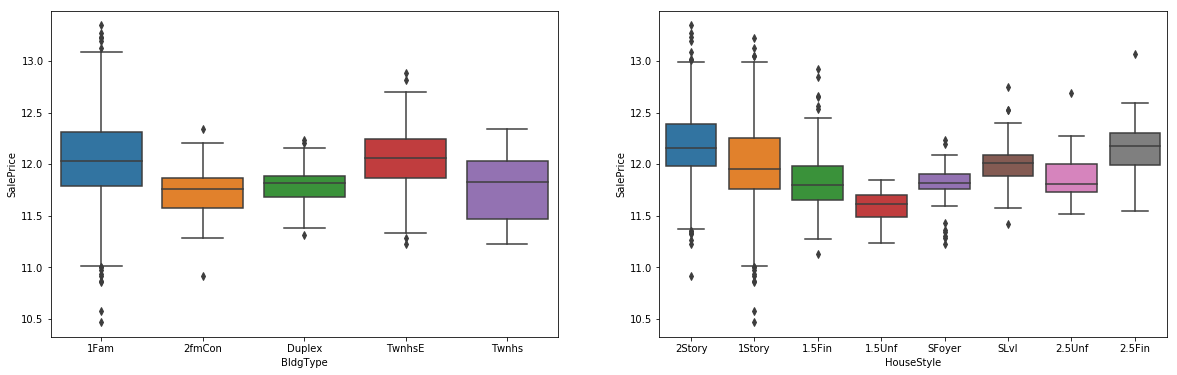

In [192]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['BldgType'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['HouseStyle'],y=aux_DF['SalePrice'],ax=ax2)

In [193]:
aux_DF.groupby(['BldgType'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
BldgType                                                                 
1Fam      1202.0  12.052908  0.392290  10.471978  11.790565  12.034697   
2fmCon      31.0  11.725362  0.285019  10.915107  11.579407  11.755879   
Duplex      52.0  11.780928  0.209101  11.314487  11.681620  11.820270   
Twnhs       43.0  11.773914  0.309583  11.225257  11.469421  11.831386   
TwnhsE     114.0  12.059457  0.324131  11.231901  11.871915  12.056416   

                75%        max  
BldgType                        
1Fam      12.312124  13.345509  
2fmCon    11.866950  12.341263  
Duplex    11.884496  12.237092  
Twnhs     12.035933  12.345839  
TwnhsE    12.242288  12.880294

Let's group 2fmCon and Duplex together and then use BldgType in OHE form.

In [194]:
aux_dict = {'2fmCon':'2fmCon_Duplex','Duplex':'2fmCon_Duplex'}

In [195]:
aux_DF['BldgType'].replace(to_replace=aux_dict,inplace=True)

In [196]:
aux_DF.groupby(['HouseStyle'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
HouseStyle                                                                
1.5Fin      150.0  11.829822  0.312058  11.133143  11.652696  11.796229   
1.5Unf       14.0  11.595037  0.179637  11.238502  11.494090  11.619420   
1Story      718.0  11.999203  0.398302  10.471978  11.755879  11.951187   
2.5Fin        8.0  12.194456  0.480148  11.552156  11.994121  12.175499   
2.5Unf       11.0  11.908758  0.334748  11.522886  11.735789  11.804856   
2Story      439.0  12.181601  0.360060  10.915107  11.979805  12.154785   
SFoyer       37.0  11.786487  0.242973  11.231901  11.755879  11.820123   
SLvl         65.0  12.002160  0.204157  11.418626  11.884496  12.010672   

                  75%        max  
HouseStyle                        
1.5Fin      11.982049  12.923915  
1.5Unf      11.699387  11.845110  
1Story      12.254272  13.226725  
2.5Fin      12.303242  13.071072  
2.5Unf      12.004570  12.691584  
2Story      12.388190  13.345509  
SFoyer      11.904974  12.237092  
SLvl        12.089544  12.751303

This feature will be OHE as is.

__RoofStyle RoofMatl__

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

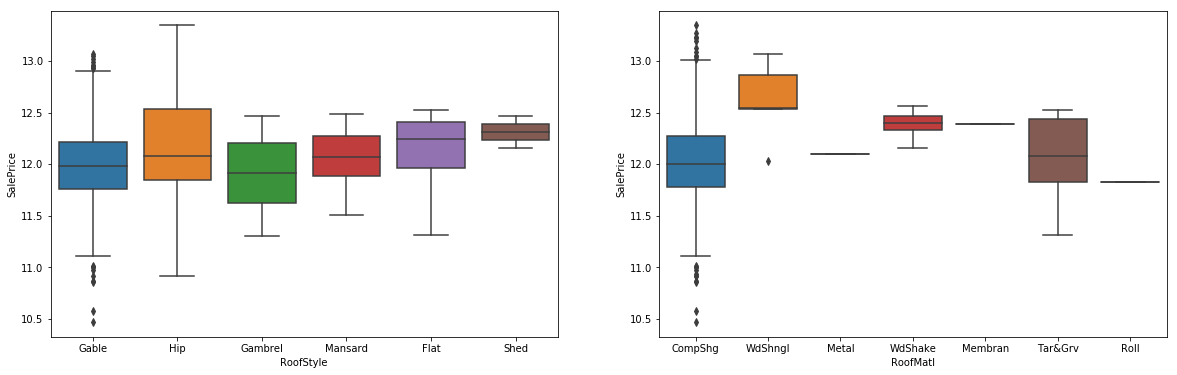

In [197]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['RoofStyle'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['RoofMatl'],y=aux_DF['SalePrice'],ax=ax2)

In [198]:
aux_DF.groupby(['RoofStyle'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
RoofStyle                                                                 
Flat         12.0  12.143942  0.374056  11.314487  11.961210  12.247731   
Gable      1131.0  11.989120  0.359053  10.471978  11.759793  11.982935   
Gambrel      10.0  11.917589  0.381295  11.302217  11.622263  11.915701   
Hip         280.0  12.182581  0.451754  10.915107  11.848154  12.081082   
Mansard       7.0  12.057431  0.334552  11.512935  11.886939  12.072547   
Shed          2.0  12.311613  0.221788  12.154785  12.233199  12.311613   

                 75%        max  
RoofStyle                        
Flat       12.410757  12.524421  
Gable      12.219894  13.071072  
Gambrel    12.206232  12.466516  
Hip        12.534030  13.345509  
Mansard    12.275741  12.491176  
Shed       12.390027  12.468441

Some RoofStyle are only present in a small subset of houses, like Shed (2 houses) and Mansard (7 houses). 

To reduce the number of features, Flat will be condensed with Hip. Mansard will be joined with Gable and Shed with Gambrel.

In [199]:
aux_dict = {'Flat':'Hip_Flat','Hip':'Hip_Flat','Mansard':'Gable_Mansard','Gable':'Gable_Mansard','Gambrel':'Gambrel_Shed','Shed':'Gambrel_Shed'}

In [200]:
aux_DF['RoofStyle'].replace(to_replace=aux_dict,inplace=True)

Regarding RoofMatl:

In [201]:
aux_DF.groupby(['RoofMatl'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
RoofMatl                                                                 
CompShg   1419.0  12.024366  0.385158  10.471978  11.775297  12.000898   
Membran      1.0  12.394629       NaN  12.394629  12.394629  12.394629   
Metal        1.0  12.100718       NaN  12.100718  12.100718  12.100718   
Roll         1.0  11.827744       NaN  11.827744  11.827744  11.827744   
Tar&Grv     10.0  12.087832  0.395804  11.314487  11.829108  12.076936   
WdShake      5.0  12.384854  0.154599  12.154785  12.337105  12.396697   
WdShngl      5.0  12.608940  0.392643  12.034697  12.535380  12.542548   

                75%        max  
RoofMatl                        
CompShg   12.269639  13.345509  
Membran   12.394629  12.394629  
Metal     12.100718  12.100718  
Roll      11.827744  11.827744  
Tar&Grv   12.438877  12.524421  
WdShake   12.468441  12.567241  
WdShngl   12.861001  13.071072

Membrane, metal and roll roofs are only present 1 time each on the training data. These will therefore be grouped with Tar & Grvl into an "Other" category.

WdShake and WdShngl will be condensed into a "Wood" category

In [202]:
aux_dict = {'Membran':'Other','Metal':'Other','Roll':'Other','Tar&Grv':'Other','WdShake':'Wood','WdShngl':'Wood'}

In [203]:
aux_DF['RoofMatl'].replace(to_replace=aux_dict,inplace=True)

__'Exterior1st' 'Exterior2nd'__

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	

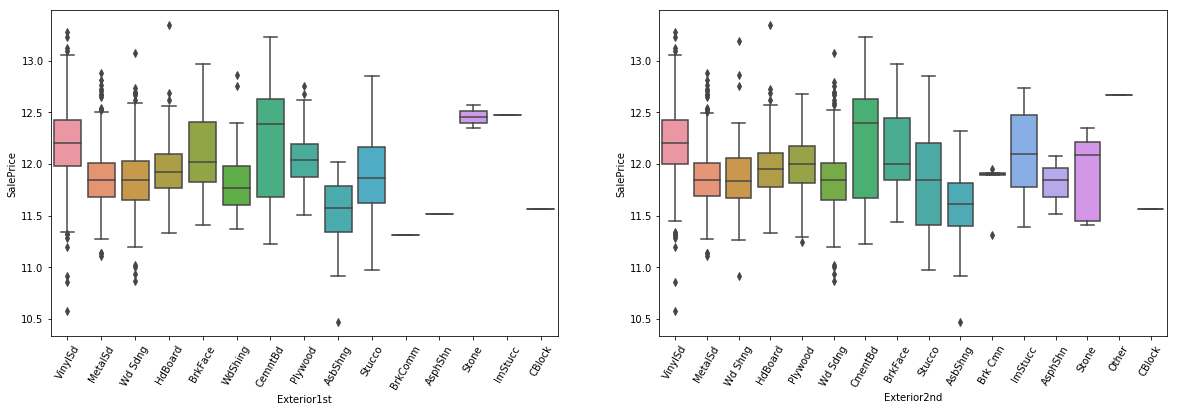

In [204]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['Exterior1st'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['Exterior2nd'],y=aux_DF['SalePrice'],ax=ax2)
a =plt.setp(ax1.get_xticklabels(), rotation=60)
a =plt.setp(ax2.get_xticklabels(), rotation=60)

In [205]:
aux_DF.groupby(['Exterior1st'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Exterior1st                                                                
AsbShng       19.0  11.509340  0.385406  10.471978  11.344081  11.571204   
AsphShn        1.0  11.512935       NaN  11.512935  11.512935  11.512935   
BrkComm        1.0  11.314487       NaN  11.314487  11.314487  11.314487   
BrkFace       49.0  12.118585  0.390433  11.407576  11.827744  12.019749   
CBlock         1.0  11.561725       NaN  11.561725  11.561725  11.561725   
CemntBd       60.0  12.206231  0.576179  11.225257  11.681484  12.383132   
HdBoard      221.0  11.944744  0.273997  11.326608  11.771444  11.917730   
ImStucc        1.0  12.476104       NaN  12.476104  12.476104  12.476104   
MetalSd      219.0  11.863513  0.317017  11.112463  11.680563  11.842236   
Plywood      105.0  12.056840  0.254582  11.507923  11.877576  12.034697   
Stone          2.0  12.456540  0.156555  12.345839  12.401189  12.456540   
Stucco        24.0  11.888210  0.480417  10.976799  11.619199  11.863490   
VinylSd      512.0  12.207544  0.359224  10.579005  11.983872  12.206078   
Wd Sdng      201.0  11.844291  0.349251  10.868587  11.648339  11.842236   
WdShing       26.0  11.844549  0.372468  11.373675  11.605596  11.765204   

                   75%        max  
Exterior1st                        
AsbShng      11.784778  12.016733  
AsphShn      11.512935  11.512935  
BrkComm      11.314487  11.314487  
BrkFace      12.411056  12.971543  
CBlock       11.561725  11.561725  
CemntBd      12.625052  13.229570  
HdBoard      12.100162  13.345509  
ImStucc      12.476104  12.476104  
MetalSd      12.012797  12.879020  
Plywood      12.193499  12.751303  
Stone        12.511890  12.567241  
Stucco       12.162584  12.850557  
VinylSd      12.423085  13.275829  
Wd Sdng      12.031725  13.071072  
WdShing      11.984044  12.861001

There are many types of Exterior1st with unitary (or close to) count. These will be grouped to reduce the number of features:

- AsphShn, AsbShng, BrkComm, CBlock into 'Shingles';
- ImStucc into 'Stucco';
- Stone into 'CemntBd';
- WdShing into 'Wd Sdng'.

In [206]:
aux_dict = {'AsphShn':'Shingles','AsbShng':'Shingles','BrkComm':'Shingles','CBlock':'Shingles','ImStucc':'Stucco','Stone':'CemntBd','WdShing':'Wd Sdng'}

In [207]:
aux_DF['Exterior1st'].replace(to_replace=aux_dict,inplace=True)

In [208]:
aux_DF.groupby(['Exterior1st'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Exterior1st                                                                
BrkFace       49.0  12.118585  0.390433  11.407576  11.827744  12.019749   
CemntBd       62.0  12.214305  0.568760  11.225257  11.706298  12.383132   
HdBoard      221.0  11.944744  0.273997  11.326608  11.771444  11.917730   
MetalSd      219.0  11.863513  0.317017  11.112463  11.680563  11.842236   
Plywood      105.0  12.056840  0.254582  11.507923  11.877576  12.034697   
Shingles      22.0  11.503028  0.359465  10.471978  11.329284  11.561249   
Stucco        25.0  11.911726  0.484777  10.976799  11.661354  11.877576   
VinylSd      512.0  12.207544  0.359224  10.579005  11.983872  12.206078   
Wd Sdng      227.0  11.844320  0.351127  10.868587  11.648339  11.824087   

                   75%        max  
Exterior1st                        
BrkFace      12.411056  12.971543  
CemntBd      12.615982  13.229570  
HdBoard      12.100162  13.345509  
MetalSd      12.012797  12.879020  
Plywood      12.193499  12.751303  
Shingles     11.766570  12.016733  
Stucco       12.206578  12.850557  
VinylSd      12.423085  13.275829  
Wd Sdng      12.022716  13.071072

In [209]:
aux_DF.groupby(['Exterior2nd'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Exterior2nd                                                                
AsbShng       19.0  11.557451  0.425476  10.471978  11.403610  11.608245   
AsphShn        3.0  11.809240  0.281261  11.512935  11.677586  11.842236   
Brk Cmn        6.0  11.811988  0.244617  11.314487  11.893075  11.903271   
BrkFace       24.0  12.127299  0.428422  11.439290  11.843990  11.999834   
CBlock         1.0  11.561725       NaN  11.561725  11.561725  11.561725   
CmentBd       59.0  12.203229  0.572108  11.225257  11.671888  12.392556   
HdBoard      206.0  11.967369  0.289375  11.326608  11.777213  11.949571   
ImStucc        9.0  12.097719  0.464224  11.385103  11.775297  12.096263   
MetalSd      213.0  11.866149  0.316475  11.112463  11.686887  11.842236   
Other          1.0  12.672950       NaN  12.672950  12.672950  12.672950   
Plywood      139.0  12.005543  0.266844  11.245059  11.813037  11.998439   
Stone          5.0  11.898449  0.440746  11.407576  11.445727  12.083911   
Stucco        25.0  11.847847  0.473460  10.976799  11.411457  11.849405   
VinylSd      501.0  12.211361  0.357188  10.579005  11.995358  12.206782   
Wd Sdng      193.0  11.853221  0.350452  10.868587  11.652696  11.841423   
Wd Shng       38.0  11.892250  0.420338  10.915107  11.669829  11.836630   

                   75%        max  
Exterior2nd                        
AsbShng      11.812928  12.323860  
AsphShn      11.957392  12.072547  
Brk Cmn      11.908347  11.951187  
BrkFace      12.448460  12.971543  
CBlock       11.561725  11.561725  
CmentBd      12.627041  13.229570  
HdBoard      12.106258  13.345509  
ImStucc      12.476104  12.739641  
MetalSd      12.011887  12.879020  
Other        12.672950  12.672950  
Plywood      12.173035  12.676079  
Stone        12.209193  12.345839  
Stucco       12.206578  12.850557  
VinylSd      12.424811  13.275829  
Wd Sdng      12.013707  13.071072  
Wd Shng      12.057069  13.195616

In [210]:
aux_dict = {'AsphShn':'Shingles','AsbShng':'Shingles','BrkComm':'Shingles','Brk Cmn':'BrkFace','CBlock':'Shingles','ImStucc':'Stucco','Stone':'CmentBd','WdShing':'Wd Sdng','Other':'VinylSd'}

In [211]:
aux_DF['Exterior2nd'].replace(to_replace=aux_dict,inplace=True)

In [212]:
aux_DF.groupby(['Exterior2nd'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Exterior2nd                                                                
BrkFace       30.0  12.064237  0.415143  11.314487  11.851184  11.956002   
CmentBd       64.0  12.179418  0.566092  11.225257  11.652696  12.344655   
HdBoard      206.0  11.967369  0.289375  11.326608  11.777213  11.949571   
MetalSd      213.0  11.866149  0.316475  11.112463  11.686887  11.842236   
Plywood      139.0  12.005543  0.266844  11.245059  11.813037  11.998439   
Shingles      23.0  11.590479  0.403500  10.471978  11.502834  11.608245   
Stucco        34.0  11.913989  0.477276  10.976799  11.534888  11.863490   
VinylSd      502.0  12.212280  0.357426  10.579005  11.998410  12.207678   
Wd Sdng      193.0  11.853221  0.350452  10.868587  11.652696  11.841423   
Wd Shng       38.0  11.892250  0.420338  10.915107  11.669829  11.836630   

                   75%        max  
Exterior2nd                        
BrkFace      12.409524  12.971543  
CmentBd      12.601817  13.229570  
HdBoard      12.106258  13.345509  
MetalSd      12.011887  12.879020  
Plywood      12.173035  12.676079  
Shingles     11.827744  12.323860  
Stucco       12.311024  12.850557  
VinylSd      12.427217  13.275829  
Wd Sdng      12.013707  13.071072  
Wd Shng      12.057069  13.195616

__'MasVnrType'__

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	

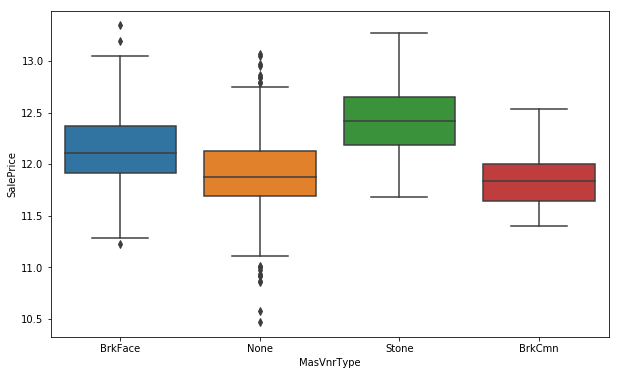

In [213]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['MasVnrType'],y=aux_DF['SalePrice'])

In [214]:
aux_DF.groupby(['MasVnrType'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
MasVnrType                                                                
BrkCmn       15.0  11.853246  0.286223  11.401681  11.645461  11.842236   
BrkFace     441.0  12.163835  0.346234  11.225257  11.915058  12.111218   
None        861.0  11.904427  0.348873  10.471978  11.691080  11.877576   
Stone       125.0  12.423877  0.349401  11.686887  12.185875  12.422510   

                  75%        max  
MasVnrType                        
BrkCmn      12.007306  12.531776  
BrkFace     12.371591  13.345509  
None        12.127576  13.071072  
Stone       12.650351  13.275829

Due to low number of entries and similar mean/median to 'None', let's change all BrkCmn to None.

In [215]:
aux_dict = {'BrkCmn':'None'}
aux_DF['MasVnrType'].replace(to_replace=aux_dict,inplace=True)

__'ExterQual' 'ExterCond__

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

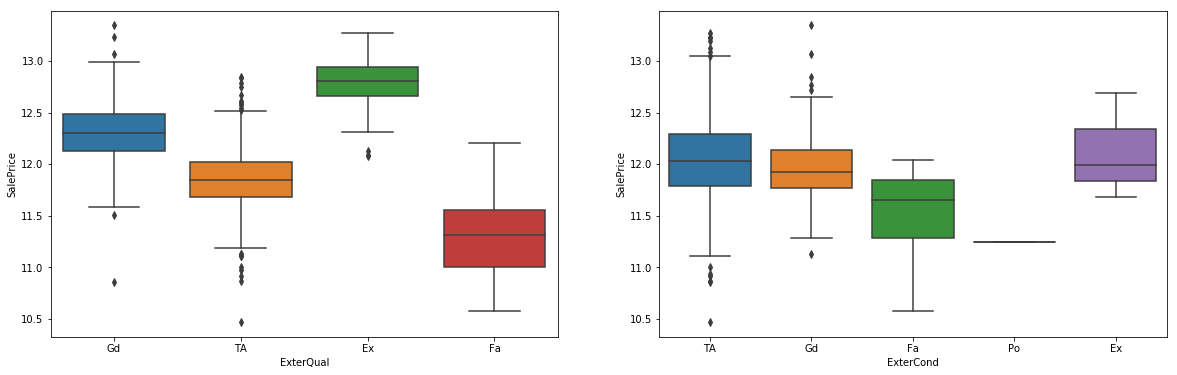

In [216]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['ExterQual'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['ExterCond'],y=aux_DF['SalePrice'],ax=ax2)

As would be expected, ExterQual seems to be an ordinal feature, from Fa to Ex and we can extrapolate this (and from common sense) to Poor Quality. For this reason, it will be converted to an ordinal feature.

In [217]:
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
aux_DF['ExterQual'].replace(to_replace=aux_dict,inplace=True)
aux_DF['ExterQual']= aux_DF['ExterQual'].astype('uint8')

ExterCond however, does not show the same pattern. Let's explore further.

In [218]:
aux_DF.groupby(['ExterCond','ExterQual'])['SalePrice'].describe()

count       mean       std        min        25%  \
ExterCond ExterQual                                                     
Ex        2            2.0  11.833807  0.219710  11.678448  11.756128   
          3            0.0        NaN       NaN        NaN        NaN   
          4            1.0  12.691584       NaN  12.691584  12.691584   
Fa        1            5.0  10.965872  0.263569  10.579005  10.915107   
          2           20.0  11.648316  0.311980  10.976799  11.387633   
          3            0.0        NaN       NaN        NaN        NaN   
Gd        1            0.0        NaN       NaN        NaN        NaN   
          2          107.0  11.862432  0.267922  11.133143  11.725602   
          3           35.0  12.277366  0.368965  11.584325  12.062487   
          4            3.0  12.410708  0.251713  12.128117  12.310625   
Po        1            0.0        NaN       NaN        NaN        NaN   
          2            1.0  11.245059       NaN  11.245059  11.245059   
TA        1            8.0  11.510497  0.369247  10.933000  11.315978   
          2          765.0  11.850226  0.278988  10.471978  11.686887   
          3          451.0  12.312153  0.272953  10.859018  12.132835   
          4           44.0  12.791788  0.261764  12.081082  12.667440   

                           50%        75%        max  
ExterCond ExterQual                                   
Ex        2          11.833807  11.911486  11.989166  
          3                NaN        NaN        NaN  
          4          12.691584  12.691584  12.691584  
Fa        1          11.002117  11.018646  11.314487  
          2          11.740465  11.864440  12.040614  
          3                NaN        NaN        NaN  
Gd        1                NaN        NaN        NaN  
          2          11.849405  11.999966  12.850557  
          3          12.254868  12.475841  13.345509  
          4          12.493133  12.552004  12.610874  
Po        1                NaN        NaN        NaN  
          2          11.245059  11.245059  11.245059  
TA        1          11.501045  11.634130  12.206078  
          2          11.849405  12.031725  12.834684  
          3          12.305923  12.491028  13.229570  
          4          12.832480  12.968659  13.275829

ExterCond, strangely does not seem to have have any regular property and will therefore be dropped as ExterQual seems to be the relevant property.

In [219]:
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
aux_DF['ExterCond'].replace(to_replace=aux_dict,inplace=True)
aux_DF['ExterCond']= aux_DF['ExterCond'].astype('uint8')

__Foundation__

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

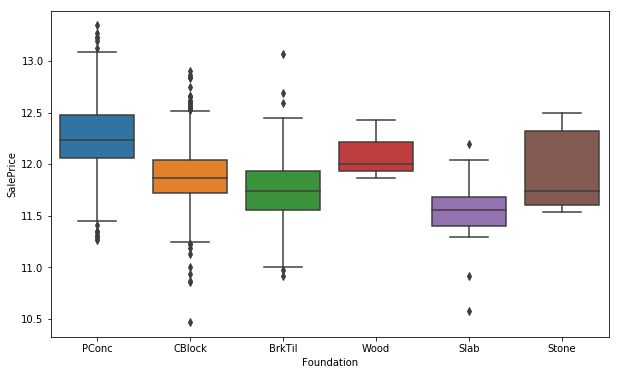

In [220]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['Foundation'],y=aux_DF['SalePrice'])

In [221]:
aux_DF.groupby(['Foundation'])['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Foundation                                                                
BrkTil      143.0  11.743192  0.345635  10.915107  11.560772  11.744045   
CBlock      626.0  11.878071  0.296223  10.471978  11.719948  11.863589   
PConc       640.0  12.257969  0.340278  11.264477  12.061053  12.230770   
Slab         24.0  11.532970  0.337259  10.579005  11.400533  11.553342   
Stone         6.0  11.933163  0.443916  11.540317  11.604280  11.744549   
Wood          3.0  12.102485  0.291137  11.870607  11.939117  12.007628   

                  75%        max  
Foundation                        
BrkTil      11.936552  13.071072  
CBlock      12.039135  12.906349  
PConc       12.474671  13.345509  
Slab        11.685916  12.198549  
Stone       12.325318  12.493133  
Wood        12.218424  12.429220

Stone and wood foundations have very few entries. Let's group them into an "Other" feature.

In [222]:
aux_dict = {'Stone':'Other','Wood':'Other'}
aux_DF['Foundation'].replace(to_replace=aux_dict,inplace=True)

__'BsmtQual' 'BsmtCond'__

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

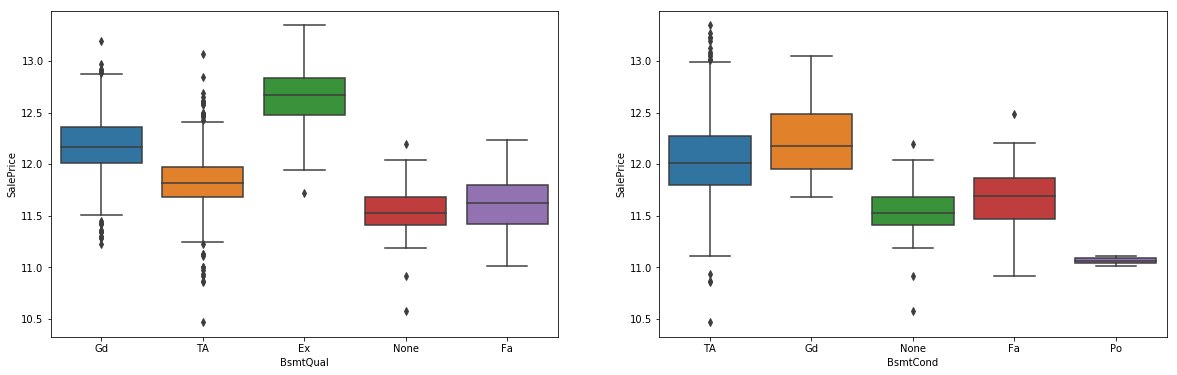

In [223]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['BsmtQual'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['BsmtCond'],y=aux_DF['SalePrice'],ax=ax2)

Both features seem Ordinal in nature. BsmtCond has 'Poor' quality entries which have worse SalePrices associated when compared to "None". Let's consider this when encoding both features to ordinal.

In [224]:
#Create map for ordinal convertion
aux_dict = {'Po':'0','None':'1','Fa':'2','TA':'3','Gd':'4','Ex':'5'}
#Change Feature to Ordinal
aux_DF['BsmtQual'].replace(to_replace=aux_dict,inplace=True)
aux_DF['BsmtQual']= aux_DF['BsmtQual'].astype('uint8')
#Change Feature to Ordinal
aux_DF['BsmtCond'].replace(to_replace=aux_dict,inplace=True)
aux_DF['BsmtCond']= aux_DF['BsmtCond'].astype('uint8')

__'BsmtExposure'__

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

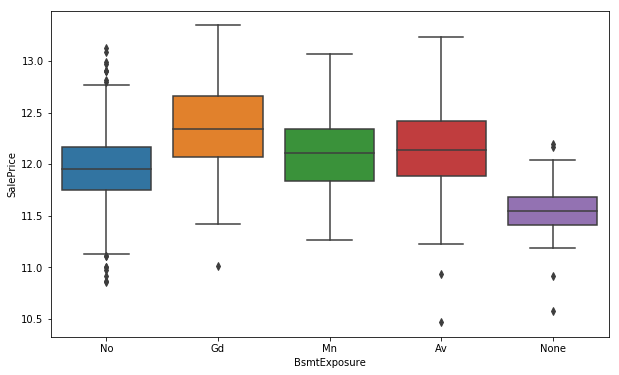

In [225]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['BsmtExposure'],y=aux_DF['SalePrice'])

In [226]:
aux_DF.groupby('BsmtExposure')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
BsmtExposure                                                                
Av            218.0  12.154798  0.393110  10.471978  11.884496  12.137120   
Gd            129.0  12.356481  0.418940  11.018646  12.071975  12.341263   
Mn            114.0  12.094825  0.386607  11.264477  11.840953  12.114139   
No            943.0  11.965470  0.339127  10.859018  11.751950  11.950541   
None           38.0  11.546484  0.302211  10.579005  11.407576  11.552167   

                    75%        max  
BsmtExposure                        
Av            12.424235  13.229570  
Gd            12.661917  13.345509  
Mn            12.337455  13.071072  
No            12.165256  13.126033  
None          11.686362  12.198549

This feature is Ordinal and shall be converted

In [227]:
#Create map for ordinal convertion
aux_dict = {'None':'0','No':'1','Mn':'2','Av':'3','Gd':'4'}
#Change Feature to Ordinal
aux_DF['BsmtExposure'].replace(to_replace=aux_dict,inplace=True)
aux_DF['BsmtExposure']= aux_DF['BsmtExposure'].astype('uint8')

__BsmtFinType1' 'BsmtFinType2'__

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

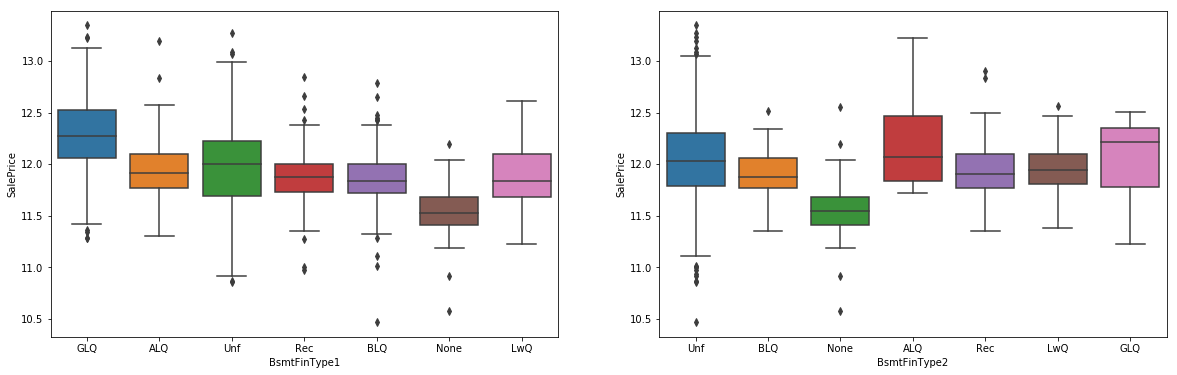

In [228]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['BsmtFinType1'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['BsmtFinType2'],y=aux_DF['SalePrice'],ax=ax2)

In [229]:
aux_DF.groupby('BsmtFinType1')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
BsmtFinType1                                                                
ALQ           219.0  11.956209  0.269204  11.302217  11.769510  11.915058   
BLQ           148.0  11.867642  0.312487  10.471978  11.717907  11.842953   
GLQ           412.0  12.295757  0.348007  11.289794  12.063217  12.272566   
LwQ            74.0  11.881361  0.310169  11.231901  11.686782  11.842236   
None           37.0  11.529691  0.287842  10.579005  11.407576  11.530775   
Rec           130.0  11.870117  0.274409  10.976799  11.730053  11.875824   
Unf           422.0  11.979003  0.395592  10.859018  11.691602  12.007292   

                    75%        max  
BsmtFinType1                        
ALQ           12.100440  13.195616  
BLQ           12.002105  12.791359  
GLQ           12.526342  13.345509  
LwQ           12.095838  12.614869  
None          11.685693  12.198549  
Rec           11.999200  12.850557  
Unf           12.227830  13.275829

It seems that for a basement, the standout categories are GoodLivingQuarters (positive case) and None (negative case). THe remaining options are mostly similar between themselves. An unfinished basement seems to encompass many cases and has a large dispersion of values. It seems that in most cases, it is not a negative thing, presumably because new owners can finish them in their own taste without the need of incurring further costs with destroying the existing basement.

In an attempt to reduce total number of features, "BLQ", "LWQ" and "Rec" will be grouped together into "BLAQRec".

In [230]:
#Create map for grouping categories
aux_dict = {'BLQ':'BLAQRec','LWQ':'BLAQRec','Rec':'BLAQRec'}
#Groups the previously mapped features
aux_DF['BsmtFinType1'].replace(to_replace=aux_dict,inplace=True)

In [231]:
aux_DF.groupby('BsmtFinType2')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
BsmtFinType2                                                                 
ALQ             19.0  12.167070  0.403957  11.724005  11.840577  12.071975   
BLQ             32.0  11.914634  0.243690  11.350418  11.774808  11.877206   
GLQ             14.0  12.033573  0.417365  11.231901  11.776314  12.220338   
LwQ             46.0  11.977839  0.253783  11.385103  11.809306  11.944693   
None            38.0  11.556718  0.329199  10.579005  11.407576  11.552167   
Rec             54.0  11.964651  0.298742  11.350418  11.767575  11.909960   
Unf           1239.0  12.048109  0.387926  10.471978  11.793401  12.028745   

                    75%        max  
BsmtFinType2                        
ALQ           12.472492  13.226725  
BLQ           12.063889  12.513193  
GLQ           12.352332  12.506181  
LwQ           12.099255  12.567241  
None          11.686362  12.556733  
Rec           12.101550  12.904210  
Unf           12.300250  13.345509

Regarding BsmtFinType2, most basements have Unf status.

Let's group some features to reduce resulting OHE features: GLQ with Unf.

In [232]:
#Create map for grouping categories
aux_dict = {'GLQ':'Unf'}
#Groups the previously mapped features
aux_DF['BsmtFinType2'].replace(to_replace=aux_dict,inplace=True)

__'Heating' 'HeatingQC'__

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

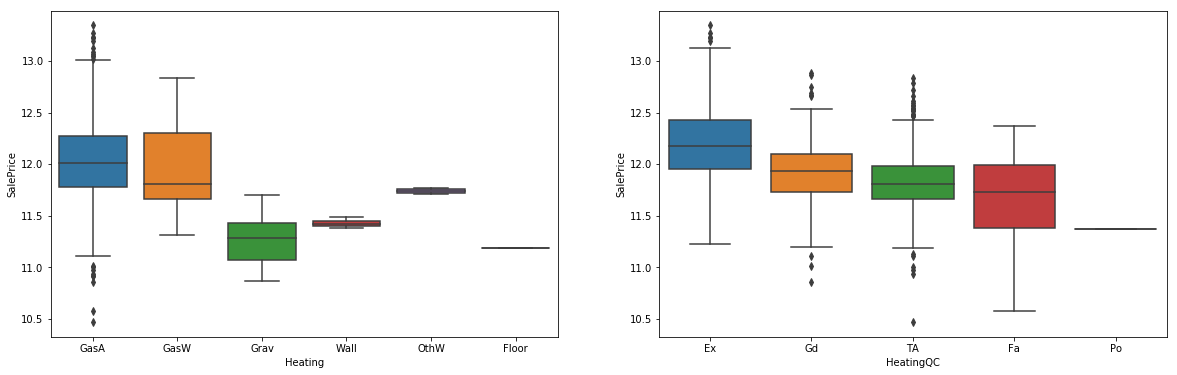

In [233]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['Heating'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['HeatingQC'],y=aux_DF['SalePrice'],ax=ax2)

In [234]:
aux_DF.groupby('Heating')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Heating                                                                 
Floor       1.0  11.191356       NaN  11.191356  11.191356  11.191356   
GasA     1411.0  12.035423  0.381647  10.471978  11.784485  12.013707   
GasW       18.0  11.930694  0.433659  11.314487  11.664566  11.812637   
Grav        6.0  11.269763  0.304724  10.868587  11.070891  11.283505   
OthW        2.0  11.741614  0.042186  11.711785  11.726699  11.741614   
Wall        4.0  11.429751  0.048594  11.379406  11.400533  11.423433   

               75%        max  
Heating                        
Floor    11.191356  11.191356  
GasA     12.277001  13.345509  
GasW     12.300588  12.834684  
Grav     11.430430  11.703554  
OthW     11.756529  11.771444  
Wall     11.452651  11.492733

It seems most houses have GasA type heating. Some houses have other types of heating but they are in very low quantity and will be grouped to reduce feature number:

- Floor with Grav: "FlrGrav";
- OthW with GasW: "W";
- Wall with GasA, it will be treated as an outlier.

In [235]:
#Create map for grouping categories
aux_dict = {'Floor':'FlrGrav','Grav':'FlrGrav','OthW':'W','GasW':'W','Wall':'GasA'}
#Groups the previously mapped features
aux_DF['Heating'].replace(to_replace=aux_dict,inplace=True)

HeatingQC seems to be an ordinal feature. Let's convert it!

In [236]:
#Create map for converting to Ordinal
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
#Converts feature
aux_DF['HeatingQC'].replace(to_replace=aux_dict,inplace=True)
aux_DF['HeatingQC'] = aux_DF['HeatingQC'].astype('uint8')

__'CentralAir' 'Electrical'__

CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

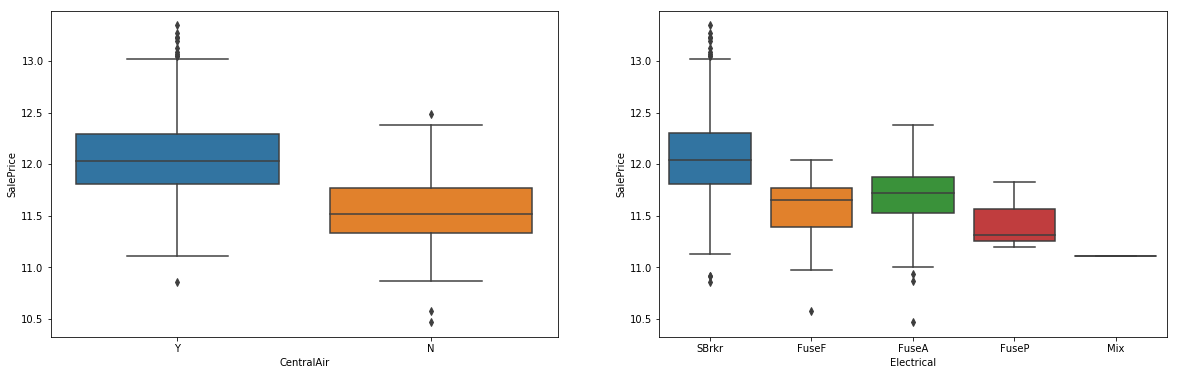

In [237]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['CentralAir'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['Electrical'],y=aux_DF['SalePrice'],ax=ax2)

CentrailAir is a binary feature. Let's convert it.

In [238]:
aux_DF['CentralAir'] = (aux_DF['CentralAir'] == 'Y').astype('uint8')

In [239]:
aux_DF.groupby('Electrical')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Electrical                                                                 
FuseA         91.0  11.679067  0.319199  10.471978  11.527715  11.724005   
FuseF         27.0  11.539635  0.332067  10.579005  11.390625  11.652696   
FuseP          3.0  11.446820  0.334972  11.198228  11.256358  11.314487   
Mix            1.0  11.112463       NaN  11.112463  11.112463  11.112463   
SBrkr       1320.0  12.064340  0.371115  10.859018  11.812852  12.043560   

                  75%        max  
Electrical                        
FuseA       11.879309  12.384223  
FuseF       11.774913  12.040614  
FuseP       11.571115  11.827744  
Mix         11.112463  11.112463  
SBrkr       12.305923  13.345509

For this feature, we should group Mix and FuseP with FureF, to reduce number of features. 

In [240]:
#Create map for converting to Ordinal
aux_dict = {'Mix':'FuseF','FuseP':'FuseF'}
#Converts feature
aux_DF['Electrical'].replace(to_replace=aux_dict,inplace=True)

When used, this feature seems to worsen results and will therefore be dropped.

__'KitchenQual'__

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

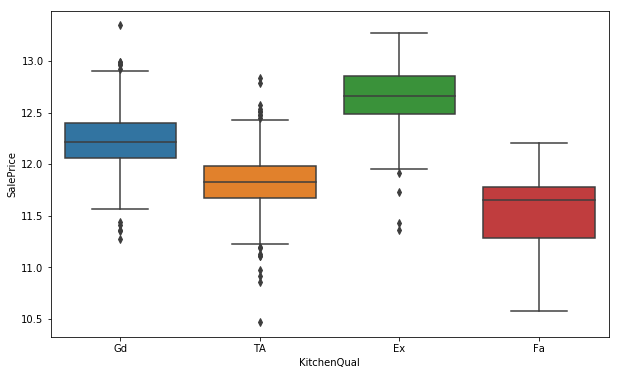

In [241]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['KitchenQual'],y=aux_DF['SalePrice'])

KitchenQual is an ordinal feature, as expected. Let's convert it.

In [242]:
#Create map for converting to Ordinal
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
#Converts feature
aux_DF['KitchenQual'].replace(to_replace=aux_dict,inplace=True)
aux_DF['KitchenQual'] = aux_DF['KitchenQual'].astype('uint8')

__'Functional'__

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

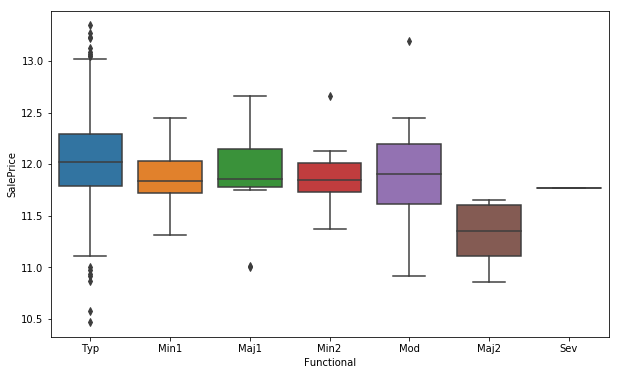

In [243]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['Functional'],y=aux_DF['SalePrice'])

As only 1 case of Sev exists, let's group it with Maj2

In [244]:
#Create map for converting to Ordinal
aux_dict = {'Sev':'Maj2'}
#Converts feature
aux_DF['Functional'].replace(to_replace=aux_dict,inplace=True)

__'FireplaceQu'__

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

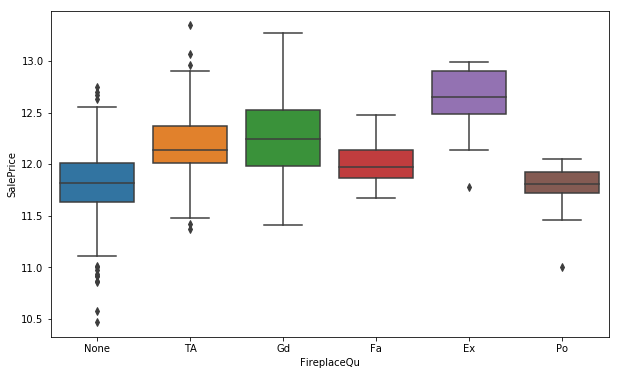

In [245]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['FireplaceQu'],y=aux_DF['SalePrice'])

In [246]:
aux_DF.groupby('FireplaceQu')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
FireplaceQu                                                                
Ex            23.0  12.632437  0.311855  11.779136  12.484214  12.653962   
Fa            33.0  12.008516  0.195310  11.669938  11.870607  11.970357   
Gd           375.0  12.256752  0.376204  11.411457  11.982451  12.240479   
None         682.0  11.818485  0.309468  10.471978  11.635152  11.817656   
Po            19.0  11.775549  0.244179  11.002117  11.719541  11.805603   
TA           310.0  12.186113  0.287353  11.373675  12.013707  12.141539   

                   75%        max  
FireplaceQu                        
Ex           12.904560  12.994532  
Fa           12.138869  12.476104  
Gd           12.524475  13.275829  
None         12.013252  12.744447  
Po           11.924844  12.055256  
TA           12.371591  13.345509

This feature does not perfom as well in ordinal form so it will be kept as categorical

__'GarageType' 'GarageFinish'__

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

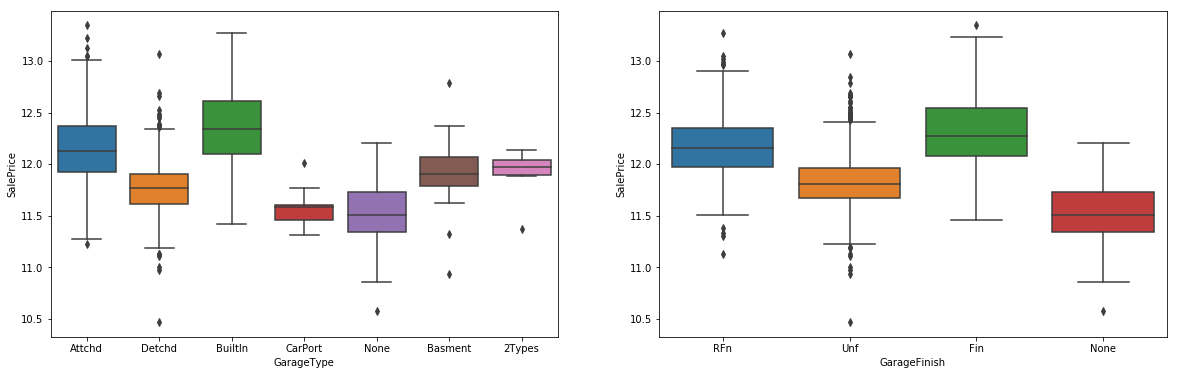

In [247]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['GarageType'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['GarageFinish'],y=aux_DF['SalePrice'],ax=ax2)

In [248]:
aux_DF.groupby('GarageType')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageType                                                                
2Types        6.0  11.899164  0.273337  11.373675  11.892971  11.975061   
Attchd      861.0  12.159831  0.325258  11.225257  11.925042  12.128117   
Basment      19.0  11.916447  0.389889  10.933000  11.791668  11.904974   
BuiltIn      87.0  12.377776  0.383678  11.418626  12.103488  12.345839   
CarPort       9.0  11.588004  0.206182  11.314487  11.461643  11.589896   
Detchd      383.0  11.774125  0.271241  10.471978  11.610512  11.774528   
None         77.0  11.515276  0.308369  10.579005  11.344519  11.512935   

                  75%        max  
GarageType                        
2Types      12.045000  12.137264  
Attchd      12.367345  13.345509  
Basment     12.066668  12.791359  
BuiltIn     12.616969  13.275829  
CarPort     11.608245  12.013101  
Detchd      11.904974  13.071072  
None        11.728045  12.208575

To reduce the number of OHE features, 2Types will be combined with Basment and CarPort with None

In [249]:
#Create map for grouping
aux_dict = {'2Types':'Basment','CarPort':'None'}
#Converts feature
aux_DF['GarageType'].replace(to_replace=aux_dict,inplace=True)

Regarding GarageFinish, the feature seems ordinal.

In [250]:
aux_DF.groupby('GarageFinish')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageFinish                                                                
Fin           346.0  12.315368  0.340689  11.459008  12.078245  12.278398   
None           77.0  11.515276  0.308369  10.579005  11.344519  11.512935   
RFn           421.0  12.173330  0.291867  11.133143  11.970357  12.154785   
Unf           598.0  11.826056  0.289090  10.471978  11.669296  11.813037   

                    75%        max  
GarageFinish                        
Fin           12.546682  13.345509  
None          11.728045  12.208575  
RFn           12.354497  13.275829  
Unf           11.967187  13.071072

In [251]:
#Create map for converting to Ordinal
aux_dict = {'None':'0','Unf':'1','RFn':'2','Fin':'3'}
#Converts feature
aux_DF['GarageFinish'].replace(to_replace=aux_dict,inplace=True)
aux_DF['GarageFinish'] = aux_DF['GarageFinish'].astype('uint8')

__'GarageQual' 'GarageCond'__

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

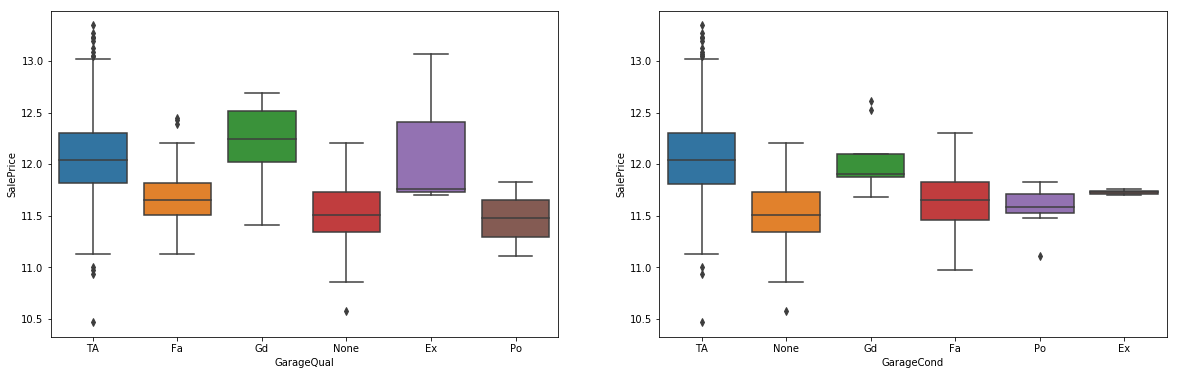

In [252]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['GarageQual'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['GarageCond'],y=aux_DF['SalePrice'],ax=ax2)

In [253]:
aux_DF.groupby('GarageQual')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageQual                                                                 
Ex             3.0  12.175455  0.776141  11.699413  11.727646  11.755879   
Fa            47.0  11.687629  0.298914  11.134604  11.512935  11.652696   
Gd            14.0  12.220073  0.381124  11.411457  12.019128  12.243951   
None          77.0  11.515276  0.308369  10.579005  11.344519  11.512935   
Po             3.0  11.472505  0.357665  11.112463  11.294886  11.477309   
TA          1298.0  12.069897  0.362971  10.471978  11.820197  12.043560   

                  75%        max  
GarageQual                        
Ex          12.413476  13.071072  
Fa          11.822030  12.452937  
Gd          12.512818  12.691584  
None        11.728045  12.208575  
Po          11.652526  11.827744  
TA          12.301387  13.345509

GarageQual seems to be ordinal, with None and Po sharing similar Stats. They will be grouped in the lowest ordinal level.

In [254]:
#Create map for converting to Ordinal
aux_dict = {'None':'0','Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
#Converts feature
aux_DF['GarageQual'].replace(to_replace=aux_dict,inplace=True)
aux_DF['GarageQual'] = aux_DF['GarageQual'].astype('uint8')

In [255]:
aux_DF.groupby('GarageCond')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageCond                                                                 
Ex             2.0  11.727646  0.039928  11.699413  11.713530  11.727646   
Fa            33.0  11.643032  0.285878  10.976799  11.461643  11.652696   
Gd             9.0  12.050621  0.322364  11.682677  11.877576  11.904974   
None          77.0  11.515276  0.308369  10.579005  11.344519  11.512935   
Po             7.0  11.572888  0.233637  11.112463  11.524256  11.589896   
TA          1314.0  12.070722  0.364941  10.471978  11.813037  12.043560   

                  75%        max  
GarageCond                        
Ex          11.741763  11.755879  
Fa          11.831386  12.301387  
Gd          12.100718  12.618186  
None        11.728045  12.208575  
Po          11.715799  11.827744  
TA          12.305923  13.345509

This feature is ordinal, however, it displays some annomalies, as Gd quality GarageCond have similar mean SalePrice as TA garages. Most garages are also TA.

This feature will be grouped into 4 values, 0 for None, 1 por Po, 2 for Fa and 3 for TA or better.

In [256]:
#Create map for converting to Ordinal
aux_dict = {'None':'0','Po':'1','Fa':'2','TA':'3','Gd':'3','Ex':'3'}
#Converts feature
aux_DF['GarageCond'].replace(to_replace=aux_dict,inplace=True)
aux_DF['GarageCond'] = aux_DF['GarageCond'].astype('uint8')

__'PavedDrive'__

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

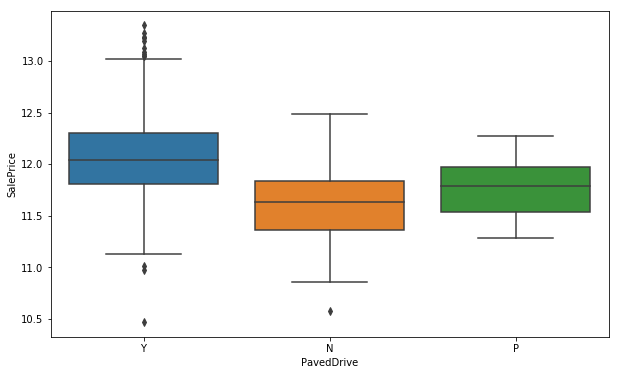

In [257]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['PavedDrive'],y=aux_DF['SalePrice'])

This feature will be left "as is"

__'PoolQC'__

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

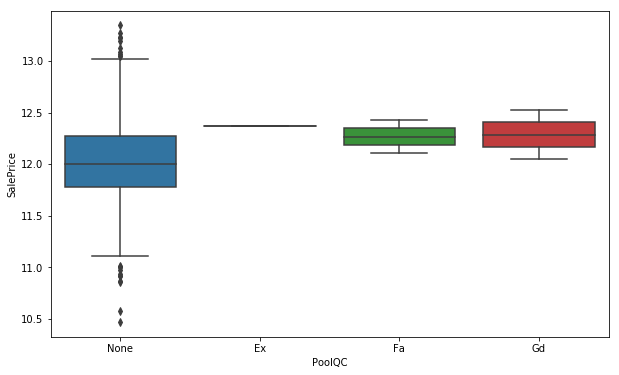

In [258]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['PoolQC'],y=aux_DF['SalePrice'])

In [259]:
aux_DF.groupby('PoolQC')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
PoolQC                                                                 
Ex         1.0  12.367345       NaN  12.367345  12.367345  12.367345   
Fa         2.0  12.267739  0.228369  12.106258  12.186998  12.267739   
Gd         2.0  12.286923  0.335873  12.049425  12.168174  12.286923   
None    1437.0  12.027328  0.386494  10.471978  11.775297  12.004574   

              75%        max  
PoolQC                        
Ex      12.367345  12.367345  
Fa      12.348480  12.429220  
Gd      12.405672  12.524421  
None    12.273736  13.345509

Almost no houses have pools. Let's convert this feature to binary

In [260]:
aux_DF['PoolQc'] = (aux_DF['PoolQC'] != 'None').astype('uint8')

__'Fence'__

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

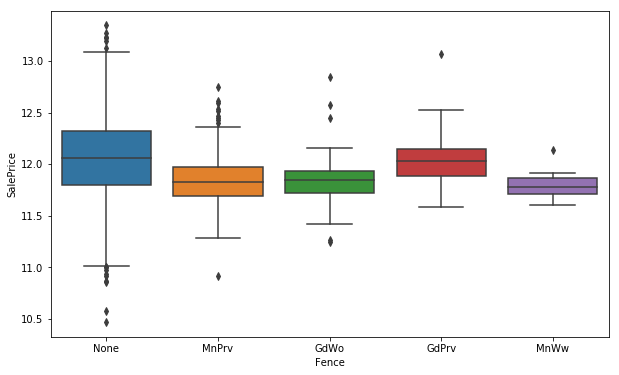

In [261]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['Fence'],y=aux_DF['SalePrice'])

In [262]:
aux_DF.groupby('Fence')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Fence                                                                 
GdPrv    59.0  12.057119  0.262855  11.589896  11.884130  12.028745   
GdWo     51.0  11.849117  0.278508  11.245059  11.719948  11.845827   
MnPrv   154.0  11.851147  0.277696  10.915107  11.694630  11.831205   
MnWw     11.0  11.796808  0.151907  11.608245  11.707602  11.775297   
None   1167.0  12.060180  0.400285  10.471978  11.798112  12.061053   

             75%        max  
Fence                        
GdPrv  12.152015  13.071072  
GdWo   11.936552  12.850557  
MnPrv  11.970357  12.751303  
MnWw   11.870509  12.138869  
None   12.323416  13.345509

Strangely Good fences do not seem to correspond to better SalePrices than other fences as would be expected. This feature will be discarded.

__'MiscFeature'__

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

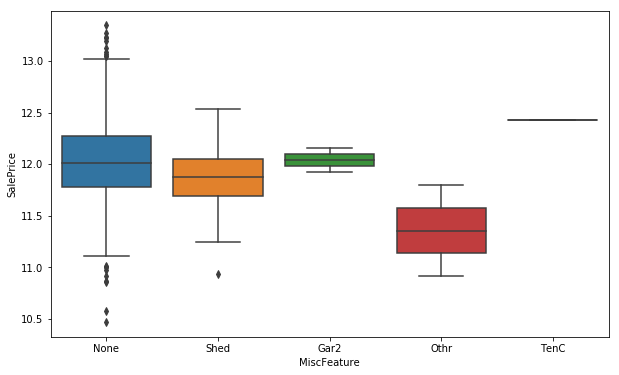

In [263]:
plt.figure(figsize=(10,6))
sns.boxplot(x=aux_DF['MiscFeature'],y=aux_DF['SalePrice'])

In [264]:
aux_DF.groupby('MiscFeature')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
MiscFeature                                                                 
Gar2            2.0  12.041566  0.160115  11.928348  11.984957  12.041566   
None         1388.0  12.034560  0.385747  10.471978  11.776738  12.013707   
Othr            2.0  11.356609  0.624379  10.915107  11.135858  11.356609   
Shed           49.0  11.868394  0.349501  10.933000  11.695255  11.877576   
TenC            1.0  12.429220       NaN  12.429220  12.429220  12.429220   

                   75%        max  
MiscFeature                        
Gar2         12.098175  12.154785  
None         12.278398  13.345509  
Othr         11.577361  11.798112  
Shed         12.055256  12.531776  
TenC         12.429220  12.429220

As Gar2, Othr and TenC have so few entries, this feature will be converted to binary

In [265]:
aux_DF['MiscFeature'] = (aux_DF['MiscFeature'] != 'None').astype('uint8')

__'SaleType', 'SaleCondition'__

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

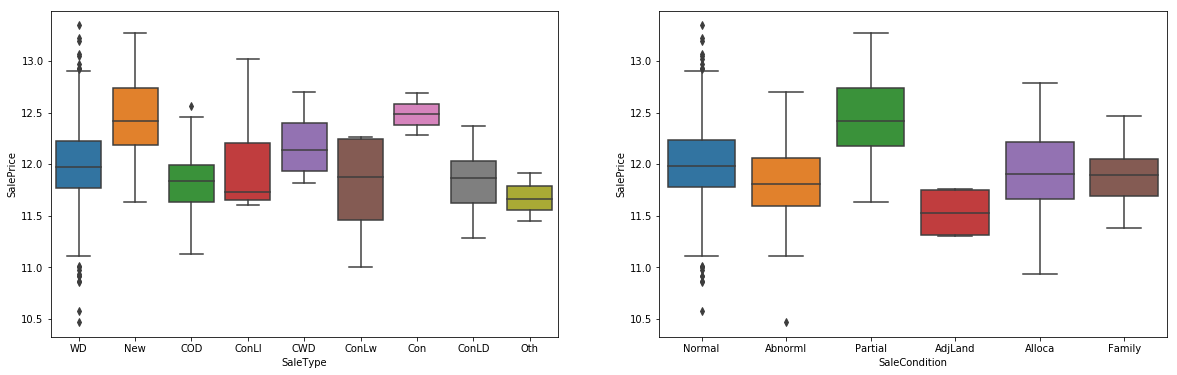

In [266]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=aux_DF['SaleType'],y=aux_DF['SalePrice'],ax=ax1)
sns.boxplot(x=aux_DF['SaleCondition'],y=aux_DF['SalePrice'],ax=ax2)

In [267]:
aux_DF.groupby('SaleType')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
SaleType                                                                 
COD         42.0  11.847096  0.297534  11.133143  11.631782  11.842236   
CWD          4.0  12.198350  0.391644  11.820418  11.932872  12.134734   
Con          2.0  12.483915  0.289330  12.279328  12.381621  12.483915   
ConLD        8.0  11.825832  0.383953  11.288544  11.627612  11.865223   
ConLI        5.0  12.044885  0.595663  11.608245  11.652696  11.736077   
ConLw        5.0  11.769714  0.539515  11.002117  11.461643  11.877576   
New        118.0  12.463662  0.347117  11.635152  12.184848  12.423660   
Oth          3.0  11.675303  0.236625  11.445727  11.553756  11.661785   
WD        1255.0  11.995211  0.364220  10.471978  11.767575  11.976666   

                75%        max  
SaleType                        
COD       11.993723  12.567241  
CWD       12.400212  12.703512  
Con       12.586208  12.688502  
ConLD     12.036839  12.367890  
ConLI     12.206078  13.021329  
ConLw     12.242891  12.264346  
New       12.742328  13.275829  
Oth       11.790091  11.918397  
WD        12.223423  13.345509

There seem to be features that only apply to a couple of categories. Let's combine them:

- ConLI with WD;
- Con, CWD with New;
- ConLD, ConLw,Oth with COD;

In [268]:
#Create map for merging sparse categories
aux_dict = {'ConLI':'WD','Con':'New','CWD':'New','ConLD':'COD','ConLw':'COD','Oth':'COD'}
#Converts feature
aux_DF['SaleType'].replace(to_replace=aux_dict,inplace=True)

In [269]:
aux_DF.groupby('SaleCondition')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
SaleCondition                                                                 
Abnorml          94.0  11.817791  0.369179  10.471978  11.595526  11.810976   
AdjLand           4.0  11.529157  0.255059  11.302217  11.311419  11.529266   
Alloca           12.0  11.914465  0.504289  10.933000  11.663954  11.905339   
Family           18.0  11.903313  0.296407  11.385103  11.692856  11.898102   
Normal         1194.0  12.006526  0.360439  10.579005  11.775297  11.982935   
Partial         120.0  12.456106  0.352152  11.635152  12.181270  12.418974   

                     75%        max  
SaleCondition                        
Abnorml        12.064652  12.703512  
AdjLand        11.747004  11.755879  
Alloca         12.216167  12.791359  
Family         12.047958  12.464587  
Normal         12.230770  13.345509  
Partial        12.738088  13.275829

Let's join categories with few samples

In [270]:
#Create map for merging sparse categories
#aux_dict = {'AdjLand':'Partial','Alloca':'Family'}
#Converts feature
#aux_DF['SaleType'].replace(to_replace=aux_dict,inplace=True)

__Creating new Features__

Let's create some new features for enriching our dataset. Let's start by refining the areas and room numbers

In [271]:
#Checking the top 10 features correlated with SalePrice
aux_DF.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice      1.000000
OverallQual    0.823930
GrLivArea      0.725351
ExterQual      0.685224
GarageCars     0.679452
KitchenQual    0.672689
GarageArea     0.654777
BsmtQual       0.654058
TotalBsmtSF    0.649001
1stFlrSF       0.615807
Name: SalePrice, dtype: float64

Let's create features with:
 - The full SF area of the house (HouseSF);
 - The total number of bathrooms (considering full bathroom as 1 and halfbathroom as 0.5) (Bathrooms);
 - Several features that combined OverallQual and OverallCond - as OverallScore
 - Features that combine area with Qual into AreaQual

In [272]:
#Calculating HouseSF
aux_DF['HouseSF'] = aux_DF['GrLivArea'] + aux_DF['TotalBsmtSF']

In [273]:
#Calculating total number of bathrooms
aux_DF['Bathrooms'] = aux_DF['FullBath'] + 0.5*aux_DF['HalfBath']+aux_DF['BsmtFullBath']+0.5*aux_DF['BsmtHalfBath']

In [274]:
aux_DF['OverallScore'] = aux_DF['OverallQual'] * aux_DF['OverallCond']
aux_DF['ExterScore'] = aux_DF['ExterQual'] * aux_DF['ExterCond']
aux_DF['KitchenAreaQual'] = aux_DF['KitchenAbvGr'] * aux_DF['KitchenQual']
aux_DF['GarageAreaQual'] = aux_DF['GarageArea'] * aux_DF['GarageQual']

In [275]:
#Checking the top 10 features correlated with SalePrice
aux_DF.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
HouseSF         0.826610
OverallQual     0.823930
GrLivArea       0.725351
OverallScore    0.708813
ExterQual       0.685224
GarageCars      0.679452
KitchenQual     0.672689
Bathrooms       0.672027
GarageArea      0.654777
Name: SalePrice, dtype: float64

Creating Polynomials

In [276]:
#store the top 10 feature names for a for loop
top_10 = aux_DF.corr()['SalePrice'].sort_values(ascending=False).head(10).index

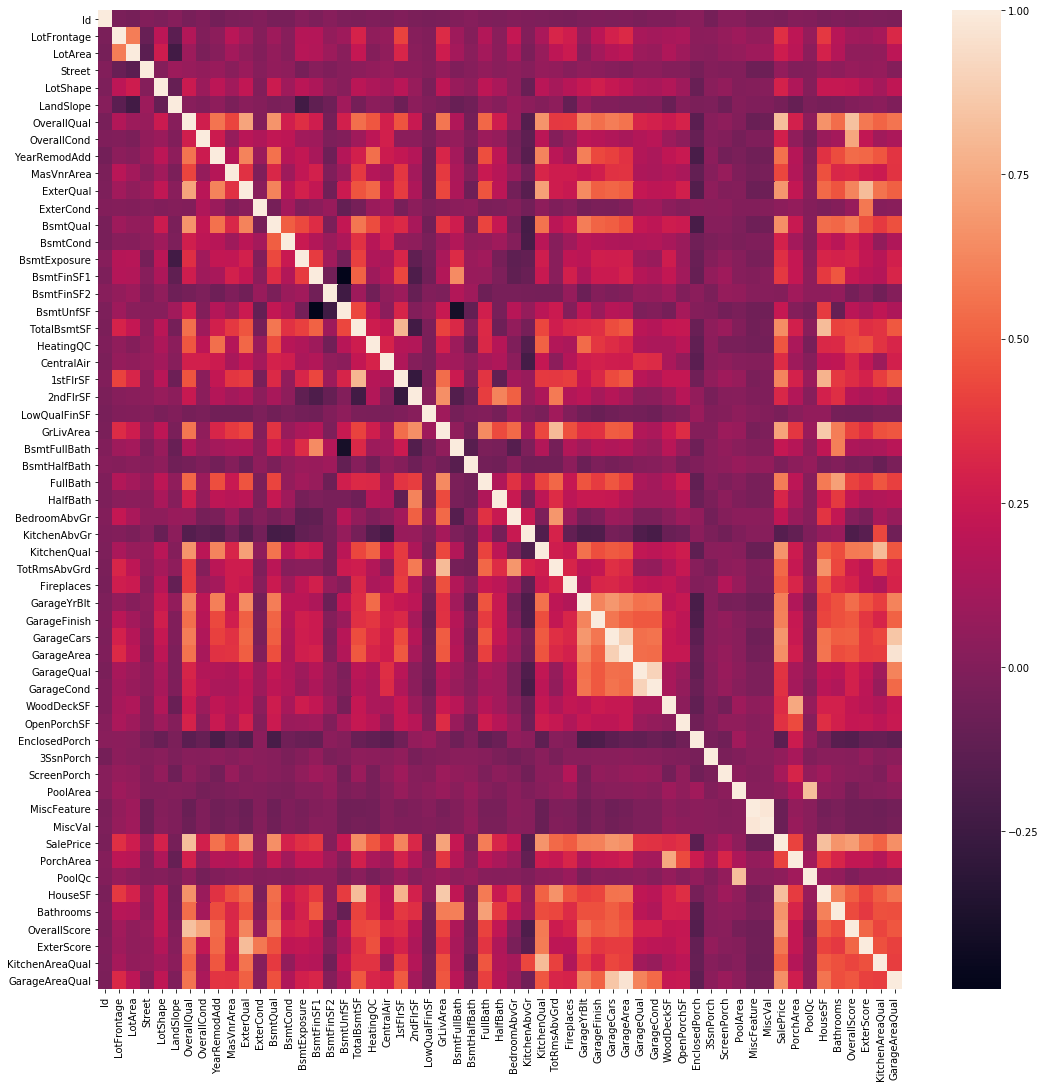

In [277]:
plt.figure(figsize=(18,18))
sns.heatmap(aux_DF.corr())

__Multicolinearity__

Features that are highly correlated with each other are said to be colinear and can pose a challenge for models. Not only do they supply redundant information for the model, but they can make the model ignore other features, less correlated with the target variable but nonetheless important and with predictive value. This is because multicolinearity will increase the standard errors of the coefficients. As the model focuses on reducing overall error, it will be tempted to ignore other, less "significant" features that could have added some value to the result. Therefore, let's use the heatmap to identify multicolinear features and let's delete the less correlated of the pairs.

It seems that MisVal and MiscFeature are highly correlated with each other:

In [278]:
aux_DF[['MiscFeature','MiscVal','SalePrice']].corr()

MiscFeature   MiscVal  SalePrice
MiscFeature     1.000000  0.980103  -0.082755
MiscVal         0.980103  1.000000  -0.078524
SalePrice      -0.082755 -0.078524   1.000000

Neither seems particularly useful but we'll drop MiscVal as it seems to be less useful!

GarageQual and GarageCond:

In [279]:
aux_DF[['GarageQual','GarageCond','SalePrice']].corr()

GarageQual  GarageCond  SalePrice
GarageQual    1.000000    0.901125   0.361912
GarageCond    0.901125    1.000000   0.354523
SalePrice     0.361912    0.354523   1.000000

Let's keep GarageQual!

GarageCars and GarageArea

In [280]:
aux_DF[['GarageCars','GarageArea','SalePrice']].corr()

GarageCars  GarageArea  SalePrice
GarageCars    1.000000    0.891172   0.679452
GarageArea    0.891172    1.000000   0.654777
SalePrice     0.679452    0.654777   1.000000

### Feature inclusion on the final Dataset

The information on aux_DF will now be included in the final combined DataFrame that will be used, with only the selected features.

In [281]:
#combined = aux_DF[['Id','SalePrice','OverallQual','OverallCond','GrLivArea','PorchArea','TotalBsmtSF','BsmtUnfSF','YearBuilt_Bins','YearRemodAdd','FullBath','HalfBath',\
#                  'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','MiscVal','MoSold','YrSold','MSZoning','Street','Alley','LotShape','LandContour','LotConfig',\
#                  'LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','Foundation',\
#                  'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType',\
#                  'GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType', 'SaleCondition','LotFrontage','LotArea','1stFlrSF','2ndFlrSF',\
#                   'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','HouseSF','Bathrooms','OverallScore','ExterScore',\
#                  'KitchenAreaQual','GarageAreaQual','GarageCars]]

In [282]:
combined = aux_DF[['Id','SalePrice','OverallQual','OverallCond','GrLivArea','PorchArea','TotalBsmtSF','BsmtUnfSF','YearBuilt_Bins','YearRemodAdd','FullBath','HalfBath',\
                  'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','MiscFeature','MoSold','YrSold','MSZoning','Street','Alley','LotShape','LandContour','LotConfig',\
                  'Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','MasVnrType','ExterQual','Foundation',\
                  'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType',\
                  'GarageQual','PavedDrive','PoolQC','SaleType', 'SaleCondition','LotFrontage','LotArea','1stFlrSF','2ndFlrSF',\
                   'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','HouseSF','Bathrooms','OverallScore','ExterScore',\
                  'KitchenAreaQual','GarageAreaQual','GarageCars']]

In [283]:
#Polynomials
#for i in top_10:
#    if i != 'SalePrice':
#        combined[i+' s2'] = combined[i] ** 2
#        combined[i+' s3'] = combined[i] ** 3
#        combined[i+' sqrt'] = combined[i] ** 0.5

In [284]:
combined.shape

(2901, 68)

### OHE (One Hot Encoding)

Categorical features will need to be One Hot Encoded to be used by the models. 

One Hot Encoding is a technique whereby 1 feature with n possible categories is converted into n features that can be either 1 (in case the category corresponds to the specific sample) or 0.

In [285]:
categorical = [i for i in combined.columns if ((combined.dtypes[i].name == 'object') or (combined.dtypes[i].name == 'category'))]

In [286]:
#OHE
combined = pd.get_dummies(combined,columns=categorical)

In [287]:
combined.shape

(2901, 195)

XGBoost does not deal well with characters such as [,],| > or <. Therefore, these will be removed from the feature names!

In [288]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [289]:
combined.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in combined.columns.values]

### Normalizing Features

Previously, we have checked the SalePrice distribution and its skewdness. Let's repeat the analysis, but for all features!

Skewnewss quantifies how symmetrical the distribution is:
- Skeweness < -1 or > 1: Highly skewed;
- Skeweness [-1, -0.5[ or ]0.5, 1]: Moderately skewed;
- Skeweness [-0.5, 0.5]

Source: https://help.gooddata.com/display/doc/Normality+Testing+-+Skewness+and+Kurtosis

In [290]:
#Let's list numerical values by skewedness
skew = combined.select_dtypes(['float64','int64']).drop(['SalePrice','Id'],axis=1).skew().sort_values(ascending=False)
skew

LotArea           13.129487
3SsnPorch         11.346019
EnclosedPorch      4.027892
ScreenPorch        3.936370
OpenPorchSF        2.474282
WoodDeckSF         1.847712
LotFrontage        1.675858
PorchArea          1.382112
1stFlrSF           1.254975
GrLivArea          0.979167
HouseSF            0.939903
BsmtUnfSF          0.920405
2ndFlrSF           0.841275
TotalBsmtSF        0.658898
Bathrooms          0.483920
GarageAreaQual     0.450017
OverallQual        0.182366
GarageCars        -0.218172
OverallScore      -1.197325
dtype: float64

In [291]:
#Let's normalize all features with moderate or high skeweness (> 0.5 or <-0.5)
list_skewed = skew[abs(skew)>0.5].index
list_skewed.shape

(15,)

__Box Cox Tranformation:__

Box Cox transformation is used to approximate non-normal features to normal ones. 

It works by applying the following formula, where lambda can be any value from -5 to 5:

<img src="images/Box Cox Formula.png">

As values must be positive, all features to be scaled will be increased by 1. This will be of little consequence as all features will be scaled afterwards, eliminating this transformation.

In [292]:
combined.head()

Id  SalePrice  OverallQual  OverallCond  GrLivArea  PorchArea  TotalBsmtSF  \
0   1  12.247699            7            1       1710         61        856.0   
1   2  12.109016            6            1       1262        298       1262.0   
2   3  12.317171            7            1       1786         42        920.0   
3   4  11.849405            7            1       1717        307        756.0   
4   5  12.429220            8            1       2198        276       1145.0   

   BsmtUnfSF  YearRemodAdd  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      150.0             5         2         1             3             1   
1      284.0             2         2         0             3             1   
2      434.0             5         2         1             3             1   
3      540.0             1         1         0             3             1   
4      490.0             4         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  MiscFeature  Street  LotShape  ExterQual  \
0             8           0            0       1         0          3   
1             6           1            0       1         0          2   
2             6           1            0       1         1          3   
3             7           1            0       1         1          2   
4             9           1            0       1         1          3   

   BsmtQual  BsmtCond  BsmtExposure  HeatingQC  CentralAir  KitchenQual  \
0         4         3             1          4           1            3   
1         4         3             4          4           1            2   
2         4         3             2          4           1            3   
3         3         4             1          3           1            3   
4         4         3             3          4           1            3   

   GarageQual  LotFrontage  LotArea  1stFlrSF  2ndFlrSF  WoodDeckSF  \
0           2         65.0     8450       856       854           0   
1           2         80.0     9600      1262         0         298   
2           2         68.0    11250       920       866           0   
3           2         60.0     9550       961       756           0   
4           2         84.0    14260      1145      1053         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  HouseSF  Bathrooms  \
0           61              0          0            0   2566.0        3.5   
1            0              0          0            0   2524.0        2.5   
2           42              0          0            0   2706.0        3.5   
3           35            272          0            0   2473.0        2.0   
4           84              0          0            0   3343.0        3.5   

   OverallScore  ExterScore  KitchenAreaQual  GarageAreaQual  GarageCars  \
0             7           6                3          1096.0         2.0   
1             6           4                2           920.0         2.0   
2             7           6                3          1216.0         2.0   
3             7           4                3          1284.0         3.0   
4             8           6                3          1672.0         3.0   

   YearBuilt_Bins_(1871.862, 1881.857_  YearBuilt_Bins_(1881.857, 1891.714_  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   YearBuilt_Bins_(1891.714, 1901.571_  YearBuilt_Bins_(1901.571, 1911.429_  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                  

In [293]:
print("There are {} skewed numerical features to Box Cox transform".format(skew.shape[0]))

from scipy.stats import boxcox
#lam = 0.15
for feature in list_skewed:
    #all_data[feat] += 1
    combined[feature],_ = boxcox(combined[feature]+1)

There are 19 skewed numerical features to Box Cox transform


### Scaling of features

For adequate model performance it is important that all features are scaled to make sure mean is 0 and variance of 1.

To ensure it, a scaling tool from Sklearn will be used. 

RobustScaler is a scaling method that centers data on the median instead of the mean and uses interquantile range [0.25 to 0.75] for scale instead of variance. This is a more robust method to outliers than a StandardScaler.

In [294]:
scaler = RobustScaler(with_centering=True,with_scaling=True)

In [295]:
#To make sure the scaled dataframes are dataframes and not arrays, the column names will be stored and fed on the scaler operation below
columns = combined.columns
comb_id = combined['Id']
y = combined[combined['Id']<= 1460]['SalePrice']
combined.drop('SalePrice',axis=1,inplace=True)

In [296]:
id_list = combined[combined['Id']> 1460]['Id']
#To make sure the scaled dataframes are dataframes and not arrays, the column names will be stored and fet on the scaler operation below
columns = combined.columns      

In [297]:
combined[columns] = scaler.fit_transform(combined[columns])
combined['Id'] = comb_id  

In [298]:
combined.head()

Id  OverallQual  OverallCond  GrLivArea  PorchArea  TotalBsmtSF  BsmtUnfSF  \
0   1          0.5          0.0   0.389039  -0.540337    -0.266837  -0.700984   
1   2          0.0          0.0  -0.307789   0.455656     0.531154  -0.352376   
2   3          0.5          0.0   0.489594  -0.691421    -0.136445  -0.055791   
3   4          0.5          0.0   0.398477   0.481524    -0.474840   0.121674   
4   5          1.0          0.0   0.972401   0.390466     0.307700   0.040519   

   YearRemodAdd  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0          0.25       0.0       1.0           0.0           0.0           1.0   
1         -0.50       0.0       0.0           0.0           0.0           0.0   
2          0.25       0.0       1.0           0.0           0.0           0.0   
3         -0.75      -1.0       0.0           0.0           0.0           0.5   
4          0.00       0.0       1.0           1.0           0.0           1.5   

   Fireplaces  MiscFeature  Street  LotShape  ExterQual  BsmtQual  BsmtCond  \
0        -1.0          0.0     0.0       0.0        1.0       0.0       0.0   
1         0.0          0.0     0.0       0.0        0.0       0.0       0.0   
2         0.0          0.0     0.0       1.0        1.0       0.0       0.0   
3         0.0          0.0     0.0       1.0        0.0      -1.0       1.0   
4         0.0          0.0     0.0       1.0        1.0       0.0       0.0   

   BsmtExposure  HeatingQC  CentralAir  KitchenQual  GarageQual  LotFrontage  \
0           0.0        0.0         0.0          1.0         0.0    -0.254166   
1           3.0        0.0         0.0          0.0         0.0     0.481208   
2           1.0        0.0         0.0          1.0         0.0    -0.100487   
3           0.0       -0.5         0.0          1.0         0.0    -0.518792   
4           2.0        0.0         0.0          1.0         0.0     0.664789   

    LotArea  1stFlrSF  2ndFlrSF  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0 -0.253588 -0.515907  1.018018    0.000000     0.201830       0.000000   
1  0.036020  0.337395  0.000000    1.088015    -0.764911       0.000000   
2  0.403171 -0.356856  1.019301    0.000000     0.112531       0.000000   
3  0.024068 -0.260800  1.006702    0.000000     0.069430       0.766258   
4  0.967168  0.124215  1.037036    1.020844     0.279403       0.000000   

   3SsnPorch  ScreenPorch   HouseSF  Bathrooms  OverallScore  ExterScore  \
0        0.0          0.0  0.114273        1.5      0.525816         1.0   
1        0.0          0.0  0.072566        0.5      0.000000         0.0   
2        0.0          0.0  0.250150        1.5      0.525816         1.0   
3        0.0          0.0  0.021308        0.0      0.525816         0.0   
4        0.0          0.0  0.816260        1.5      1.101375         1.0   

   KitchenAreaQual  GarageAreaQual  GarageCars  \
0              0.0        0.264151         0.0   
1             -1.0       -0.067925         0.0   
2              0.0        0.490566         0.0   
3              0.0        0.618868         1.0   
4              0.0        1.350943         1.0   

   YearBuilt_Bins_(1871.862, 1881.857_  YearBuilt_Bins_(1881.857, 1891.714_  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   YearBuilt_Bins_(1891.714, 1901.571_  YearBuilt_Bins_(1901.571, 1911.429_  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0

### Numerical Features

The combined DataFrame will now be subdivided again into Train and Test sets for Model Training and predicting.

In [299]:
final_train = combined[combined['Id']<= 1460]
final_test = combined[combined['Id']> 1460]#.drop('SalePrice',axis=1)

In [300]:
#Prepare X from Train Set
X_train = final_train.drop(['Id'],axis=1)
final_test.drop('Id',axis=1,inplace=True)

C:\Users\migue\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Model Training

In [301]:
#Prepare a DataFrame for storing the results of the various models
scores_df = pd.DataFrame(index=['RMSE'],columns=['Lasso','Elastic Net','Kernel Ridge','Gradient Boosting','XGBoost','LightGBM'])

In [302]:
kfold = KFold(n_splits=10, random_state= 101, shuffle = True)

In [303]:
#Determine score for the supplied model
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse.mean())

In [304]:
def store_rmse (rmse,model_str):
    scores_df[model_str] = rmse

__Lasso Regression__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [305]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'alpha': [0,0.0001,0.00025,0.0005,0.00075,0.001,0.0025,0.005,0.0075,0.01,0.025,0.05,0.075,0.1]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=Lasso(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best Alpha:',clf.best_estimator_.alpha) 

# Results: Best Alpha: 0.0005

In [306]:
lasso = Lasso(alpha =0.0005, random_state=1,max_iter=100000)

__Kernel Ridge Regression__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [307]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'alpha': [0.01,0.05,0.1,0.2,0.3],\
#                        'kernel':['linear','polynomial'],'degree':[1,2,3],'coef0':[0,1,2,3,4,5,6,7,8,9,10,15,20]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=KernelRidge(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best Alpha:',clf.best_estimator_.alpha) 
#print('Best kernel:',clf.best_estimator_.kernel) 
#print('Best degree:',clf.best_estimator_.degree) 
#print('Best coef0:',clf.best_estimator_.coef0) 

#Best Alpha: 0.1
#Best kernel: polynomial
#Best degree: 2
#Best coef0: 1

In [308]:
kr = KernelRidge(alpha=0.1, kernel='polynomial', degree=2, coef0=2)

__Elastic Net Regression__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [309]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'alpha': [0,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1],'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=ElasticNet(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best alpha:',clf.best_estimator_.alpha) 
#print('Best l1_ratio:',clf.best_estimator_.l1_ratio)

# Results: Best alpha: 0.0005
# Results: Best l1_ratio: 1

In [310]:
en = ElasticNet(alpha=0.0005, l1_ratio=0.5, random_state=3,max_iter=100000)

__Gradient Boosting Regressor__

In [311]:
gboost = GradientBoostingRegressor(max_depth=4, n_estimators=150)

__XGBoost__

In [312]:
xgb = xgboost.XGBRegressor(max_depth=5, n_estimators=400)

__LightGBM__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [313]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'objective': ['regression'],'num_leaves': [2,3,4],'learning_rate':[0.05],'n_estimators':[720],'max_bin':[55],\
#                         'bagging_fraction':[0.2,0.4,0.6,0.8],'bagging_freq':[3,5,7],'feature_fraction':[0.1,0.2,0.3],'feature_fraction_seed':[9],\
#                         'bagging_seed':[9],'min_data_in_leaf':[6],'min_sum_hessian_in_leaf':[9,11]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=lgbm.LGBMRegressor(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best objective:',clf.best_estimator_.objective) 
#print('Best num_leaves:',clf.best_estimator_.num_leaves)
#print('Best learning_rate:',clf.best_estimator_.learning_rate)
#print('Best n_estimators:',clf.best_estimator_.n_estimators)
#print('Best max_bin:',clf.best_estimator_.max_bin)
#print('Best bagging_fraction:',clf.best_estimator_.bagging_fraction)
#print('Best bagging_freq:',clf.best_estimator_.bagging_freq)
#print('Best feature_fraction:',clf.best_estimator_.feature_fraction)
#print('Best feature_fraction_seed:',clf.best_estimator_.feature_fraction_seed)
#print('Best bagging_seed:',clf.best_estimator_.bagging_seed)
#print('Best min_data_in_leaf:',clf.best_estimator_.min_data_in_leaf)
#print('Best min_sum_hessian_in_leaf:',clf.best_estimator_.min_sum_hessian_in_leaf)

#Best objective: regression
#Best num_leaves: 4
#Best learning_rate: 0.05
#Best n_estimators: 720
#Best max_bin: 55
#Best bagging_fraction: 0.6
#Best bagging_freq: 5
#Best feature_fraction: 0.2
#Best feature_fraction_seed: 9
#Best bagging_seed: 9
#Best min_data_in_leaf: 6
#Best min_sum_hessian_in_leaf: 9

In [314]:
#lgb = lgbm.LGBMRegressor(objective='regression',num_leaves=5,
#                              learning_rate=0.05, n_estimators=720,
#                              max_bin = 55, bagging_fraction = 0.8,
#                              bagging_freq = 5, feature_fraction = 0.2319,
#                              feature_fraction_seed=9, bagging_seed=9,
#                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgb = lgbm.LGBMRegressor(objective='regression',num_leaves=4,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.6,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 9)

In [315]:
#Prepare a list for storing in Scores DataFrame

lst_models = ['Lasso','Elastic Net','Kernel Ridge','Gradient Boosting','XGBoost','LightGBM']
dict_models = {'Lasso':lasso,'Kernel Ridge':kr,'Elastic Net':en,'Gradient Boosting':gboost,'XGBoost':xgb,'LightGBM':lgb}
#Temporary list for faster training and cross validation
#lst_models = ['Elastic Net']
#dict_models = {'Elastic Net':en}

In [316]:
for i in lst_models:
    rmse = rmse_cv(dict_models[i])
    store_rmse (rmse,i)

In [317]:
scores_df

Lasso  Elastic Net  Kernel Ridge  Gradient Boosting   XGBoost  \
RMSE  0.098225     0.097354      0.095154           0.109056  0.105497   

      LightGBM  
RMSE  0.101581

			Lasso	   Elastic Net	 Kernel Ridge	Gradient Boosting   XGBoost		 LightGBM
	RMSE	0.110729	0.111563		0.111033		0.120308			0.121744		0.117414

### Predicting values

In [318]:
#Function to calculate RMSE
def rmsle(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

In [319]:
lgb.fit(X_train,y)
kr.fit(X_train,y)
#en.fit(X_train,y)
#xgb.fit(X_train,y)

KernelRidge(alpha=0.1, coef0=2, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

In [320]:
#Get data for Learning Curve
train_sizes, train_scores, test_scores = learning_curve(en,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(kr,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(gboost,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(xgb,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(lgb,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))

In [321]:
train_mean = np.mean(np.sqrt(-train_scores), axis=1)
train_std = np.std(np.sqrt(-train_scores), axis=1)

test_mean = np.mean(np.sqrt(-test_scores), axis=1)
test_std = np.std(np.sqrt(-test_scores), axis=1)

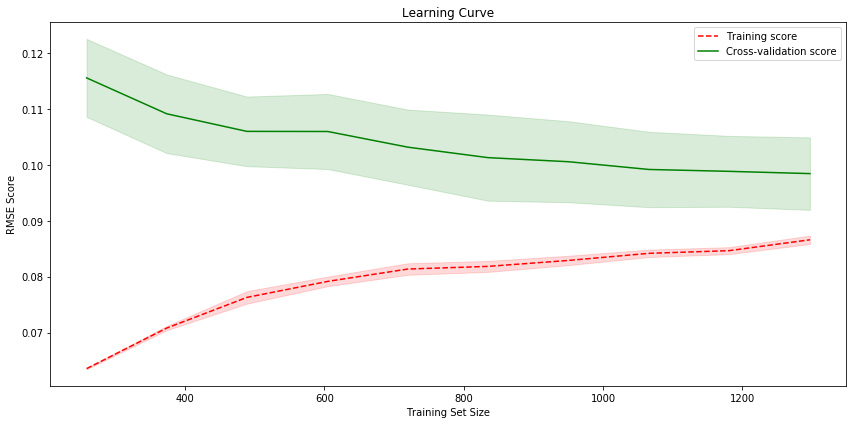

In [322]:
#Draw learning curve plot

# Draw lines
plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean, '--', color='red',  label='Training score')
plt.plot(train_sizes, test_mean, color='green', label='Cross-validation score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='red',alpha=0.15)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green',alpha=0.15)

# Create plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size'), plt.ylabel('RMSE Score'), plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Ensemble

One way to try and improve the results is to use "the wisdom of the crowds", an Ensemble.

An ensemble is a collection of weak learners, which can together, form a stronger model. This is because some models are better at predicting some results than others and averaging can often produce a better result.

In this section, the various models will be used for predicting values and storing these in DataFrames for later identifying the best ensemble combination possible.

In [323]:
meta_train_DF=pd.DataFrame(columns=['Id','Lasso','Kernel Ridge','Elastic Net','Gradient Boosting','XGBoost','LGBM'])
predictions_DF=pd.DataFrame(columns=['Lasso','Kernel Ridge','Elastic Net','Gradient Boosting','XGBoost','LGBM'])

In [324]:
kfold = KFold(n_splits=10, random_state= 101, shuffle = True)

Training

In [325]:
#for train, test in kfold.split(X_train,y):
#    temp = final_train.iloc[test]['Id']

#    x_temp = X_train.iloc[train]
#    y_temp = y.iloc[train]
    
#    #fit and predict with Lasso
#    lasso.fit(x_temp,y_temp)
#    y_train_lasso = lasso.predict(X_train.iloc[test])
        
#    #fit and predict with Kernel Ridge Regression
#    kr.fit(x_temp,y_temp)
#    y_train_kr = kr.predict(X_train.iloc[test])

#    #fit and predict with Elastic Net Regression
#    en.fit(x_temp,y_temp)
#    y_train_en = en.predict(X_train.iloc[test])   
    
#    #fit and predict with Gboost
#    gboost.fit(x_temp,y_temp)
#   y_train_gboost = gboost.predict(X_train.iloc[test])
    
#    #fit and predict with XGBoost
#    xgb.fit(x_temp,y_temp)
#    y_train_xgb = xgb.predict(X_train.iloc[test])

    #fit and predict with LGBM
#    lgb.fit(x_temp,y_temp)
#    y_train_lgb = lgb.predict(X_train.iloc[test])
    
#    temp_DF = pd.DataFrame()
#    temp_DF['Id'] = temp
#    temp_DF['Lasso'] = y_train_lasso
#    temp_DF['Kernel Ridge'] = y_train_kr
#    temp_DF['Elastic Net'] = y_train_en
#    temp_DF['Gradient Boosting'] = y_train_gboost
#    temp_DF['XGBoost'] = y_train_xgb
#    temp_DF['LGBM'] = y_train_lgb
    
#    meta_train_DF = pd.concat((meta_train_DF,temp_DF))

Collecting the predictions with each model

In [326]:
#fit and predict with Lasso
#lasso.fit(X_train,y)
#y_test_lasso = lasso.predict(final_test)
        
#fit and predict with Kernel Ridge Regression
#kr.fit(X_train,y)
#y_test_kr = kr.predict(final_test)

#fit and predict with Elastic Net Regression
#en.fit(X_train,y)
#y_test_en = en.predict(final_test)    

#fit and predict with Gradient Boost
#gboost.fit(X_train,y)
#y_test_gboost = gboost.predict(final_test)  

#fit and predict with XGB
#xgb.fit(X_train,y)
#y_test_xgb = xgb.predict(final_test)  

#fit and predict with LGBM
#lgb.fit(X_train,y)
#y_test_lgb = lgb.predict(final_test)
    
#predictions_DF['Lasso'] = y_test_lasso
#predictions_DF['Kernel Ridge'] = y_test_kr
#predictions_DF['Elastic Net'] = y_test_en
#predictions_DF['Gradient Boosting'] = y_test_gboost
#predictions_DF['XGBoost'] = y_test_xgb
#predictions_DF['LGBM'] = y_test_lgb

In [327]:
meta_train_DF.sort_index().head()

Empty DataFrame
Columns: [Id, Lasso, Kernel Ridge, Elastic Net, Gradient Boosting, XGBoost, LGBM]
Index: []

In [328]:
predictions_DF.head()

Empty DataFrame
Columns: [Lasso, Kernel Ridge, Elastic Net, Gradient Boosting, XGBoost, LGBM]
Index: []

Let's start by running a GridSearch and determine the best Hyperparameters.

In [329]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [330]:
meta_train_DF.sort_index().head()

Empty DataFrame
Columns: [Id, Lasso, Kernel Ridge, Elastic Net, Gradient Boosting, XGBoost, LGBM]
Index: []

In [331]:
predictions_DF.head()

Empty DataFrame
Columns: [Lasso, Kernel Ridge, Elastic Net, Gradient Boosting, XGBoost, LGBM]
Index: []

In [332]:
predictions_DF.describe()

Lasso  Kernel Ridge  Elastic Net  Gradient Boosting  XGBoost  LGBM
count       0             0            0                  0        0     0
unique      0             0            0                  0        0     0

### Emsemble prediction with train data

In [333]:
lasso.fit(X_train,y)
kr.fit(X_train,y)
en.fit(X_train,y)
lgb.fit(X_train,y)
gboost.fit(X_train,y)
xgb.fit(X_train,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [334]:
#y_submit = np.expm1(lgb.predict(final_test.drop('Id',axis=1)))
y_train_lasso = lasso.predict(X_train)
y_train_kr = kr.predict(X_train)
y_train_en = en.predict(X_train)
y_train_lgb = lgb.predict(X_train)
y_train_gboost = gboost.predict(X_train)
y_train_xgb = xgb.predict(X_train)

In [335]:
y_pred_train = 0.75*y_train_kr + 0.25*y_train_lgb
#y_pred_train = (0.5*y_train_en) + (0.5*y_train_lgb) #+ (0.25*y_train_xgb)

In [336]:
rmsle(y, y_pred_train)*100

7.213656905015764

In [337]:
y_train = np.expm1(y_pred_train)
residual = pd.DataFrame()
residual['Predict'] = y_pred_train
residual['Residual'] = y - y_pred_train

In [338]:
y_predict_train = 0.1 * y_train_gboost + 0.3 * y_train_xgb + 0.3 * y_train_lasso + 0.3 * y_train_kr

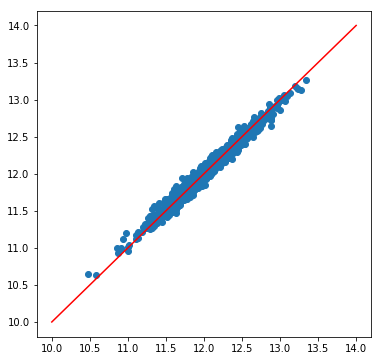

In [339]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_predict_train)
plt.plot(range(10, 15), range(10, 15), color="red")

### Create predictions with Ensemble of LightGBM, Elastic Net

__Train Set__

In [340]:
final_test.shape

(1459, 193)

In [341]:
#y_submit = np.expm1(lgb.predict(final_test.drop('Id',axis=1)))
y_lasso = lasso.predict(final_test)
y_kr = kr.predict(final_test)
y_en = en.predict(final_test)
y_lgb = lgb.predict(final_test)
y_gboost = gboost.predict(final_test)
y_xgb = xgb.predict(final_test)

In [346]:
y_submit = y_kr
#y_submit = 0.1 * y_gboost + 0.3 * y_xgb + 0.3 * y_lasso + 0.3 * y_kr

__Submit Predictions__

In [347]:
df_submit = pd.DataFrame({'Id':id_list,'SalePrice':np.expm1(y_submit)})

In [348]:
df_submit.head()

Id      SalePrice
1460  1461  122156.665713
1461  1462  168021.502170
1462  1463  183349.972847
1463  1464  191391.264576
1464  1465  197650.448896

In [349]:
df_submit.to_csv('submission.csv',index=False)

With Kernel Ridge, a RMSE of 11.961% is obtained in Kaggle.